In [3]:
import pandas as pd
import numpy as np
import json
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [4]:
train_data = pd.read_csv('train_modified.csv') # Important!!
print(train_data.shape)
train_data.head()

/home/tintash/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (3,50) have mixed types. Specify dtype option on import or set low_memory=False.



(903653, 56)


Unnamed: 0 channelGrouping      date        fullVisitorId  \
0           0  Organic Search  20160902  1131660440785968503   
1           1  Organic Search  20160902   377306020877927890   
2           2  Organic Search  20160902  3895546263509774583   
3           3  Organic Search  20160902  4763447161404445595   
4           4  Organic Search  20160902    27294437909732085   

                        sessionId  socialEngagementType     visitId  \
0  1131660440785968503_1472830385  Not Socially Engaged  1472830385   
1   377306020877927890_1472880147  Not Socially Engaged  1472880147   
2  3895546263509774583_1472865386  Not Socially Engaged  1472865386   
3  4763447161404445595_1472881213  Not Socially Engaged  1472881213   
4    27294437909732085_1472822600  Not Socially Engaged  1472822600   

   visitNumber  visitStartTime device.browser         ...           \
0            1      1472830385         Chrome         ...            
1            1      1472880147        Firefox         ...            
2            1      1472865386         Chrome         ...            
3            1      1472881213     UC Browser         ...            
4            2      1472822600         Chrome         ...            

  trafficSource.adwordsClickInfo.isVideoAd  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  trafficSource.adwordsClickInfo.page trafficSource.adwordsClickInfo.slot  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

  trafficSource.campaign  trafficSource.campaignCode  \
0              (not set)                         NaN   
1              (not set)                         NaN   
2              (not set)                         NaN   
3              (not set)                         NaN   
4              (not set)                         NaN   

  trafficSource.isTrueDirect trafficSource.keyword trafficSource.medium  \
0                        NaN        (not provided)              organic   
1                        NaN        (not provided)              organic   
2                        NaN        (not provided)              organic   
3                        NaN       google + online              organic   
4                       True        (not provided)              organic   

  trafficSource.referralPath trafficSource.source  
0                        NaN               google  
1                        NaN               google  
2                        NaN               google  
3                        NaN               google  
4                        NaN               google  

[5 rows x 56 columns]

In [5]:
#Print all the column names
print(train_data.columns.values)

['Unnamed: 0' 'channelGrouping' 'date' 'fullVisitorId' 'sessionId'
 'socialEngagementType' 'visitId' 'visitNumber' 'visitStartTime'
 'device.browser' 'device.browserSize' 'device.browserVersion'
 'device.deviceCategory' 'device.flashVersion' 'device.isMobile'
 'device.language' 'device.mobileDeviceBranding' 'device.mobileDeviceInfo'
 'device.mobileDeviceMarketingName' 'device.mobileDeviceModel'
 'device.mobileInputSelector' 'device.operatingSystem'
 'device.operatingSystemVersion' 'device.screenColors'
 'device.screenResolution' 'geoNetwork.city' 'geoNetwork.cityId'
 'geoNetwork.continent' 'geoNetwork.country' 'geoNetwork.latitude'
 'geoNetwork.longitude' 'geoNetwork.metro' 'geoNetwork.networkDomain'
 'geoNetwork.networkLocation' 'geoNetwork.region'
 'geoNetwork.subContinent' 'totals.bounces' 'totals.hits'
 'totals.newVisits' 'totals.pageviews' 'totals.transactionRevenue'
 'totals.visits' 'trafficSource.adContent'
 'trafficSource.adwordsClickInfo.adNetworkType'
 'trafficSource.adwordsC

In [59]:
relevantAttributes = ['channelGrouping', 'date', 'fullVisitorId',
  'visitNumber', 'visitStartTime',
 'device.browser',
 'device.deviceCategory', 'device.isMobile',
  'device.operatingSystem',
  'geoNetwork.city',
 'geoNetwork.continent', 'geoNetwork.country', 
 'geoNetwork.subContinent',  'totals.hits',
 'totals.newVisits', 'totals.pageviews',
 'totals.visits', 
  'trafficSource.medium',
  'totals.transactionRevenue']
print (relevantAttributes)

trainData_NB = train_data.sample(frac=0.8,random_state=200)
testData_NB = train_data.drop(trainData_NB.index)

trainData_NB = trainData_NB[relevantAttributes]
testData_NB = testData_NB[relevantAttributes]

nonZeroTransactions = trainData_NB[trainData_NB['totals.transactionRevenue'] != 0]
nonZeroTransactions = nonZeroTransactions.reset_index()
prob_Revenue = len(nonZeroTransactions)/len(trainData_NB)

print(prob_Revenue)


trainData_NB['totals.transactionRevenue'] = trainData_NB['totals.transactionRevenue'].fillna(0)
testData_NB['totals.transactionRevenue'] = testData_NB['totals.transactionRevenue'].fillna(0)

print ('Train Data Shape : ', trainData_NB.shape)
print ('Test Data Shape : ', testData_NB.shape)

['channelGrouping', 'date', 'fullVisitorId', 'visitNumber', 'visitStartTime', 'device.browser', 'device.deviceCategory', 'device.isMobile', 'device.operatingSystem', 'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.subContinent', 'totals.hits', 'totals.newVisits', 'totals.pageviews', 'totals.visits', 'trafficSource.medium', 'totals.transactionRevenue']
1.0
Train Data Shape :  (722922, 19)
Test Data Shape :  (180731, 19)


In [ ]:
errorCount = 0
correctLabels = 0

valueCounts = {}
valueCounts_givenRev = {}

for feature in range(len(relevantAttributes)-1):
    valueCounts[feature] = trainData_NB[relevantAttributes[feature]].value_counts()
    valueCounts_givenRev[feature] = nonZeroTransactions[relevantAttributes[feature]].value_counts()

    for valueCount in valueCounts[feature].index:
        valueCounts[feature][valueCount] += 1
        
    for valueCount in valueCounts_givenRev[feature].index:
        valueCounts_givenRev[feature][valueCount] += 1
    
totalNonZeroTransactions = len(nonZeroTransactions)
totalNoOfTransactions = len(trainData_NB)

for index in range(len(testData_NB)):
    item = testData_NB.iloc[index,:]
    
    probRevenue = 1
    for feature in range(len(relevantAttributes)-1):
        prob_feature_givenRev = valueCounts_givenRev[feature].get(item[feature], 1)/totalNonZeroTransactions
        prob_feature = valueCounts[feature].get(item[feature], 1)/totalNoOfTransactions
        
        probRevenue *= prob_feature_givenRev / prob_feature
        
    probRevenue *= prob_Revenue

    if (probRevenue > 0.5):
        if item['totals.transactionRevenue'] == 0:
            errorCount += 1
        else:
            correctLabels += 1
    else:
        if item['totals.transactionRevenue'] != 0:
            errorCount += 1
        else:
            correctLabels += 1
            
    print ('errors : ', errorCount, '           correct labels : ', correctLabels)
    
print('----------------------------------------------------------------------------')
print(errorCount/len(testData_NB))
print('----------------------------------------------------------------------------')

errors :  1            correct labels :  0
errors :  2            correct labels :  0
errors :  3            correct labels :  0
errors :  4            correct labels :  0
errors :  5            correct labels :  0
errors :  6            correct labels :  0
errors :  7            correct labels :  0
errors :  8            correct labels :  0
errors :  9            correct labels :  0
errors :  10            correct labels :  0
errors :  11            correct labels :  0
errors :  12            correct labels :  0
errors :  13            correct labels :  0
errors :  14            correct labels :  0
errors :  15            correct labels :  0
errors :  16            correct labels :  0
errors :  17            correct labels :  0
errors :  18            correct labels :  0
errors :  19            correct labels :  0
errors :  20            correct labels :  0
errors :  21            correct labels :  0
errors :  22            correct labels :  0
errors :  23            correct labels : 

errors :  241            correct labels :  0
errors :  242            correct labels :  0
errors :  243            correct labels :  0
errors :  244            correct labels :  0
errors :  245            correct labels :  0
errors :  246            correct labels :  0
errors :  247            correct labels :  0
errors :  248            correct labels :  0
errors :  249            correct labels :  0
errors :  250            correct labels :  0
errors :  251            correct labels :  0
errors :  252            correct labels :  0
errors :  253            correct labels :  0
errors :  254            correct labels :  0
errors :  255            correct labels :  0
errors :  256            correct labels :  0
errors :  257            correct labels :  0
errors :  258            correct labels :  0
errors :  259            correct labels :  0
errors :  260            correct labels :  0
errors :  261            correct labels :  0
errors :  262            correct labels :  0
errors :  

errors :  454            correct labels :  0
errors :  455            correct labels :  0
errors :  456            correct labels :  0
errors :  457            correct labels :  0
errors :  458            correct labels :  0
errors :  459            correct labels :  0
errors :  460            correct labels :  0
errors :  461            correct labels :  0
errors :  462            correct labels :  0
errors :  463            correct labels :  0
errors :  464            correct labels :  0
errors :  465            correct labels :  0
errors :  466            correct labels :  0
errors :  467            correct labels :  0
errors :  468            correct labels :  0
errors :  469            correct labels :  0
errors :  470            correct labels :  0
errors :  471            correct labels :  0
errors :  472            correct labels :  0
errors :  473            correct labels :  0
errors :  474            correct labels :  0
errors :  475            correct labels :  0
errors :  

errors :  652            correct labels :  0
errors :  653            correct labels :  0
errors :  654            correct labels :  0
errors :  655            correct labels :  0
errors :  656            correct labels :  0
errors :  656            correct labels :  1
errors :  657            correct labels :  1
errors :  658            correct labels :  1
errors :  659            correct labels :  1
errors :  660            correct labels :  1
errors :  661            correct labels :  1
errors :  662            correct labels :  1
errors :  663            correct labels :  1
errors :  664            correct labels :  1
errors :  665            correct labels :  1
errors :  666            correct labels :  1
errors :  667            correct labels :  1
errors :  668            correct labels :  1
errors :  669            correct labels :  1
errors :  670            correct labels :  1
errors :  671            correct labels :  1
errors :  672            correct labels :  1
errors :  

errors :  859            correct labels :  7
errors :  860            correct labels :  7
errors :  861            correct labels :  7
errors :  862            correct labels :  7
errors :  863            correct labels :  7
errors :  864            correct labels :  7
errors :  865            correct labels :  7
errors :  866            correct labels :  7
errors :  867            correct labels :  7
errors :  868            correct labels :  7
errors :  869            correct labels :  7
errors :  870            correct labels :  7
errors :  871            correct labels :  7
errors :  872            correct labels :  7
errors :  873            correct labels :  7
errors :  874            correct labels :  7
errors :  875            correct labels :  7
errors :  876            correct labels :  7
errors :  877            correct labels :  7
errors :  878            correct labels :  7
errors :  879            correct labels :  7
errors :  880            correct labels :  7
errors :  

errors :  1084            correct labels :  7
errors :  1085            correct labels :  7
errors :  1086            correct labels :  7
errors :  1087            correct labels :  7
errors :  1088            correct labels :  7
errors :  1089            correct labels :  7
errors :  1090            correct labels :  7
errors :  1091            correct labels :  7
errors :  1092            correct labels :  7
errors :  1093            correct labels :  7
errors :  1094            correct labels :  7
errors :  1095            correct labels :  7
errors :  1096            correct labels :  7
errors :  1097            correct labels :  7
errors :  1098            correct labels :  7
errors :  1099            correct labels :  7
errors :  1100            correct labels :  7
errors :  1101            correct labels :  7
errors :  1102            correct labels :  7
errors :  1103            correct labels :  7
errors :  1104            correct labels :  7
errors :  1105            correct 

errors :  1296            correct labels :  7
errors :  1297            correct labels :  7
errors :  1298            correct labels :  7
errors :  1299            correct labels :  7
errors :  1300            correct labels :  7
errors :  1301            correct labels :  7
errors :  1302            correct labels :  7
errors :  1303            correct labels :  7
errors :  1304            correct labels :  7
errors :  1305            correct labels :  7
errors :  1306            correct labels :  7
errors :  1307            correct labels :  7
errors :  1308            correct labels :  7
errors :  1309            correct labels :  7
errors :  1310            correct labels :  7
errors :  1311            correct labels :  7
errors :  1312            correct labels :  7
errors :  1313            correct labels :  7
errors :  1314            correct labels :  7
errors :  1315            correct labels :  7
errors :  1316            correct labels :  7
errors :  1317            correct 

errors :  1555            correct labels :  11
errors :  1556            correct labels :  11
errors :  1557            correct labels :  11
errors :  1558            correct labels :  11
errors :  1559            correct labels :  11
errors :  1560            correct labels :  11
errors :  1561            correct labels :  11
errors :  1562            correct labels :  11
errors :  1563            correct labels :  11
errors :  1564            correct labels :  11
errors :  1565            correct labels :  11
errors :  1566            correct labels :  11
errors :  1567            correct labels :  11
errors :  1568            correct labels :  11
errors :  1569            correct labels :  11
errors :  1570            correct labels :  11
errors :  1571            correct labels :  11
errors :  1572            correct labels :  11
errors :  1573            correct labels :  11
errors :  1574            correct labels :  11
errors :  1575            correct labels :  11
errors :  157

errors :  1834            correct labels :  14
errors :  1835            correct labels :  14
errors :  1836            correct labels :  14
errors :  1837            correct labels :  14
errors :  1838            correct labels :  14
errors :  1839            correct labels :  14
errors :  1840            correct labels :  14
errors :  1841            correct labels :  14
errors :  1842            correct labels :  14
errors :  1843            correct labels :  14
errors :  1844            correct labels :  14
errors :  1845            correct labels :  14
errors :  1846            correct labels :  14
errors :  1847            correct labels :  14
errors :  1848            correct labels :  14
errors :  1849            correct labels :  14
errors :  1850            correct labels :  14
errors :  1851            correct labels :  14
errors :  1852            correct labels :  14
errors :  1853            correct labels :  14
errors :  1854            correct labels :  14
errors :  185

errors :  2027            correct labels :  14
errors :  2028            correct labels :  14
errors :  2029            correct labels :  14
errors :  2030            correct labels :  14
errors :  2031            correct labels :  14
errors :  2032            correct labels :  14
errors :  2033            correct labels :  14
errors :  2034            correct labels :  14
errors :  2035            correct labels :  14
errors :  2036            correct labels :  14
errors :  2037            correct labels :  14
errors :  2038            correct labels :  14
errors :  2039            correct labels :  14
errors :  2040            correct labels :  14
errors :  2041            correct labels :  14
errors :  2042            correct labels :  14
errors :  2043            correct labels :  14
errors :  2044            correct labels :  14
errors :  2045            correct labels :  14
errors :  2046            correct labels :  14
errors :  2047            correct labels :  14
errors :  204

errors :  2221            correct labels :  19
errors :  2222            correct labels :  19
errors :  2223            correct labels :  19
errors :  2224            correct labels :  19
errors :  2225            correct labels :  19
errors :  2226            correct labels :  19
errors :  2227            correct labels :  19
errors :  2228            correct labels :  19
errors :  2229            correct labels :  19
errors :  2230            correct labels :  19
errors :  2231            correct labels :  19
errors :  2232            correct labels :  19
errors :  2233            correct labels :  19
errors :  2234            correct labels :  19
errors :  2235            correct labels :  19
errors :  2236            correct labels :  19
errors :  2237            correct labels :  19
errors :  2238            correct labels :  19
errors :  2239            correct labels :  19
errors :  2240            correct labels :  19
errors :  2241            correct labels :  19
errors :  224

errors :  2430            correct labels :  27
errors :  2431            correct labels :  27
errors :  2432            correct labels :  27
errors :  2433            correct labels :  27
errors :  2434            correct labels :  27
errors :  2435            correct labels :  27
errors :  2436            correct labels :  27
errors :  2437            correct labels :  27
errors :  2438            correct labels :  27
errors :  2439            correct labels :  27
errors :  2440            correct labels :  27
errors :  2441            correct labels :  27
errors :  2442            correct labels :  27
errors :  2443            correct labels :  27
errors :  2444            correct labels :  27
errors :  2445            correct labels :  27
errors :  2446            correct labels :  27
errors :  2447            correct labels :  27
errors :  2448            correct labels :  27
errors :  2449            correct labels :  27
errors :  2450            correct labels :  27
errors :  245

errors :  2631            correct labels :  27
errors :  2632            correct labels :  27
errors :  2633            correct labels :  27
errors :  2634            correct labels :  27
errors :  2635            correct labels :  27
errors :  2636            correct labels :  27
errors :  2637            correct labels :  27
errors :  2638            correct labels :  27
errors :  2639            correct labels :  27
errors :  2640            correct labels :  27
errors :  2641            correct labels :  27
errors :  2642            correct labels :  27
errors :  2643            correct labels :  27
errors :  2644            correct labels :  27
errors :  2645            correct labels :  27
errors :  2646            correct labels :  27
errors :  2647            correct labels :  27
errors :  2648            correct labels :  27
errors :  2649            correct labels :  27
errors :  2650            correct labels :  27
errors :  2651            correct labels :  27
errors :  265

errors :  2836            correct labels :  29
errors :  2836            correct labels :  30
errors :  2837            correct labels :  30
errors :  2838            correct labels :  30
errors :  2839            correct labels :  30
errors :  2840            correct labels :  30
errors :  2841            correct labels :  30
errors :  2842            correct labels :  30
errors :  2842            correct labels :  31
errors :  2843            correct labels :  31
errors :  2843            correct labels :  32
errors :  2843            correct labels :  33
errors :  2844            correct labels :  33
errors :  2844            correct labels :  34
errors :  2845            correct labels :  34
errors :  2846            correct labels :  34
errors :  2847            correct labels :  34
errors :  2847            correct labels :  35
errors :  2848            correct labels :  35
errors :  2849            correct labels :  35
errors :  2850            correct labels :  35
errors :  285

errors :  3069            correct labels :  41
errors :  3070            correct labels :  41
errors :  3071            correct labels :  41
errors :  3072            correct labels :  41
errors :  3073            correct labels :  41
errors :  3074            correct labels :  41
errors :  3075            correct labels :  41
errors :  3076            correct labels :  41
errors :  3077            correct labels :  41
errors :  3078            correct labels :  41
errors :  3079            correct labels :  41
errors :  3080            correct labels :  41
errors :  3081            correct labels :  41
errors :  3082            correct labels :  41
errors :  3083            correct labels :  41
errors :  3084            correct labels :  41
errors :  3085            correct labels :  41
errors :  3086            correct labels :  41
errors :  3087            correct labels :  41
errors :  3088            correct labels :  41
errors :  3089            correct labels :  41
errors :  309

errors :  3324            correct labels :  41
errors :  3325            correct labels :  41
errors :  3326            correct labels :  41
errors :  3327            correct labels :  41
errors :  3328            correct labels :  41
errors :  3329            correct labels :  41
errors :  3330            correct labels :  41
errors :  3331            correct labels :  41
errors :  3332            correct labels :  41
errors :  3333            correct labels :  41
errors :  3334            correct labels :  41
errors :  3335            correct labels :  41
errors :  3336            correct labels :  41
errors :  3337            correct labels :  41
errors :  3338            correct labels :  41
errors :  3339            correct labels :  41
errors :  3340            correct labels :  41
errors :  3341            correct labels :  41
errors :  3342            correct labels :  41
errors :  3343            correct labels :  41
errors :  3344            correct labels :  41
errors :  334

errors :  3569            correct labels :  45
errors :  3570            correct labels :  45
errors :  3571            correct labels :  45
errors :  3572            correct labels :  45
errors :  3573            correct labels :  45
errors :  3574            correct labels :  45
errors :  3575            correct labels :  45
errors :  3576            correct labels :  45
errors :  3577            correct labels :  45
errors :  3578            correct labels :  45
errors :  3579            correct labels :  45
errors :  3580            correct labels :  45
errors :  3581            correct labels :  45
errors :  3582            correct labels :  45
errors :  3583            correct labels :  45
errors :  3584            correct labels :  45
errors :  3585            correct labels :  45
errors :  3586            correct labels :  45
errors :  3587            correct labels :  45
errors :  3588            correct labels :  45
errors :  3589            correct labels :  45
errors :  359

errors :  3798            correct labels :  45
errors :  3799            correct labels :  45
errors :  3800            correct labels :  45
errors :  3801            correct labels :  45
errors :  3802            correct labels :  45
errors :  3803            correct labels :  45
errors :  3804            correct labels :  45
errors :  3805            correct labels :  45
errors :  3806            correct labels :  45
errors :  3807            correct labels :  45
errors :  3808            correct labels :  45
errors :  3809            correct labels :  45
errors :  3810            correct labels :  45
errors :  3811            correct labels :  45
errors :  3812            correct labels :  45
errors :  3813            correct labels :  45
errors :  3814            correct labels :  45
errors :  3815            correct labels :  45
errors :  3816            correct labels :  45
errors :  3817            correct labels :  45
errors :  3818            correct labels :  45
errors :  381

errors :  4017            correct labels :  46
errors :  4018            correct labels :  46
errors :  4019            correct labels :  46
errors :  4020            correct labels :  46
errors :  4021            correct labels :  46
errors :  4022            correct labels :  46
errors :  4023            correct labels :  46
errors :  4024            correct labels :  46
errors :  4025            correct labels :  46
errors :  4026            correct labels :  46
errors :  4027            correct labels :  46
errors :  4028            correct labels :  46
errors :  4029            correct labels :  46
errors :  4030            correct labels :  46
errors :  4031            correct labels :  46
errors :  4032            correct labels :  46
errors :  4033            correct labels :  46
errors :  4034            correct labels :  46
errors :  4035            correct labels :  46
errors :  4036            correct labels :  46
errors :  4037            correct labels :  46
errors :  403

errors :  4195            correct labels :  46
errors :  4196            correct labels :  46
errors :  4197            correct labels :  46
errors :  4198            correct labels :  46
errors :  4199            correct labels :  46
errors :  4200            correct labels :  46
errors :  4201            correct labels :  46
errors :  4202            correct labels :  46
errors :  4203            correct labels :  46
errors :  4204            correct labels :  46
errors :  4205            correct labels :  46
errors :  4206            correct labels :  46
errors :  4207            correct labels :  46
errors :  4208            correct labels :  46
errors :  4209            correct labels :  46
errors :  4210            correct labels :  46
errors :  4211            correct labels :  46
errors :  4212            correct labels :  46
errors :  4213            correct labels :  46
errors :  4214            correct labels :  46
errors :  4215            correct labels :  46
errors :  421

errors :  4437            correct labels :  52
errors :  4438            correct labels :  52
errors :  4439            correct labels :  52
errors :  4440            correct labels :  52
errors :  4441            correct labels :  52
errors :  4442            correct labels :  52
errors :  4443            correct labels :  52
errors :  4444            correct labels :  52
errors :  4445            correct labels :  52
errors :  4446            correct labels :  52
errors :  4447            correct labels :  52
errors :  4448            correct labels :  52
errors :  4449            correct labels :  52
errors :  4450            correct labels :  52
errors :  4451            correct labels :  52
errors :  4452            correct labels :  52
errors :  4453            correct labels :  52
errors :  4454            correct labels :  52
errors :  4455            correct labels :  52
errors :  4456            correct labels :  52
errors :  4457            correct labels :  52
errors :  445

errors :  4683            correct labels :  56
errors :  4684            correct labels :  56
errors :  4685            correct labels :  56
errors :  4686            correct labels :  56
errors :  4687            correct labels :  56
errors :  4688            correct labels :  56
errors :  4689            correct labels :  56
errors :  4690            correct labels :  56
errors :  4691            correct labels :  56
errors :  4692            correct labels :  56
errors :  4693            correct labels :  56
errors :  4694            correct labels :  56
errors :  4695            correct labels :  56
errors :  4696            correct labels :  56
errors :  4697            correct labels :  56
errors :  4698            correct labels :  56
errors :  4699            correct labels :  56
errors :  4700            correct labels :  56
errors :  4701            correct labels :  56
errors :  4702            correct labels :  56
errors :  4703            correct labels :  56
errors :  470

errors :  4933            correct labels :  56
errors :  4934            correct labels :  56
errors :  4935            correct labels :  56
errors :  4936            correct labels :  56
errors :  4937            correct labels :  56
errors :  4938            correct labels :  56
errors :  4939            correct labels :  56
errors :  4940            correct labels :  56
errors :  4941            correct labels :  56
errors :  4942            correct labels :  56
errors :  4943            correct labels :  56
errors :  4944            correct labels :  56
errors :  4945            correct labels :  56
errors :  4946            correct labels :  56
errors :  4947            correct labels :  56
errors :  4948            correct labels :  56
errors :  4949            correct labels :  56
errors :  4950            correct labels :  56
errors :  4951            correct labels :  56
errors :  4952            correct labels :  56
errors :  4953            correct labels :  56
errors :  495

errors :  5162            correct labels :  56
errors :  5163            correct labels :  56
errors :  5164            correct labels :  56
errors :  5165            correct labels :  56
errors :  5166            correct labels :  56
errors :  5167            correct labels :  56
errors :  5168            correct labels :  56
errors :  5169            correct labels :  56
errors :  5170            correct labels :  56
errors :  5171            correct labels :  56
errors :  5172            correct labels :  56
errors :  5173            correct labels :  56
errors :  5174            correct labels :  56
errors :  5175            correct labels :  56
errors :  5176            correct labels :  56
errors :  5177            correct labels :  56
errors :  5178            correct labels :  56
errors :  5179            correct labels :  56
errors :  5180            correct labels :  56
errors :  5181            correct labels :  56
errors :  5182            correct labels :  56
errors :  518

errors :  5366            correct labels :  56
errors :  5367            correct labels :  56
errors :  5368            correct labels :  56
errors :  5369            correct labels :  56
errors :  5370            correct labels :  56
errors :  5371            correct labels :  56
errors :  5372            correct labels :  56
errors :  5373            correct labels :  56
errors :  5374            correct labels :  56
errors :  5375            correct labels :  56
errors :  5376            correct labels :  56
errors :  5377            correct labels :  56
errors :  5378            correct labels :  56
errors :  5379            correct labels :  56
errors :  5380            correct labels :  56
errors :  5381            correct labels :  56
errors :  5382            correct labels :  56
errors :  5383            correct labels :  56
errors :  5384            correct labels :  56
errors :  5385            correct labels :  56
errors :  5386            correct labels :  56
errors :  538

errors :  5556            correct labels :  57
errors :  5557            correct labels :  57
errors :  5558            correct labels :  57
errors :  5559            correct labels :  57
errors :  5560            correct labels :  57
errors :  5561            correct labels :  57
errors :  5562            correct labels :  57
errors :  5563            correct labels :  57
errors :  5564            correct labels :  57
errors :  5565            correct labels :  57
errors :  5566            correct labels :  57
errors :  5567            correct labels :  57
errors :  5568            correct labels :  57
errors :  5569            correct labels :  57
errors :  5570            correct labels :  57
errors :  5571            correct labels :  57
errors :  5572            correct labels :  57
errors :  5573            correct labels :  57
errors :  5574            correct labels :  57
errors :  5575            correct labels :  57
errors :  5576            correct labels :  57
errors :  557

errors :  5804            correct labels :  59
errors :  5805            correct labels :  59
errors :  5806            correct labels :  59
errors :  5807            correct labels :  59
errors :  5808            correct labels :  59
errors :  5809            correct labels :  59
errors :  5810            correct labels :  59
errors :  5811            correct labels :  59
errors :  5812            correct labels :  59
errors :  5813            correct labels :  59
errors :  5814            correct labels :  59
errors :  5815            correct labels :  59
errors :  5816            correct labels :  59
errors :  5817            correct labels :  59
errors :  5818            correct labels :  59
errors :  5819            correct labels :  59
errors :  5820            correct labels :  59
errors :  5821            correct labels :  59
errors :  5822            correct labels :  59
errors :  5823            correct labels :  59
errors :  5824            correct labels :  59
errors :  582

errors :  6010            correct labels :  59
errors :  6011            correct labels :  59
errors :  6012            correct labels :  59
errors :  6013            correct labels :  59
errors :  6014            correct labels :  59
errors :  6015            correct labels :  59
errors :  6016            correct labels :  59
errors :  6017            correct labels :  59
errors :  6018            correct labels :  59
errors :  6019            correct labels :  59
errors :  6020            correct labels :  59
errors :  6021            correct labels :  59
errors :  6022            correct labels :  59
errors :  6023            correct labels :  59
errors :  6024            correct labels :  59
errors :  6025            correct labels :  59
errors :  6026            correct labels :  59
errors :  6027            correct labels :  59
errors :  6028            correct labels :  59
errors :  6029            correct labels :  59
errors :  6030            correct labels :  59
errors :  603

errors :  6232            correct labels :  63
errors :  6233            correct labels :  63
errors :  6234            correct labels :  63
errors :  6235            correct labels :  63
errors :  6236            correct labels :  63
errors :  6237            correct labels :  63
errors :  6238            correct labels :  63
errors :  6239            correct labels :  63
errors :  6240            correct labels :  63
errors :  6241            correct labels :  63
errors :  6242            correct labels :  63
errors :  6243            correct labels :  63
errors :  6244            correct labels :  63
errors :  6245            correct labels :  63
errors :  6246            correct labels :  63
errors :  6247            correct labels :  63
errors :  6248            correct labels :  63
errors :  6249            correct labels :  63
errors :  6250            correct labels :  63
errors :  6251            correct labels :  63
errors :  6252            correct labels :  63
errors :  625

errors :  6425            correct labels :  63
errors :  6426            correct labels :  63
errors :  6427            correct labels :  63
errors :  6428            correct labels :  63
errors :  6429            correct labels :  63
errors :  6430            correct labels :  63
errors :  6431            correct labels :  63
errors :  6432            correct labels :  63
errors :  6433            correct labels :  63
errors :  6434            correct labels :  63
errors :  6435            correct labels :  63
errors :  6436            correct labels :  63
errors :  6437            correct labels :  63
errors :  6438            correct labels :  63
errors :  6439            correct labels :  63
errors :  6440            correct labels :  63
errors :  6441            correct labels :  63
errors :  6442            correct labels :  63
errors :  6443            correct labels :  63
errors :  6444            correct labels :  63
errors :  6445            correct labels :  63
errors :  644

errors :  6666            correct labels :  72
errors :  6667            correct labels :  72
errors :  6668            correct labels :  72
errors :  6669            correct labels :  72
errors :  6670            correct labels :  72
errors :  6671            correct labels :  72
errors :  6672            correct labels :  72
errors :  6673            correct labels :  72
errors :  6674            correct labels :  72
errors :  6675            correct labels :  72
errors :  6676            correct labels :  72
errors :  6677            correct labels :  72
errors :  6678            correct labels :  72
errors :  6679            correct labels :  72
errors :  6680            correct labels :  72
errors :  6681            correct labels :  72
errors :  6682            correct labels :  72
errors :  6683            correct labels :  72
errors :  6684            correct labels :  72
errors :  6685            correct labels :  72
errors :  6686            correct labels :  72
errors :  668

errors :  6916            correct labels :  72
errors :  6917            correct labels :  72
errors :  6918            correct labels :  72
errors :  6919            correct labels :  72
errors :  6920            correct labels :  72
errors :  6921            correct labels :  72
errors :  6922            correct labels :  72
errors :  6923            correct labels :  72
errors :  6924            correct labels :  72
errors :  6925            correct labels :  72
errors :  6926            correct labels :  72
errors :  6927            correct labels :  72
errors :  6928            correct labels :  72
errors :  6929            correct labels :  72
errors :  6930            correct labels :  72
errors :  6931            correct labels :  72
errors :  6932            correct labels :  72
errors :  6933            correct labels :  72
errors :  6934            correct labels :  72
errors :  6935            correct labels :  72
errors :  6936            correct labels :  72
errors :  693

errors :  7165            correct labels :  72
errors :  7166            correct labels :  72
errors :  7167            correct labels :  72
errors :  7168            correct labels :  72
errors :  7169            correct labels :  72
errors :  7170            correct labels :  72
errors :  7171            correct labels :  72
errors :  7172            correct labels :  72
errors :  7173            correct labels :  72
errors :  7174            correct labels :  72
errors :  7175            correct labels :  72
errors :  7176            correct labels :  72
errors :  7177            correct labels :  72
errors :  7178            correct labels :  72
errors :  7179            correct labels :  72
errors :  7180            correct labels :  72
errors :  7181            correct labels :  72
errors :  7182            correct labels :  72
errors :  7183            correct labels :  72
errors :  7184            correct labels :  72
errors :  7185            correct labels :  72
errors :  718

errors :  7404            correct labels :  83
errors :  7405            correct labels :  83
errors :  7406            correct labels :  83
errors :  7407            correct labels :  83
errors :  7408            correct labels :  83
errors :  7409            correct labels :  83
errors :  7410            correct labels :  83
errors :  7411            correct labels :  83
errors :  7412            correct labels :  83
errors :  7413            correct labels :  83
errors :  7414            correct labels :  83
errors :  7415            correct labels :  83
errors :  7416            correct labels :  83
errors :  7417            correct labels :  83
errors :  7418            correct labels :  83
errors :  7419            correct labels :  83
errors :  7420            correct labels :  83
errors :  7421            correct labels :  83
errors :  7422            correct labels :  83
errors :  7423            correct labels :  83
errors :  7424            correct labels :  83
errors :  742

errors :  7647            correct labels :  90
errors :  7648            correct labels :  90
errors :  7649            correct labels :  90
errors :  7650            correct labels :  90
errors :  7651            correct labels :  90
errors :  7652            correct labels :  90
errors :  7653            correct labels :  90
errors :  7654            correct labels :  90
errors :  7655            correct labels :  90
errors :  7656            correct labels :  90
errors :  7657            correct labels :  90
errors :  7658            correct labels :  90
errors :  7659            correct labels :  90
errors :  7660            correct labels :  90
errors :  7661            correct labels :  90
errors :  7662            correct labels :  90
errors :  7663            correct labels :  90
errors :  7664            correct labels :  90
errors :  7665            correct labels :  90
errors :  7666            correct labels :  90
errors :  7667            correct labels :  90
errors :  766

errors :  7897            correct labels :  90
errors :  7898            correct labels :  90
errors :  7899            correct labels :  90
errors :  7900            correct labels :  90
errors :  7901            correct labels :  90
errors :  7902            correct labels :  90
errors :  7903            correct labels :  90
errors :  7904            correct labels :  90
errors :  7905            correct labels :  90
errors :  7906            correct labels :  90
errors :  7907            correct labels :  90
errors :  7908            correct labels :  90
errors :  7909            correct labels :  90
errors :  7910            correct labels :  90
errors :  7911            correct labels :  90
errors :  7912            correct labels :  90
errors :  7913            correct labels :  90
errors :  7914            correct labels :  90
errors :  7915            correct labels :  90
errors :  7916            correct labels :  90
errors :  7917            correct labels :  90
errors :  791

errors :  8147            correct labels :  90
errors :  8148            correct labels :  90
errors :  8149            correct labels :  90
errors :  8150            correct labels :  90
errors :  8151            correct labels :  90
errors :  8152            correct labels :  90
errors :  8153            correct labels :  90
errors :  8154            correct labels :  90
errors :  8155            correct labels :  90
errors :  8156            correct labels :  90
errors :  8157            correct labels :  90
errors :  8158            correct labels :  90
errors :  8159            correct labels :  90
errors :  8160            correct labels :  90
errors :  8161            correct labels :  90
errors :  8162            correct labels :  90
errors :  8163            correct labels :  90
errors :  8164            correct labels :  90
errors :  8165            correct labels :  90
errors :  8166            correct labels :  90
errors :  8167            correct labels :  90
errors :  816

errors :  8392            correct labels :  95
errors :  8393            correct labels :  95
errors :  8394            correct labels :  95
errors :  8395            correct labels :  95
errors :  8396            correct labels :  95
errors :  8397            correct labels :  95
errors :  8398            correct labels :  95
errors :  8399            correct labels :  95
errors :  8400            correct labels :  95
errors :  8401            correct labels :  95
errors :  8402            correct labels :  95
errors :  8403            correct labels :  95
errors :  8404            correct labels :  95
errors :  8405            correct labels :  95
errors :  8406            correct labels :  95
errors :  8407            correct labels :  95
errors :  8408            correct labels :  95
errors :  8409            correct labels :  95
errors :  8410            correct labels :  95
errors :  8411            correct labels :  95
errors :  8412            correct labels :  95
errors :  841

errors :  8642            correct labels :  95
errors :  8643            correct labels :  95
errors :  8644            correct labels :  95
errors :  8645            correct labels :  95
errors :  8646            correct labels :  95
errors :  8647            correct labels :  95
errors :  8648            correct labels :  95
errors :  8649            correct labels :  95
errors :  8650            correct labels :  95
errors :  8651            correct labels :  95
errors :  8652            correct labels :  95
errors :  8653            correct labels :  95
errors :  8654            correct labels :  95
errors :  8655            correct labels :  95
errors :  8656            correct labels :  95
errors :  8657            correct labels :  95
errors :  8658            correct labels :  95
errors :  8659            correct labels :  95
errors :  8660            correct labels :  95
errors :  8661            correct labels :  95
errors :  8662            correct labels :  95
errors :  866

errors :  8879            correct labels :  108
errors :  8880            correct labels :  108
errors :  8881            correct labels :  108
errors :  8882            correct labels :  108
errors :  8883            correct labels :  108
errors :  8884            correct labels :  108
errors :  8885            correct labels :  108
errors :  8886            correct labels :  108
errors :  8887            correct labels :  108
errors :  8888            correct labels :  108
errors :  8889            correct labels :  108
errors :  8890            correct labels :  108
errors :  8891            correct labels :  108
errors :  8892            correct labels :  108
errors :  8893            correct labels :  108
errors :  8894            correct labels :  108
errors :  8895            correct labels :  108
errors :  8896            correct labels :  108
errors :  8897            correct labels :  108
errors :  8898            correct labels :  108
errors :  8899            correct labels

errors :  9128            correct labels :  108
errors :  9129            correct labels :  108
errors :  9130            correct labels :  108
errors :  9131            correct labels :  108
errors :  9132            correct labels :  108
errors :  9133            correct labels :  108
errors :  9134            correct labels :  108
errors :  9135            correct labels :  108
errors :  9136            correct labels :  108
errors :  9137            correct labels :  108
errors :  9138            correct labels :  108
errors :  9139            correct labels :  108
errors :  9140            correct labels :  108
errors :  9141            correct labels :  108
errors :  9142            correct labels :  108
errors :  9143            correct labels :  108
errors :  9144            correct labels :  108
errors :  9145            correct labels :  108
errors :  9146            correct labels :  108
errors :  9147            correct labels :  108
errors :  9148            correct labels

errors :  9367            correct labels :  119
errors :  9368            correct labels :  119
errors :  9369            correct labels :  119
errors :  9370            correct labels :  119
errors :  9371            correct labels :  119
errors :  9372            correct labels :  119
errors :  9373            correct labels :  119
errors :  9374            correct labels :  119
errors :  9375            correct labels :  119
errors :  9376            correct labels :  119
errors :  9377            correct labels :  119
errors :  9378            correct labels :  119
errors :  9379            correct labels :  119
errors :  9380            correct labels :  119
errors :  9381            correct labels :  119
errors :  9382            correct labels :  119
errors :  9383            correct labels :  119
errors :  9384            correct labels :  119
errors :  9385            correct labels :  119
errors :  9386            correct labels :  119
errors :  9387            correct labels

errors :  9617            correct labels :  119
errors :  9618            correct labels :  119
errors :  9619            correct labels :  119
errors :  9620            correct labels :  119
errors :  9621            correct labels :  119
errors :  9622            correct labels :  119
errors :  9623            correct labels :  119
errors :  9624            correct labels :  119
errors :  9625            correct labels :  119
errors :  9626            correct labels :  119
errors :  9627            correct labels :  119
errors :  9628            correct labels :  119
errors :  9629            correct labels :  119
errors :  9630            correct labels :  119
errors :  9631            correct labels :  119
errors :  9632            correct labels :  119
errors :  9633            correct labels :  119
errors :  9634            correct labels :  119
errors :  9635            correct labels :  119
errors :  9636            correct labels :  119
errors :  9637            correct labels

errors :  9862            correct labels :  124
errors :  9863            correct labels :  124
errors :  9864            correct labels :  124
errors :  9865            correct labels :  124
errors :  9866            correct labels :  124
errors :  9867            correct labels :  124
errors :  9868            correct labels :  124
errors :  9869            correct labels :  124
errors :  9870            correct labels :  124
errors :  9871            correct labels :  124
errors :  9872            correct labels :  124
errors :  9873            correct labels :  124
errors :  9874            correct labels :  124
errors :  9875            correct labels :  124
errors :  9876            correct labels :  124
errors :  9877            correct labels :  124
errors :  9878            correct labels :  124
errors :  9879            correct labels :  124
errors :  9880            correct labels :  124
errors :  9881            correct labels :  124
errors :  9882            correct labels

errors :  10111            correct labels :  125
errors :  10112            correct labels :  125
errors :  10113            correct labels :  125
errors :  10114            correct labels :  125
errors :  10115            correct labels :  125
errors :  10116            correct labels :  125
errors :  10117            correct labels :  125
errors :  10118            correct labels :  125
errors :  10119            correct labels :  125
errors :  10120            correct labels :  125
errors :  10121            correct labels :  125
errors :  10122            correct labels :  125
errors :  10123            correct labels :  125
errors :  10124            correct labels :  125
errors :  10125            correct labels :  125
errors :  10126            correct labels :  125
errors :  10127            correct labels :  125
errors :  10128            correct labels :  125
errors :  10129            correct labels :  125
errors :  10130            correct labels :  125
errors :  10131     

errors :  10351            correct labels :  135
errors :  10352            correct labels :  135
errors :  10353            correct labels :  135
errors :  10354            correct labels :  135
errors :  10355            correct labels :  135
errors :  10356            correct labels :  135
errors :  10357            correct labels :  135
errors :  10358            correct labels :  135
errors :  10359            correct labels :  135
errors :  10360            correct labels :  135
errors :  10361            correct labels :  135
errors :  10362            correct labels :  135
errors :  10363            correct labels :  135
errors :  10364            correct labels :  135
errors :  10365            correct labels :  135
errors :  10366            correct labels :  135
errors :  10367            correct labels :  135
errors :  10368            correct labels :  135
errors :  10369            correct labels :  135
errors :  10370            correct labels :  135
errors :  10371     

errors :  10601            correct labels :  135
errors :  10602            correct labels :  135
errors :  10603            correct labels :  135
errors :  10604            correct labels :  135
errors :  10605            correct labels :  135
errors :  10606            correct labels :  135
errors :  10607            correct labels :  135
errors :  10608            correct labels :  135
errors :  10609            correct labels :  135
errors :  10610            correct labels :  135
errors :  10611            correct labels :  135
errors :  10612            correct labels :  135
errors :  10613            correct labels :  135
errors :  10614            correct labels :  135
errors :  10615            correct labels :  135
errors :  10616            correct labels :  135
errors :  10617            correct labels :  135
errors :  10618            correct labels :  135
errors :  10619            correct labels :  135
errors :  10620            correct labels :  135
errors :  10621     

errors :  10844            correct labels :  142
errors :  10845            correct labels :  142
errors :  10846            correct labels :  142
errors :  10847            correct labels :  142
errors :  10848            correct labels :  142
errors :  10849            correct labels :  142
errors :  10850            correct labels :  142
errors :  10851            correct labels :  142
errors :  10852            correct labels :  142
errors :  10853            correct labels :  142
errors :  10854            correct labels :  142
errors :  10855            correct labels :  142
errors :  10856            correct labels :  142
errors :  10857            correct labels :  142
errors :  10858            correct labels :  142
errors :  10859            correct labels :  142
errors :  10860            correct labels :  142
errors :  10861            correct labels :  142
errors :  10862            correct labels :  142
errors :  10863            correct labels :  142
errors :  10864     

errors :  11093            correct labels :  142
errors :  11094            correct labels :  142
errors :  11095            correct labels :  142
errors :  11096            correct labels :  142
errors :  11097            correct labels :  142
errors :  11098            correct labels :  142
errors :  11099            correct labels :  142
errors :  11100            correct labels :  142
errors :  11101            correct labels :  142
errors :  11102            correct labels :  142
errors :  11103            correct labels :  142
errors :  11104            correct labels :  142
errors :  11105            correct labels :  142
errors :  11106            correct labels :  142
errors :  11107            correct labels :  142
errors :  11108            correct labels :  142
errors :  11109            correct labels :  142
errors :  11110            correct labels :  142
errors :  11111            correct labels :  142
errors :  11112            correct labels :  142
errors :  11113     

errors :  11343            correct labels :  142
errors :  11344            correct labels :  142
errors :  11345            correct labels :  142
errors :  11346            correct labels :  142
errors :  11347            correct labels :  142
errors :  11348            correct labels :  142
errors :  11349            correct labels :  142
errors :  11350            correct labels :  142
errors :  11351            correct labels :  142
errors :  11352            correct labels :  142
errors :  11353            correct labels :  142
errors :  11354            correct labels :  142
errors :  11355            correct labels :  142
errors :  11356            correct labels :  142
errors :  11357            correct labels :  142
errors :  11358            correct labels :  142
errors :  11359            correct labels :  142
errors :  11360            correct labels :  142
errors :  11361            correct labels :  142
errors :  11362            correct labels :  142
errors :  11363     

errors :  11589            correct labels :  146
errors :  11590            correct labels :  146
errors :  11591            correct labels :  146
errors :  11592            correct labels :  146
errors :  11593            correct labels :  146
errors :  11594            correct labels :  146
errors :  11595            correct labels :  146
errors :  11596            correct labels :  146
errors :  11597            correct labels :  146
errors :  11598            correct labels :  146
errors :  11599            correct labels :  146
errors :  11600            correct labels :  146
errors :  11601            correct labels :  146
errors :  11602            correct labels :  146
errors :  11603            correct labels :  146
errors :  11604            correct labels :  146
errors :  11605            correct labels :  146
errors :  11606            correct labels :  146
errors :  11607            correct labels :  146
errors :  11608            correct labels :  146
errors :  11609     

errors :  11830            correct labels :  155
errors :  11831            correct labels :  155
errors :  11832            correct labels :  155
errors :  11833            correct labels :  155
errors :  11834            correct labels :  155
errors :  11835            correct labels :  155
errors :  11836            correct labels :  155
errors :  11837            correct labels :  155
errors :  11838            correct labels :  155
errors :  11839            correct labels :  155
errors :  11840            correct labels :  155
errors :  11841            correct labels :  155
errors :  11842            correct labels :  155
errors :  11843            correct labels :  155
errors :  11844            correct labels :  155
errors :  11845            correct labels :  155
errors :  11846            correct labels :  155
errors :  11847            correct labels :  155
errors :  11848            correct labels :  155
errors :  11849            correct labels :  155
errors :  11850     

errors :  12080            correct labels :  155
errors :  12081            correct labels :  155
errors :  12082            correct labels :  155
errors :  12083            correct labels :  155
errors :  12084            correct labels :  155
errors :  12085            correct labels :  155
errors :  12086            correct labels :  155
errors :  12087            correct labels :  155
errors :  12088            correct labels :  155
errors :  12089            correct labels :  155
errors :  12090            correct labels :  155
errors :  12091            correct labels :  155
errors :  12092            correct labels :  155
errors :  12093            correct labels :  155
errors :  12094            correct labels :  155
errors :  12095            correct labels :  155
errors :  12096            correct labels :  155
errors :  12097            correct labels :  155
errors :  12098            correct labels :  155
errors :  12098            correct labels :  156
errors :  12099     

errors :  12325            correct labels :  160
errors :  12326            correct labels :  160
errors :  12327            correct labels :  160
errors :  12328            correct labels :  160
errors :  12329            correct labels :  160
errors :  12330            correct labels :  160
errors :  12331            correct labels :  160
errors :  12332            correct labels :  160
errors :  12333            correct labels :  160
errors :  12334            correct labels :  160
errors :  12335            correct labels :  160
errors :  12336            correct labels :  160
errors :  12337            correct labels :  160
errors :  12338            correct labels :  160
errors :  12339            correct labels :  160
errors :  12340            correct labels :  160
errors :  12341            correct labels :  160
errors :  12342            correct labels :  160
errors :  12343            correct labels :  160
errors :  12344            correct labels :  160
errors :  12345     

errors :  12575            correct labels :  160
errors :  12576            correct labels :  160
errors :  12577            correct labels :  160
errors :  12577            correct labels :  161
errors :  12578            correct labels :  161
errors :  12579            correct labels :  161
errors :  12580            correct labels :  161
errors :  12581            correct labels :  161
errors :  12582            correct labels :  161
errors :  12583            correct labels :  161
errors :  12584            correct labels :  161
errors :  12585            correct labels :  161
errors :  12586            correct labels :  161
errors :  12587            correct labels :  161
errors :  12588            correct labels :  161
errors :  12589            correct labels :  161
errors :  12590            correct labels :  161
errors :  12591            correct labels :  161
errors :  12592            correct labels :  161
errors :  12593            correct labels :  161
errors :  12594     

errors :  12817            correct labels :  168
errors :  12818            correct labels :  168
errors :  12819            correct labels :  168
errors :  12820            correct labels :  168
errors :  12821            correct labels :  168
errors :  12822            correct labels :  168
errors :  12823            correct labels :  168
errors :  12824            correct labels :  168
errors :  12825            correct labels :  168
errors :  12826            correct labels :  168
errors :  12827            correct labels :  168
errors :  12828            correct labels :  168
errors :  12829            correct labels :  168
errors :  12830            correct labels :  168
errors :  12831            correct labels :  168
errors :  12832            correct labels :  168
errors :  12833            correct labels :  168
errors :  12834            correct labels :  168
errors :  12835            correct labels :  168
errors :  12836            correct labels :  168
errors :  12837     

errors :  13066            correct labels :  168
errors :  13067            correct labels :  168
errors :  13068            correct labels :  168
errors :  13069            correct labels :  168
errors :  13070            correct labels :  168
errors :  13071            correct labels :  168
errors :  13072            correct labels :  168
errors :  13073            correct labels :  168
errors :  13074            correct labels :  168
errors :  13075            correct labels :  168
errors :  13076            correct labels :  168
errors :  13077            correct labels :  168
errors :  13078            correct labels :  168
errors :  13079            correct labels :  168
errors :  13080            correct labels :  168
errors :  13081            correct labels :  168
errors :  13082            correct labels :  168
errors :  13083            correct labels :  168
errors :  13084            correct labels :  168
errors :  13085            correct labels :  168
errors :  13086     

errors :  13316            correct labels :  168
errors :  13317            correct labels :  168
errors :  13318            correct labels :  168
errors :  13319            correct labels :  168
errors :  13320            correct labels :  168
errors :  13321            correct labels :  168
errors :  13322            correct labels :  168
errors :  13323            correct labels :  168
errors :  13324            correct labels :  168
errors :  13325            correct labels :  168
errors :  13326            correct labels :  168
errors :  13327            correct labels :  168
errors :  13328            correct labels :  168
errors :  13329            correct labels :  168
errors :  13330            correct labels :  168
errors :  13331            correct labels :  168
errors :  13332            correct labels :  168
errors :  13333            correct labels :  168
errors :  13334            correct labels :  168
errors :  13335            correct labels :  168
errors :  13336     

errors :  13558            correct labels :  176
errors :  13559            correct labels :  176
errors :  13560            correct labels :  176
errors :  13561            correct labels :  176
errors :  13562            correct labels :  176
errors :  13563            correct labels :  176
errors :  13564            correct labels :  176
errors :  13565            correct labels :  176
errors :  13566            correct labels :  176
errors :  13567            correct labels :  176
errors :  13568            correct labels :  176
errors :  13569            correct labels :  176
errors :  13570            correct labels :  176
errors :  13571            correct labels :  176
errors :  13572            correct labels :  176
errors :  13573            correct labels :  176
errors :  13574            correct labels :  176
errors :  13575            correct labels :  176
errors :  13576            correct labels :  176
errors :  13577            correct labels :  176
errors :  13578     

errors :  13808            correct labels :  176
errors :  13809            correct labels :  176
errors :  13810            correct labels :  176
errors :  13811            correct labels :  176
errors :  13812            correct labels :  176
errors :  13813            correct labels :  176
errors :  13814            correct labels :  176
errors :  13815            correct labels :  176
errors :  13816            correct labels :  176
errors :  13817            correct labels :  176
errors :  13818            correct labels :  176
errors :  13819            correct labels :  176
errors :  13820            correct labels :  176
errors :  13821            correct labels :  176
errors :  13822            correct labels :  176
errors :  13823            correct labels :  176
errors :  13824            correct labels :  176
errors :  13825            correct labels :  176
errors :  13826            correct labels :  176
errors :  13827            correct labels :  176
errors :  13828     

errors :  14046            correct labels :  188
errors :  14047            correct labels :  188
errors :  14048            correct labels :  188
errors :  14049            correct labels :  188
errors :  14050            correct labels :  188
errors :  14051            correct labels :  188
errors :  14052            correct labels :  188
errors :  14053            correct labels :  188
errors :  14054            correct labels :  188
errors :  14055            correct labels :  188
errors :  14056            correct labels :  188
errors :  14057            correct labels :  188
errors :  14058            correct labels :  188
errors :  14059            correct labels :  188
errors :  14060            correct labels :  188
errors :  14061            correct labels :  188
errors :  14062            correct labels :  188
errors :  14063            correct labels :  188
errors :  14064            correct labels :  188
errors :  14065            correct labels :  188
errors :  14066     

errors :  14295            correct labels :  189
errors :  14296            correct labels :  189
errors :  14297            correct labels :  189
errors :  14298            correct labels :  189
errors :  14299            correct labels :  189
errors :  14300            correct labels :  189
errors :  14301            correct labels :  189
errors :  14302            correct labels :  189
errors :  14303            correct labels :  189
errors :  14304            correct labels :  189
errors :  14305            correct labels :  189
errors :  14306            correct labels :  189
errors :  14307            correct labels :  189
errors :  14308            correct labels :  189
errors :  14309            correct labels :  189
errors :  14310            correct labels :  189
errors :  14311            correct labels :  189
errors :  14312            correct labels :  189
errors :  14313            correct labels :  189
errors :  14314            correct labels :  189
errors :  14315     

errors :  14545            correct labels :  189
errors :  14546            correct labels :  189
errors :  14547            correct labels :  189
errors :  14548            correct labels :  189
errors :  14549            correct labels :  189
errors :  14550            correct labels :  189
errors :  14551            correct labels :  189
errors :  14552            correct labels :  189
errors :  14553            correct labels :  189
errors :  14554            correct labels :  189
errors :  14555            correct labels :  189
errors :  14556            correct labels :  189
errors :  14557            correct labels :  189
errors :  14558            correct labels :  189
errors :  14559            correct labels :  189
errors :  14560            correct labels :  189
errors :  14561            correct labels :  189
errors :  14562            correct labels :  189
errors :  14563            correct labels :  189
errors :  14564            correct labels :  189
errors :  14565     

errors :  14792            correct labels :  192
errors :  14792            correct labels :  193
errors :  14793            correct labels :  193
errors :  14794            correct labels :  193
errors :  14795            correct labels :  193
errors :  14796            correct labels :  193
errors :  14797            correct labels :  193
errors :  14798            correct labels :  193
errors :  14799            correct labels :  193
errors :  14800            correct labels :  193
errors :  14801            correct labels :  193
errors :  14802            correct labels :  193
errors :  14803            correct labels :  193
errors :  14804            correct labels :  193
errors :  14805            correct labels :  193
errors :  14806            correct labels :  193
errors :  14807            correct labels :  193
errors :  14808            correct labels :  193
errors :  14809            correct labels :  193
errors :  14810            correct labels :  193
errors :  14811     

errors :  15040            correct labels :  193
errors :  15041            correct labels :  193
errors :  15042            correct labels :  193
errors :  15043            correct labels :  193
errors :  15044            correct labels :  193
errors :  15045            correct labels :  193
errors :  15046            correct labels :  193
errors :  15047            correct labels :  193
errors :  15048            correct labels :  193
errors :  15049            correct labels :  193
errors :  15050            correct labels :  193
errors :  15051            correct labels :  193
errors :  15052            correct labels :  193
errors :  15053            correct labels :  193
errors :  15054            correct labels :  193
errors :  15055            correct labels :  193
errors :  15056            correct labels :  193
errors :  15057            correct labels :  193
errors :  15058            correct labels :  193
errors :  15059            correct labels :  193
errors :  15060     

errors :  15286            correct labels :  197
errors :  15287            correct labels :  197
errors :  15287            correct labels :  198
errors :  15288            correct labels :  198
errors :  15289            correct labels :  198
errors :  15290            correct labels :  198
errors :  15290            correct labels :  199
errors :  15290            correct labels :  200
errors :  15291            correct labels :  200
errors :  15291            correct labels :  201
errors :  15291            correct labels :  202
errors :  15292            correct labels :  202
errors :  15293            correct labels :  202
errors :  15293            correct labels :  203
errors :  15294            correct labels :  203
errors :  15294            correct labels :  204
errors :  15295            correct labels :  204
errors :  15296            correct labels :  204
errors :  15296            correct labels :  205
errors :  15296            correct labels :  206
errors :  15296     

errors :  15516            correct labels :  217
errors :  15517            correct labels :  217
errors :  15518            correct labels :  217
errors :  15519            correct labels :  217
errors :  15520            correct labels :  217
errors :  15521            correct labels :  217
errors :  15522            correct labels :  217
errors :  15523            correct labels :  217
errors :  15524            correct labels :  217
errors :  15525            correct labels :  217
errors :  15526            correct labels :  217
errors :  15527            correct labels :  217
errors :  15528            correct labels :  217
errors :  15529            correct labels :  217
errors :  15530            correct labels :  217
errors :  15531            correct labels :  217
errors :  15532            correct labels :  217
errors :  15533            correct labels :  217
errors :  15534            correct labels :  217
errors :  15535            correct labels :  217
errors :  15536     

errors :  15766            correct labels :  217
errors :  15767            correct labels :  217
errors :  15768            correct labels :  217
errors :  15769            correct labels :  217
errors :  15770            correct labels :  217
errors :  15771            correct labels :  217
errors :  15772            correct labels :  217
errors :  15773            correct labels :  217
errors :  15774            correct labels :  217
errors :  15775            correct labels :  217
errors :  15776            correct labels :  217
errors :  15777            correct labels :  217
errors :  15778            correct labels :  217
errors :  15779            correct labels :  217
errors :  15780            correct labels :  217
errors :  15781            correct labels :  217
errors :  15782            correct labels :  217
errors :  15783            correct labels :  217
errors :  15784            correct labels :  217
errors :  15785            correct labels :  217
errors :  15786     

errors :  16015            correct labels :  218
errors :  16016            correct labels :  218
errors :  16017            correct labels :  218
errors :  16018            correct labels :  218
errors :  16019            correct labels :  218
errors :  16020            correct labels :  218
errors :  16021            correct labels :  218
errors :  16022            correct labels :  218
errors :  16023            correct labels :  218
errors :  16024            correct labels :  218
errors :  16025            correct labels :  218
errors :  16026            correct labels :  218
errors :  16027            correct labels :  218
errors :  16028            correct labels :  218
errors :  16029            correct labels :  218
errors :  16030            correct labels :  218
errors :  16031            correct labels :  218
errors :  16032            correct labels :  218
errors :  16033            correct labels :  218
errors :  16034            correct labels :  218
errors :  16035     

errors :  16249            correct labels :  234
errors :  16250            correct labels :  234
errors :  16251            correct labels :  234
errors :  16252            correct labels :  234
errors :  16253            correct labels :  234
errors :  16254            correct labels :  234
errors :  16255            correct labels :  234
errors :  16256            correct labels :  234
errors :  16257            correct labels :  234
errors :  16258            correct labels :  234
errors :  16259            correct labels :  234
errors :  16260            correct labels :  234
errors :  16261            correct labels :  234
errors :  16262            correct labels :  234
errors :  16263            correct labels :  234
errors :  16264            correct labels :  234
errors :  16265            correct labels :  234
errors :  16266            correct labels :  234
errors :  16267            correct labels :  234
errors :  16268            correct labels :  234
errors :  16269     

errors :  16499            correct labels :  234
errors :  16500            correct labels :  234
errors :  16501            correct labels :  234
errors :  16502            correct labels :  234
errors :  16503            correct labels :  234
errors :  16504            correct labels :  234
errors :  16505            correct labels :  234
errors :  16506            correct labels :  234
errors :  16507            correct labels :  234
errors :  16508            correct labels :  234
errors :  16509            correct labels :  234
errors :  16510            correct labels :  234
errors :  16511            correct labels :  234
errors :  16512            correct labels :  234
errors :  16513            correct labels :  234
errors :  16514            correct labels :  234
errors :  16515            correct labels :  234
errors :  16516            correct labels :  234
errors :  16517            correct labels :  234
errors :  16518            correct labels :  234
errors :  16519     

errors :  16743            correct labels :  240
errors :  16744            correct labels :  240
errors :  16745            correct labels :  240
errors :  16746            correct labels :  240
errors :  16747            correct labels :  240
errors :  16748            correct labels :  240
errors :  16749            correct labels :  240
errors :  16750            correct labels :  240
errors :  16751            correct labels :  240
errors :  16752            correct labels :  240
errors :  16753            correct labels :  240
errors :  16754            correct labels :  240
errors :  16755            correct labels :  240
errors :  16756            correct labels :  240
errors :  16757            correct labels :  240
errors :  16758            correct labels :  240
errors :  16759            correct labels :  240
errors :  16760            correct labels :  240
errors :  16761            correct labels :  240
errors :  16762            correct labels :  240
errors :  16763     

errors :  16991            correct labels :  241
errors :  16992            correct labels :  241
errors :  16993            correct labels :  241
errors :  16994            correct labels :  241
errors :  16995            correct labels :  241
errors :  16996            correct labels :  241
errors :  16997            correct labels :  241
errors :  16998            correct labels :  241
errors :  16999            correct labels :  241
errors :  17000            correct labels :  241
errors :  17001            correct labels :  241
errors :  17002            correct labels :  241
errors :  17003            correct labels :  241
errors :  17004            correct labels :  241
errors :  17005            correct labels :  241
errors :  17006            correct labels :  241
errors :  17007            correct labels :  241
errors :  17008            correct labels :  241
errors :  17009            correct labels :  241
errors :  17010            correct labels :  241
errors :  17011     

errors :  17241            correct labels :  241
errors :  17242            correct labels :  241
errors :  17243            correct labels :  241
errors :  17244            correct labels :  241
errors :  17245            correct labels :  241
errors :  17246            correct labels :  241
errors :  17247            correct labels :  241
errors :  17248            correct labels :  241
errors :  17249            correct labels :  241
errors :  17250            correct labels :  241
errors :  17251            correct labels :  241
errors :  17252            correct labels :  241
errors :  17253            correct labels :  241
errors :  17254            correct labels :  241
errors :  17255            correct labels :  241
errors :  17256            correct labels :  241
errors :  17257            correct labels :  241
errors :  17258            correct labels :  241
errors :  17259            correct labels :  241
errors :  17260            correct labels :  241
errors :  17261     

errors :  17491            correct labels :  241
errors :  17492            correct labels :  241
errors :  17493            correct labels :  241
errors :  17494            correct labels :  241
errors :  17495            correct labels :  241
errors :  17496            correct labels :  241
errors :  17497            correct labels :  241
errors :  17498            correct labels :  241
errors :  17499            correct labels :  241
errors :  17500            correct labels :  241
errors :  17501            correct labels :  241
errors :  17502            correct labels :  241
errors :  17503            correct labels :  241
errors :  17504            correct labels :  241
errors :  17505            correct labels :  241
errors :  17506            correct labels :  241
errors :  17507            correct labels :  241
errors :  17508            correct labels :  241
errors :  17509            correct labels :  241
errors :  17510            correct labels :  241
errors :  17511     

errors :  17738            correct labels :  244
errors :  17739            correct labels :  244
errors :  17740            correct labels :  244
errors :  17741            correct labels :  244
errors :  17742            correct labels :  244
errors :  17743            correct labels :  244
errors :  17744            correct labels :  244
errors :  17745            correct labels :  244
errors :  17746            correct labels :  244
errors :  17747            correct labels :  244
errors :  17748            correct labels :  244
errors :  17749            correct labels :  244
errors :  17750            correct labels :  244
errors :  17751            correct labels :  244
errors :  17752            correct labels :  244
errors :  17753            correct labels :  244
errors :  17754            correct labels :  244
errors :  17755            correct labels :  244
errors :  17756            correct labels :  244
errors :  17757            correct labels :  244
errors :  17758     

errors :  17977            correct labels :  255
errors :  17978            correct labels :  255
errors :  17979            correct labels :  255
errors :  17980            correct labels :  255
errors :  17981            correct labels :  255
errors :  17982            correct labels :  255
errors :  17983            correct labels :  255
errors :  17984            correct labels :  255
errors :  17985            correct labels :  255
errors :  17986            correct labels :  255
errors :  17987            correct labels :  255
errors :  17988            correct labels :  255
errors :  17989            correct labels :  255
errors :  17990            correct labels :  255
errors :  17991            correct labels :  255
errors :  17992            correct labels :  255
errors :  17993            correct labels :  255
errors :  17994            correct labels :  255
errors :  17995            correct labels :  255
errors :  17996            correct labels :  255
errors :  17997     

errors :  18227            correct labels :  255
errors :  18228            correct labels :  255
errors :  18229            correct labels :  255
errors :  18230            correct labels :  255
errors :  18231            correct labels :  255
errors :  18232            correct labels :  255
errors :  18233            correct labels :  255
errors :  18234            correct labels :  255
errors :  18235            correct labels :  255
errors :  18236            correct labels :  255
errors :  18237            correct labels :  255
errors :  18238            correct labels :  255
errors :  18239            correct labels :  255
errors :  18240            correct labels :  255
errors :  18241            correct labels :  255
errors :  18242            correct labels :  255
errors :  18243            correct labels :  255
errors :  18244            correct labels :  255
errors :  18245            correct labels :  255
errors :  18246            correct labels :  255
errors :  18247     

errors :  18477            correct labels :  255
errors :  18478            correct labels :  255
errors :  18479            correct labels :  255
errors :  18480            correct labels :  255
errors :  18481            correct labels :  255
errors :  18482            correct labels :  255
errors :  18483            correct labels :  255
errors :  18484            correct labels :  255
errors :  18485            correct labels :  255
errors :  18486            correct labels :  255
errors :  18487            correct labels :  255
errors :  18488            correct labels :  255
errors :  18489            correct labels :  255
errors :  18490            correct labels :  255
errors :  18491            correct labels :  255
errors :  18492            correct labels :  255
errors :  18493            correct labels :  255
errors :  18494            correct labels :  255
errors :  18495            correct labels :  255
errors :  18496            correct labels :  255
errors :  18497     

errors :  18727            correct labels :  255
errors :  18728            correct labels :  255
errors :  18729            correct labels :  255
errors :  18730            correct labels :  255
errors :  18731            correct labels :  255
errors :  18732            correct labels :  255
errors :  18733            correct labels :  255
errors :  18734            correct labels :  255
errors :  18735            correct labels :  255
errors :  18736            correct labels :  255
errors :  18737            correct labels :  255
errors :  18738            correct labels :  255
errors :  18739            correct labels :  255
errors :  18740            correct labels :  255
errors :  18741            correct labels :  255
errors :  18742            correct labels :  255
errors :  18743            correct labels :  255
errors :  18744            correct labels :  255
errors :  18745            correct labels :  255
errors :  18746            correct labels :  255
errors :  18747     

errors :  18976            correct labels :  255
errors :  18977            correct labels :  255
errors :  18978            correct labels :  255
errors :  18979            correct labels :  255
errors :  18980            correct labels :  255
errors :  18981            correct labels :  255
errors :  18982            correct labels :  255
errors :  18983            correct labels :  255
errors :  18984            correct labels :  255
errors :  18985            correct labels :  255
errors :  18986            correct labels :  255
errors :  18987            correct labels :  255
errors :  18988            correct labels :  255
errors :  18989            correct labels :  255
errors :  18990            correct labels :  255
errors :  18991            correct labels :  255
errors :  18992            correct labels :  255
errors :  18993            correct labels :  255
errors :  18994            correct labels :  255
errors :  18995            correct labels :  255
errors :  18996     

errors :  19215            correct labels :  266
errors :  19216            correct labels :  266
errors :  19217            correct labels :  266
errors :  19218            correct labels :  266
errors :  19218            correct labels :  267
errors :  19219            correct labels :  267
errors :  19220            correct labels :  267
errors :  19220            correct labels :  268
errors :  19221            correct labels :  268
errors :  19221            correct labels :  269
errors :  19221            correct labels :  270
errors :  19221            correct labels :  271
errors :  19222            correct labels :  271
errors :  19222            correct labels :  272
errors :  19223            correct labels :  272
errors :  19224            correct labels :  272
errors :  19224            correct labels :  273
errors :  19225            correct labels :  273
errors :  19226            correct labels :  273
errors :  19226            correct labels :  274
errors :  19226     

errors :  19456            correct labels :  275
errors :  19457            correct labels :  275
errors :  19458            correct labels :  275
errors :  19459            correct labels :  275
errors :  19460            correct labels :  275
errors :  19461            correct labels :  275
errors :  19462            correct labels :  275
errors :  19463            correct labels :  275
errors :  19464            correct labels :  275
errors :  19465            correct labels :  275
errors :  19466            correct labels :  275
errors :  19467            correct labels :  275
errors :  19468            correct labels :  275
errors :  19469            correct labels :  275
errors :  19470            correct labels :  275
errors :  19471            correct labels :  275
errors :  19472            correct labels :  275
errors :  19473            correct labels :  275
errors :  19474            correct labels :  275
errors :  19475            correct labels :  275
errors :  19476     

errors :  19705            correct labels :  276
errors :  19706            correct labels :  276
errors :  19707            correct labels :  276
errors :  19708            correct labels :  276
errors :  19709            correct labels :  276
errors :  19710            correct labels :  276
errors :  19711            correct labels :  276
errors :  19712            correct labels :  276
errors :  19713            correct labels :  276
errors :  19714            correct labels :  276
errors :  19715            correct labels :  276
errors :  19716            correct labels :  276
errors :  19717            correct labels :  276
errors :  19718            correct labels :  276
errors :  19719            correct labels :  276
errors :  19720            correct labels :  276
errors :  19721            correct labels :  276
errors :  19722            correct labels :  276
errors :  19723            correct labels :  276
errors :  19724            correct labels :  276
errors :  19725     

errors :  19950            correct labels :  281
errors :  19951            correct labels :  281
errors :  19952            correct labels :  281
errors :  19953            correct labels :  281
errors :  19954            correct labels :  281
errors :  19955            correct labels :  281
errors :  19956            correct labels :  281
errors :  19957            correct labels :  281
errors :  19958            correct labels :  281
errors :  19959            correct labels :  281
errors :  19960            correct labels :  281
errors :  19961            correct labels :  281
errors :  19962            correct labels :  281
errors :  19963            correct labels :  281
errors :  19964            correct labels :  281
errors :  19965            correct labels :  281
errors :  19966            correct labels :  281
errors :  19967            correct labels :  281
errors :  19968            correct labels :  281
errors :  19969            correct labels :  281
errors :  19970     

errors :  20200            correct labels :  281
errors :  20201            correct labels :  281
errors :  20202            correct labels :  281
errors :  20203            correct labels :  281
errors :  20204            correct labels :  281
errors :  20205            correct labels :  281
errors :  20206            correct labels :  281
errors :  20207            correct labels :  281
errors :  20208            correct labels :  281
errors :  20209            correct labels :  281
errors :  20210            correct labels :  281
errors :  20211            correct labels :  281
errors :  20212            correct labels :  281
errors :  20213            correct labels :  281
errors :  20214            correct labels :  281
errors :  20215            correct labels :  281
errors :  20216            correct labels :  281
errors :  20217            correct labels :  281
errors :  20218            correct labels :  281
errors :  20219            correct labels :  281
errors :  20220     

errors :  20450            correct labels :  281
errors :  20451            correct labels :  281
errors :  20452            correct labels :  281
errors :  20453            correct labels :  281
errors :  20454            correct labels :  281
errors :  20455            correct labels :  281
errors :  20456            correct labels :  281
errors :  20457            correct labels :  281
errors :  20458            correct labels :  281
errors :  20459            correct labels :  281
errors :  20460            correct labels :  281
errors :  20461            correct labels :  281
errors :  20462            correct labels :  281
errors :  20463            correct labels :  281
errors :  20464            correct labels :  281
errors :  20465            correct labels :  281
errors :  20466            correct labels :  281
errors :  20467            correct labels :  281
errors :  20468            correct labels :  281
errors :  20469            correct labels :  281
errors :  20470     

errors :  20697            correct labels :  284
errors :  20698            correct labels :  284
errors :  20699            correct labels :  284
errors :  20700            correct labels :  284
errors :  20701            correct labels :  284
errors :  20702            correct labels :  284
errors :  20703            correct labels :  284
errors :  20704            correct labels :  284
errors :  20705            correct labels :  284
errors :  20706            correct labels :  284
errors :  20707            correct labels :  284
errors :  20708            correct labels :  284
errors :  20709            correct labels :  284
errors :  20710            correct labels :  284
errors :  20711            correct labels :  284
errors :  20712            correct labels :  284
errors :  20713            correct labels :  284
errors :  20714            correct labels :  284
errors :  20715            correct labels :  284
errors :  20716            correct labels :  284
errors :  20717     

errors :  20944            correct labels :  286
errors :  20945            correct labels :  286
errors :  20946            correct labels :  286
errors :  20947            correct labels :  286
errors :  20948            correct labels :  286
errors :  20949            correct labels :  286
errors :  20950            correct labels :  286
errors :  20951            correct labels :  286
errors :  20952            correct labels :  286
errors :  20953            correct labels :  286
errors :  20954            correct labels :  286
errors :  20955            correct labels :  286
errors :  20956            correct labels :  286
errors :  20957            correct labels :  286
errors :  20958            correct labels :  286
errors :  20959            correct labels :  286
errors :  20960            correct labels :  286
errors :  20961            correct labels :  286
errors :  20962            correct labels :  286
errors :  20963            correct labels :  286
errors :  20964     

errors :  21194            correct labels :  286
errors :  21195            correct labels :  286
errors :  21196            correct labels :  286
errors :  21197            correct labels :  286
errors :  21198            correct labels :  286
errors :  21199            correct labels :  286
errors :  21200            correct labels :  286
errors :  21201            correct labels :  286
errors :  21202            correct labels :  286
errors :  21203            correct labels :  286
errors :  21204            correct labels :  286
errors :  21205            correct labels :  286
errors :  21206            correct labels :  286
errors :  21207            correct labels :  286
errors :  21208            correct labels :  286
errors :  21209            correct labels :  286
errors :  21210            correct labels :  286
errors :  21211            correct labels :  286
errors :  21212            correct labels :  286
errors :  21213            correct labels :  286
errors :  21214     

errors :  21439            correct labels :  291
errors :  21440            correct labels :  291
errors :  21441            correct labels :  291
errors :  21442            correct labels :  291
errors :  21443            correct labels :  291
errors :  21444            correct labels :  291
errors :  21445            correct labels :  291
errors :  21446            correct labels :  291
errors :  21447            correct labels :  291
errors :  21448            correct labels :  291
errors :  21449            correct labels :  291
errors :  21450            correct labels :  291
errors :  21451            correct labels :  291
errors :  21452            correct labels :  291
errors :  21453            correct labels :  291
errors :  21454            correct labels :  291
errors :  21455            correct labels :  291
errors :  21456            correct labels :  291
errors :  21457            correct labels :  291
errors :  21458            correct labels :  291
errors :  21459     

errors :  21681            correct labels :  299
errors :  21682            correct labels :  299
errors :  21683            correct labels :  299
errors :  21684            correct labels :  299
errors :  21685            correct labels :  299
errors :  21686            correct labels :  299
errors :  21687            correct labels :  299
errors :  21688            correct labels :  299
errors :  21689            correct labels :  299
errors :  21690            correct labels :  299
errors :  21691            correct labels :  299
errors :  21692            correct labels :  299
errors :  21693            correct labels :  299
errors :  21694            correct labels :  299
errors :  21695            correct labels :  299
errors :  21696            correct labels :  299
errors :  21697            correct labels :  299
errors :  21698            correct labels :  299
errors :  21699            correct labels :  299
errors :  21700            correct labels :  299
errors :  21701     

errors :  21925            correct labels :  305
errors :  21926            correct labels :  305
errors :  21927            correct labels :  305
errors :  21928            correct labels :  305
errors :  21929            correct labels :  305
errors :  21930            correct labels :  305
errors :  21931            correct labels :  305
errors :  21932            correct labels :  305
errors :  21933            correct labels :  305
errors :  21934            correct labels :  305
errors :  21935            correct labels :  305
errors :  21936            correct labels :  305
errors :  21937            correct labels :  305
errors :  21938            correct labels :  305
errors :  21939            correct labels :  305
errors :  21940            correct labels :  305
errors :  21941            correct labels :  305
errors :  21942            correct labels :  305
errors :  21943            correct labels :  305
errors :  21944            correct labels :  305
errors :  21945     

errors :  22175            correct labels :  305
errors :  22176            correct labels :  305
errors :  22177            correct labels :  305
errors :  22178            correct labels :  305
errors :  22179            correct labels :  305
errors :  22180            correct labels :  305
errors :  22181            correct labels :  305
errors :  22182            correct labels :  305
errors :  22183            correct labels :  305
errors :  22184            correct labels :  305
errors :  22185            correct labels :  305
errors :  22186            correct labels :  305
errors :  22187            correct labels :  305
errors :  22188            correct labels :  305
errors :  22189            correct labels :  305
errors :  22190            correct labels :  305
errors :  22191            correct labels :  305
errors :  22192            correct labels :  305
errors :  22193            correct labels :  305
errors :  22194            correct labels :  305
errors :  22195     

errors :  22425            correct labels :  305
errors :  22426            correct labels :  305
errors :  22427            correct labels :  305
errors :  22428            correct labels :  305
errors :  22429            correct labels :  305
errors :  22430            correct labels :  305
errors :  22431            correct labels :  305
errors :  22432            correct labels :  305
errors :  22433            correct labels :  305
errors :  22434            correct labels :  305
errors :  22435            correct labels :  305
errors :  22436            correct labels :  305
errors :  22437            correct labels :  305
errors :  22438            correct labels :  305
errors :  22439            correct labels :  305
errors :  22440            correct labels :  305
errors :  22441            correct labels :  305
errors :  22442            correct labels :  305
errors :  22443            correct labels :  305
errors :  22444            correct labels :  305
errors :  22445     

errors :  22675            correct labels :  305
errors :  22676            correct labels :  305
errors :  22677            correct labels :  305
errors :  22678            correct labels :  305
errors :  22679            correct labels :  305
errors :  22680            correct labels :  305
errors :  22681            correct labels :  305
errors :  22682            correct labels :  305
errors :  22683            correct labels :  305
errors :  22684            correct labels :  305
errors :  22685            correct labels :  305
errors :  22686            correct labels :  305
errors :  22687            correct labels :  305
errors :  22688            correct labels :  305
errors :  22689            correct labels :  305
errors :  22690            correct labels :  305
errors :  22691            correct labels :  305
errors :  22692            correct labels :  305
errors :  22693            correct labels :  305
errors :  22694            correct labels :  305
errors :  22695     

errors :  22924            correct labels :  305
errors :  22925            correct labels :  305
errors :  22926            correct labels :  305
errors :  22927            correct labels :  305
errors :  22928            correct labels :  305
errors :  22929            correct labels :  305
errors :  22930            correct labels :  305
errors :  22931            correct labels :  305
errors :  22932            correct labels :  305
errors :  22933            correct labels :  305
errors :  22934            correct labels :  305
errors :  22935            correct labels :  305
errors :  22936            correct labels :  305
errors :  22937            correct labels :  305
errors :  22938            correct labels :  305
errors :  22939            correct labels :  305
errors :  22940            correct labels :  305
errors :  22941            correct labels :  305
errors :  22942            correct labels :  305
errors :  22943            correct labels :  305
errors :  22944     

errors :  23165            correct labels :  314
errors :  23166            correct labels :  314
errors :  23167            correct labels :  314
errors :  23168            correct labels :  314
errors :  23169            correct labels :  314
errors :  23170            correct labels :  314
errors :  23171            correct labels :  314
errors :  23172            correct labels :  314
errors :  23173            correct labels :  314
errors :  23174            correct labels :  314
errors :  23175            correct labels :  314
errors :  23176            correct labels :  314
errors :  23177            correct labels :  314
errors :  23178            correct labels :  314
errors :  23179            correct labels :  314
errors :  23180            correct labels :  314
errors :  23181            correct labels :  314
errors :  23182            correct labels :  314
errors :  23183            correct labels :  314
errors :  23184            correct labels :  314
errors :  23185     

errors :  23413            correct labels :  316
errors :  23414            correct labels :  316
errors :  23415            correct labels :  316
errors :  23416            correct labels :  316
errors :  23417            correct labels :  316
errors :  23418            correct labels :  316
errors :  23419            correct labels :  316
errors :  23420            correct labels :  316
errors :  23421            correct labels :  316
errors :  23422            correct labels :  316
errors :  23423            correct labels :  316
errors :  23424            correct labels :  316
errors :  23425            correct labels :  316
errors :  23426            correct labels :  316
errors :  23427            correct labels :  316
errors :  23428            correct labels :  316
errors :  23429            correct labels :  316
errors :  23430            correct labels :  316
errors :  23431            correct labels :  316
errors :  23432            correct labels :  316
errors :  23433     

errors :  23658            correct labels :  321
errors :  23659            correct labels :  321
errors :  23660            correct labels :  321
errors :  23661            correct labels :  321
errors :  23662            correct labels :  321
errors :  23663            correct labels :  321
errors :  23664            correct labels :  321
errors :  23665            correct labels :  321
errors :  23666            correct labels :  321
errors :  23667            correct labels :  321
errors :  23668            correct labels :  321
errors :  23669            correct labels :  321
errors :  23670            correct labels :  321
errors :  23671            correct labels :  321
errors :  23672            correct labels :  321
errors :  23673            correct labels :  321
errors :  23674            correct labels :  321
errors :  23675            correct labels :  321
errors :  23676            correct labels :  321
errors :  23677            correct labels :  321
errors :  23678     

errors :  23908            correct labels :  321
errors :  23909            correct labels :  321
errors :  23910            correct labels :  321
errors :  23911            correct labels :  321
errors :  23912            correct labels :  321
errors :  23913            correct labels :  321
errors :  23914            correct labels :  321
errors :  23915            correct labels :  321
errors :  23916            correct labels :  321
errors :  23917            correct labels :  321
errors :  23918            correct labels :  321
errors :  23919            correct labels :  321
errors :  23920            correct labels :  321
errors :  23921            correct labels :  321
errors :  23922            correct labels :  321
errors :  23923            correct labels :  321
errors :  23924            correct labels :  321
errors :  23925            correct labels :  321
errors :  23926            correct labels :  321
errors :  23927            correct labels :  321
errors :  23928     

errors :  24149            correct labels :  330
errors :  24150            correct labels :  330
errors :  24151            correct labels :  330
errors :  24152            correct labels :  330
errors :  24153            correct labels :  330
errors :  24154            correct labels :  330
errors :  24155            correct labels :  330
errors :  24156            correct labels :  330
errors :  24157            correct labels :  330
errors :  24158            correct labels :  330
errors :  24159            correct labels :  330
errors :  24160            correct labels :  330
errors :  24161            correct labels :  330
errors :  24162            correct labels :  330
errors :  24163            correct labels :  330
errors :  24164            correct labels :  330
errors :  24165            correct labels :  330
errors :  24166            correct labels :  330
errors :  24167            correct labels :  330
errors :  24168            correct labels :  330
errors :  24169     

errors :  24387            correct labels :  342
errors :  24388            correct labels :  342
errors :  24389            correct labels :  342
errors :  24390            correct labels :  342
errors :  24391            correct labels :  342
errors :  24392            correct labels :  342
errors :  24393            correct labels :  342
errors :  24394            correct labels :  342
errors :  24395            correct labels :  342
errors :  24396            correct labels :  342
errors :  24397            correct labels :  342
errors :  24398            correct labels :  342
errors :  24399            correct labels :  342
errors :  24400            correct labels :  342
errors :  24401            correct labels :  342
errors :  24402            correct labels :  342
errors :  24403            correct labels :  342
errors :  24404            correct labels :  342
errors :  24405            correct labels :  342
errors :  24406            correct labels :  342
errors :  24407     

errors :  24635            correct labels :  344
errors :  24636            correct labels :  344
errors :  24637            correct labels :  344
errors :  24638            correct labels :  344
errors :  24639            correct labels :  344
errors :  24640            correct labels :  344
errors :  24641            correct labels :  344
errors :  24642            correct labels :  344
errors :  24643            correct labels :  344
errors :  24644            correct labels :  344
errors :  24645            correct labels :  344
errors :  24646            correct labels :  344
errors :  24647            correct labels :  344
errors :  24648            correct labels :  344
errors :  24649            correct labels :  344
errors :  24650            correct labels :  344
errors :  24651            correct labels :  344
errors :  24652            correct labels :  344
errors :  24653            correct labels :  344
errors :  24654            correct labels :  344
errors :  24655     

errors :  24884            correct labels :  344
errors :  24885            correct labels :  344
errors :  24886            correct labels :  344
errors :  24887            correct labels :  344
errors :  24888            correct labels :  344
errors :  24889            correct labels :  344
errors :  24890            correct labels :  344
errors :  24891            correct labels :  344
errors :  24892            correct labels :  344
errors :  24893            correct labels :  344
errors :  24894            correct labels :  344
errors :  24895            correct labels :  344
errors :  24896            correct labels :  344
errors :  24897            correct labels :  344
errors :  24898            correct labels :  344
errors :  24899            correct labels :  344
errors :  24900            correct labels :  344
errors :  24901            correct labels :  344
errors :  24902            correct labels :  344
errors :  24903            correct labels :  344
errors :  24904     

errors :  25134            correct labels :  344
errors :  25135            correct labels :  344
errors :  25136            correct labels :  344
errors :  25137            correct labels :  344
errors :  25138            correct labels :  344
errors :  25139            correct labels :  344
errors :  25140            correct labels :  344
errors :  25141            correct labels :  344
errors :  25142            correct labels :  344
errors :  25143            correct labels :  344
errors :  25144            correct labels :  344
errors :  25145            correct labels :  344
errors :  25146            correct labels :  344
errors :  25146            correct labels :  345
errors :  25147            correct labels :  345
errors :  25148            correct labels :  345
errors :  25149            correct labels :  345
errors :  25150            correct labels :  345
errors :  25151            correct labels :  345
errors :  25152            correct labels :  345
errors :  25153     

errors :  25372            correct labels :  356
errors :  25373            correct labels :  356
errors :  25374            correct labels :  356
errors :  25375            correct labels :  356
errors :  25376            correct labels :  356
errors :  25377            correct labels :  356
errors :  25378            correct labels :  356
errors :  25379            correct labels :  356
errors :  25380            correct labels :  356
errors :  25381            correct labels :  356
errors :  25382            correct labels :  356
errors :  25383            correct labels :  356
errors :  25384            correct labels :  356
errors :  25385            correct labels :  356
errors :  25386            correct labels :  356
errors :  25387            correct labels :  356
errors :  25388            correct labels :  356
errors :  25389            correct labels :  356
errors :  25390            correct labels :  356
errors :  25391            correct labels :  356
errors :  25392     

errors :  25622            correct labels :  356
errors :  25623            correct labels :  356
errors :  25624            correct labels :  356
errors :  25625            correct labels :  356
errors :  25626            correct labels :  356
errors :  25627            correct labels :  356
errors :  25628            correct labels :  356
errors :  25629            correct labels :  356
errors :  25630            correct labels :  356
errors :  25631            correct labels :  356
errors :  25632            correct labels :  356
errors :  25633            correct labels :  356
errors :  25634            correct labels :  356
errors :  25635            correct labels :  356
errors :  25636            correct labels :  356
errors :  25637            correct labels :  356
errors :  25638            correct labels :  356
errors :  25639            correct labels :  356
errors :  25640            correct labels :  356
errors :  25641            correct labels :  356
errors :  25642     

errors :  25863            correct labels :  365
errors :  25864            correct labels :  365
errors :  25865            correct labels :  365
errors :  25866            correct labels :  365
errors :  25867            correct labels :  365
errors :  25868            correct labels :  365
errors :  25869            correct labels :  365
errors :  25870            correct labels :  365
errors :  25871            correct labels :  365
errors :  25872            correct labels :  365
errors :  25873            correct labels :  365
errors :  25874            correct labels :  365
errors :  25875            correct labels :  365
errors :  25876            correct labels :  365
errors :  25877            correct labels :  365
errors :  25878            correct labels :  365
errors :  25879            correct labels :  365
errors :  25880            correct labels :  365
errors :  25881            correct labels :  365
errors :  25882            correct labels :  365
errors :  25883     

errors :  26102            correct labels :  376
errors :  26103            correct labels :  376
errors :  26104            correct labels :  376
errors :  26105            correct labels :  376
errors :  26106            correct labels :  376
errors :  26107            correct labels :  376
errors :  26108            correct labels :  376
errors :  26109            correct labels :  376
errors :  26110            correct labels :  376
errors :  26111            correct labels :  376
errors :  26112            correct labels :  376
errors :  26113            correct labels :  376
errors :  26114            correct labels :  376
errors :  26115            correct labels :  376
errors :  26116            correct labels :  376
errors :  26117            correct labels :  376
errors :  26118            correct labels :  376
errors :  26119            correct labels :  376
errors :  26120            correct labels :  376
errors :  26121            correct labels :  376
errors :  26122     

errors :  26352            correct labels :  376
errors :  26353            correct labels :  376
errors :  26354            correct labels :  376
errors :  26355            correct labels :  376
errors :  26356            correct labels :  376
errors :  26357            correct labels :  376
errors :  26358            correct labels :  376
errors :  26359            correct labels :  376
errors :  26360            correct labels :  376
errors :  26361            correct labels :  376
errors :  26362            correct labels :  376
errors :  26363            correct labels :  376
errors :  26364            correct labels :  376
errors :  26365            correct labels :  376
errors :  26366            correct labels :  376
errors :  26367            correct labels :  376
errors :  26368            correct labels :  376
errors :  26369            correct labels :  376
errors :  26370            correct labels :  376
errors :  26371            correct labels :  376
errors :  26372     

errors :  26602            correct labels :  376
errors :  26603            correct labels :  376
errors :  26604            correct labels :  376
errors :  26605            correct labels :  376
errors :  26606            correct labels :  376
errors :  26607            correct labels :  376
errors :  26608            correct labels :  376
errors :  26609            correct labels :  376
errors :  26610            correct labels :  376
errors :  26611            correct labels :  376
errors :  26612            correct labels :  376
errors :  26613            correct labels :  376
errors :  26614            correct labels :  376
errors :  26615            correct labels :  376
errors :  26616            correct labels :  376
errors :  26617            correct labels :  376
errors :  26618            correct labels :  376
errors :  26619            correct labels :  376
errors :  26620            correct labels :  376
errors :  26621            correct labels :  376
errors :  26622     

errors :  26848            correct labels :  379
errors :  26849            correct labels :  379
errors :  26850            correct labels :  379
errors :  26851            correct labels :  379
errors :  26852            correct labels :  379
errors :  26853            correct labels :  379
errors :  26854            correct labels :  379
errors :  26855            correct labels :  379
errors :  26856            correct labels :  379
errors :  26857            correct labels :  379
errors :  26858            correct labels :  379
errors :  26859            correct labels :  379
errors :  26860            correct labels :  379
errors :  26861            correct labels :  379
errors :  26862            correct labels :  379
errors :  26863            correct labels :  379
errors :  26864            correct labels :  379
errors :  26865            correct labels :  379
errors :  26866            correct labels :  379
errors :  26867            correct labels :  379
errors :  26868     

errors :  27097            correct labels :  380
errors :  27098            correct labels :  380
errors :  27099            correct labels :  380
errors :  27100            correct labels :  380
errors :  27101            correct labels :  380
errors :  27102            correct labels :  380
errors :  27103            correct labels :  380
errors :  27104            correct labels :  380
errors :  27105            correct labels :  380
errors :  27106            correct labels :  380
errors :  27107            correct labels :  380
errors :  27108            correct labels :  380
errors :  27109            correct labels :  380
errors :  27110            correct labels :  380
errors :  27111            correct labels :  380
errors :  27112            correct labels :  380
errors :  27113            correct labels :  380
errors :  27114            correct labels :  380
errors :  27115            correct labels :  380
errors :  27116            correct labels :  380
errors :  27117     

errors :  27341            correct labels :  386
errors :  27342            correct labels :  386
errors :  27343            correct labels :  386
errors :  27344            correct labels :  386
errors :  27345            correct labels :  386
errors :  27346            correct labels :  386
errors :  27347            correct labels :  386
errors :  27348            correct labels :  386
errors :  27349            correct labels :  386
errors :  27350            correct labels :  386
errors :  27351            correct labels :  386
errors :  27352            correct labels :  386
errors :  27353            correct labels :  386
errors :  27354            correct labels :  386
errors :  27355            correct labels :  386
errors :  27356            correct labels :  386
errors :  27357            correct labels :  386
errors :  27358            correct labels :  386
errors :  27359            correct labels :  386
errors :  27360            correct labels :  386
errors :  27361     

errors :  27586            correct labels :  391
errors :  27587            correct labels :  391
errors :  27588            correct labels :  391
errors :  27589            correct labels :  391
errors :  27590            correct labels :  391
errors :  27591            correct labels :  391
errors :  27592            correct labels :  391
errors :  27593            correct labels :  391
errors :  27594            correct labels :  391
errors :  27595            correct labels :  391
errors :  27596            correct labels :  391
errors :  27597            correct labels :  391
errors :  27598            correct labels :  391
errors :  27599            correct labels :  391
errors :  27600            correct labels :  391
errors :  27601            correct labels :  391
errors :  27602            correct labels :  391
errors :  27603            correct labels :  391
errors :  27604            correct labels :  391
errors :  27605            correct labels :  391
errors :  27606     

errors :  27836            correct labels :  391
errors :  27837            correct labels :  391
errors :  27838            correct labels :  391
errors :  27839            correct labels :  391
errors :  27840            correct labels :  391
errors :  27841            correct labels :  391
errors :  27842            correct labels :  391
errors :  27843            correct labels :  391
errors :  27844            correct labels :  391
errors :  27845            correct labels :  391
errors :  27846            correct labels :  391
errors :  27847            correct labels :  391
errors :  27848            correct labels :  391
errors :  27849            correct labels :  391
errors :  27850            correct labels :  391
errors :  27851            correct labels :  391
errors :  27852            correct labels :  391
errors :  27853            correct labels :  391
errors :  27854            correct labels :  391
errors :  27855            correct labels :  391
errors :  27856     

errors :  28086            correct labels :  391
errors :  28087            correct labels :  391
errors :  28088            correct labels :  391
errors :  28089            correct labels :  391
errors :  28090            correct labels :  391
errors :  28091            correct labels :  391
errors :  28092            correct labels :  391
errors :  28093            correct labels :  391
errors :  28094            correct labels :  391
errors :  28095            correct labels :  391
errors :  28096            correct labels :  391
errors :  28097            correct labels :  391
errors :  28098            correct labels :  391
errors :  28099            correct labels :  391
errors :  28100            correct labels :  391
errors :  28101            correct labels :  391
errors :  28102            correct labels :  391
errors :  28103            correct labels :  391
errors :  28104            correct labels :  391
errors :  28105            correct labels :  391
errors :  28106     

errors :  28327            correct labels :  400
errors :  28328            correct labels :  400
errors :  28329            correct labels :  400
errors :  28330            correct labels :  400
errors :  28331            correct labels :  400
errors :  28332            correct labels :  400
errors :  28333            correct labels :  400
errors :  28334            correct labels :  400
errors :  28335            correct labels :  400
errors :  28335            correct labels :  401
errors :  28336            correct labels :  401
errors :  28337            correct labels :  401
errors :  28337            correct labels :  402
errors :  28338            correct labels :  402
errors :  28339            correct labels :  402
errors :  28340            correct labels :  402
errors :  28341            correct labels :  402
errors :  28342            correct labels :  402
errors :  28343            correct labels :  402
errors :  28344            correct labels :  402
errors :  28345     

errors :  28575            correct labels :  402
errors :  28576            correct labels :  402
errors :  28577            correct labels :  402
errors :  28578            correct labels :  402
errors :  28579            correct labels :  402
errors :  28580            correct labels :  402
errors :  28581            correct labels :  402
errors :  28582            correct labels :  402
errors :  28583            correct labels :  402
errors :  28584            correct labels :  402
errors :  28585            correct labels :  402
errors :  28586            correct labels :  402
errors :  28587            correct labels :  402
errors :  28588            correct labels :  402
errors :  28589            correct labels :  402
errors :  28590            correct labels :  402
errors :  28591            correct labels :  402
errors :  28592            correct labels :  402
errors :  28593            correct labels :  402
errors :  28594            correct labels :  402
errors :  28595     

errors :  28824            correct labels :  402
errors :  28825            correct labels :  402
errors :  28826            correct labels :  402
errors :  28827            correct labels :  402
errors :  28828            correct labels :  402
errors :  28829            correct labels :  402
errors :  28830            correct labels :  402
errors :  28831            correct labels :  402
errors :  28832            correct labels :  402
errors :  28833            correct labels :  402
errors :  28834            correct labels :  402
errors :  28835            correct labels :  402
errors :  28836            correct labels :  402
errors :  28837            correct labels :  402
errors :  28838            correct labels :  402
errors :  28839            correct labels :  402
errors :  28840            correct labels :  402
errors :  28841            correct labels :  402
errors :  28842            correct labels :  402
errors :  28843            correct labels :  402
errors :  28844     

errors :  29074            correct labels :  402
errors :  29075            correct labels :  402
errors :  29076            correct labels :  402
errors :  29077            correct labels :  402
errors :  29078            correct labels :  402
errors :  29079            correct labels :  402
errors :  29080            correct labels :  402
errors :  29081            correct labels :  402
errors :  29082            correct labels :  402
errors :  29083            correct labels :  402
errors :  29084            correct labels :  402
errors :  29085            correct labels :  402
errors :  29086            correct labels :  402
errors :  29087            correct labels :  402
errors :  29088            correct labels :  402
errors :  29089            correct labels :  402
errors :  29090            correct labels :  402
errors :  29091            correct labels :  402
errors :  29092            correct labels :  402
errors :  29093            correct labels :  402
errors :  29094     

errors :  29322            correct labels :  404
errors :  29323            correct labels :  404
errors :  29324            correct labels :  404
errors :  29325            correct labels :  404
errors :  29326            correct labels :  404
errors :  29327            correct labels :  404
errors :  29328            correct labels :  404
errors :  29329            correct labels :  404
errors :  29330            correct labels :  404
errors :  29331            correct labels :  404
errors :  29332            correct labels :  404
errors :  29333            correct labels :  404
errors :  29334            correct labels :  404
errors :  29335            correct labels :  404
errors :  29336            correct labels :  404
errors :  29337            correct labels :  404
errors :  29338            correct labels :  404
errors :  29339            correct labels :  404
errors :  29340            correct labels :  404
errors :  29341            correct labels :  404
errors :  29342     

errors :  29572            correct labels :  404
errors :  29573            correct labels :  404
errors :  29574            correct labels :  404
errors :  29575            correct labels :  404
errors :  29576            correct labels :  404
errors :  29577            correct labels :  404
errors :  29578            correct labels :  404
errors :  29579            correct labels :  404
errors :  29580            correct labels :  404
errors :  29581            correct labels :  404
errors :  29582            correct labels :  404
errors :  29583            correct labels :  404
errors :  29584            correct labels :  404
errors :  29585            correct labels :  404
errors :  29586            correct labels :  404
errors :  29587            correct labels :  404
errors :  29588            correct labels :  404
errors :  29589            correct labels :  404
errors :  29590            correct labels :  404
errors :  29591            correct labels :  404
errors :  29592     

errors :  29817            correct labels :  409
errors :  29817            correct labels :  410
errors :  29818            correct labels :  410
errors :  29819            correct labels :  410
errors :  29819            correct labels :  411
errors :  29820            correct labels :  411
errors :  29821            correct labels :  411
errors :  29822            correct labels :  411
errors :  29823            correct labels :  411
errors :  29824            correct labels :  411
errors :  29825            correct labels :  411
errors :  29826            correct labels :  411
errors :  29827            correct labels :  411
errors :  29828            correct labels :  411
errors :  29829            correct labels :  411
errors :  29830            correct labels :  411
errors :  29831            correct labels :  411
errors :  29832            correct labels :  411
errors :  29833            correct labels :  411
errors :  29834            correct labels :  411
errors :  29835     

errors :  30065            correct labels :  411
errors :  30066            correct labels :  411
errors :  30067            correct labels :  411
errors :  30068            correct labels :  411
errors :  30069            correct labels :  411
errors :  30070            correct labels :  411
errors :  30071            correct labels :  411
errors :  30072            correct labels :  411
errors :  30073            correct labels :  411
errors :  30074            correct labels :  411
errors :  30075            correct labels :  411
errors :  30076            correct labels :  411
errors :  30077            correct labels :  411
errors :  30078            correct labels :  411
errors :  30079            correct labels :  411
errors :  30080            correct labels :  411
errors :  30081            correct labels :  411
errors :  30082            correct labels :  411
errors :  30083            correct labels :  411
errors :  30084            correct labels :  411
errors :  30085     

errors :  30301            correct labels :  425
errors :  30302            correct labels :  425
errors :  30303            correct labels :  425
errors :  30304            correct labels :  425
errors :  30305            correct labels :  425
errors :  30306            correct labels :  425
errors :  30307            correct labels :  425
errors :  30308            correct labels :  425
errors :  30309            correct labels :  425
errors :  30310            correct labels :  425
errors :  30311            correct labels :  425
errors :  30312            correct labels :  425
errors :  30313            correct labels :  425
errors :  30314            correct labels :  425
errors :  30315            correct labels :  425
errors :  30316            correct labels :  425
errors :  30317            correct labels :  425
errors :  30318            correct labels :  425
errors :  30319            correct labels :  425
errors :  30320            correct labels :  425
errors :  30321     

errors :  30551            correct labels :  425
errors :  30552            correct labels :  425
errors :  30553            correct labels :  425
errors :  30554            correct labels :  425
errors :  30555            correct labels :  425
errors :  30556            correct labels :  425
errors :  30557            correct labels :  425
errors :  30558            correct labels :  425
errors :  30559            correct labels :  425
errors :  30560            correct labels :  425
errors :  30561            correct labels :  425
errors :  30562            correct labels :  425
errors :  30563            correct labels :  425
errors :  30564            correct labels :  425
errors :  30565            correct labels :  425
errors :  30566            correct labels :  425
errors :  30567            correct labels :  425
errors :  30568            correct labels :  425
errors :  30569            correct labels :  425
errors :  30570            correct labels :  425
errors :  30571     

errors :  30800            correct labels :  425
errors :  30801            correct labels :  425
errors :  30802            correct labels :  425
errors :  30803            correct labels :  425
errors :  30804            correct labels :  425
errors :  30805            correct labels :  425
errors :  30806            correct labels :  425
errors :  30807            correct labels :  425
errors :  30808            correct labels :  425
errors :  30809            correct labels :  425
errors :  30810            correct labels :  425
errors :  30811            correct labels :  425
errors :  30812            correct labels :  425
errors :  30813            correct labels :  425
errors :  30814            correct labels :  425
errors :  30815            correct labels :  425
errors :  30816            correct labels :  425
errors :  30817            correct labels :  425
errors :  30818            correct labels :  425
errors :  30819            correct labels :  425
errors :  30820     

errors :  31050            correct labels :  425
errors :  31051            correct labels :  425
errors :  31052            correct labels :  425
errors :  31053            correct labels :  425
errors :  31054            correct labels :  425
errors :  31055            correct labels :  425
errors :  31056            correct labels :  425
errors :  31057            correct labels :  425
errors :  31058            correct labels :  425
errors :  31059            correct labels :  425
errors :  31060            correct labels :  425
errors :  31061            correct labels :  425
errors :  31062            correct labels :  425
errors :  31063            correct labels :  425
errors :  31064            correct labels :  425
errors :  31065            correct labels :  425
errors :  31066            correct labels :  425
errors :  31067            correct labels :  425
errors :  31068            correct labels :  425
errors :  31069            correct labels :  425
errors :  31070     

errors :  31297            correct labels :  428
errors :  31298            correct labels :  428
errors :  31299            correct labels :  428
errors :  31300            correct labels :  428
errors :  31301            correct labels :  428
errors :  31302            correct labels :  428
errors :  31303            correct labels :  428
errors :  31304            correct labels :  428
errors :  31305            correct labels :  428
errors :  31306            correct labels :  428
errors :  31307            correct labels :  428
errors :  31308            correct labels :  428
errors :  31309            correct labels :  428
errors :  31310            correct labels :  428
errors :  31311            correct labels :  428
errors :  31312            correct labels :  428
errors :  31313            correct labels :  428
errors :  31314            correct labels :  428
errors :  31315            correct labels :  428
errors :  31316            correct labels :  428
errors :  31317     

errors :  31547            correct labels :  428
errors :  31548            correct labels :  428
errors :  31549            correct labels :  428
errors :  31550            correct labels :  428
errors :  31551            correct labels :  428
errors :  31552            correct labels :  428
errors :  31553            correct labels :  428
errors :  31554            correct labels :  428
errors :  31555            correct labels :  428
errors :  31556            correct labels :  428
errors :  31557            correct labels :  428
errors :  31558            correct labels :  428
errors :  31559            correct labels :  428
errors :  31560            correct labels :  428
errors :  31561            correct labels :  428
errors :  31562            correct labels :  428
errors :  31563            correct labels :  428
errors :  31564            correct labels :  428
errors :  31565            correct labels :  428
errors :  31566            correct labels :  428
errors :  31567     

errors :  31794            correct labels :  431
errors :  31795            correct labels :  431
errors :  31796            correct labels :  431
errors :  31797            correct labels :  431
errors :  31798            correct labels :  431
errors :  31799            correct labels :  431
errors :  31800            correct labels :  431
errors :  31801            correct labels :  431
errors :  31802            correct labels :  431
errors :  31803            correct labels :  431
errors :  31804            correct labels :  431
errors :  31805            correct labels :  431
errors :  31806            correct labels :  431
errors :  31807            correct labels :  431
errors :  31808            correct labels :  431
errors :  31809            correct labels :  431
errors :  31810            correct labels :  431
errors :  31811            correct labels :  431
errors :  31812            correct labels :  431
errors :  31813            correct labels :  431
errors :  31814     

errors :  32044            correct labels :  431
errors :  32045            correct labels :  431
errors :  32046            correct labels :  431
errors :  32047            correct labels :  431
errors :  32048            correct labels :  431
errors :  32049            correct labels :  431
errors :  32050            correct labels :  431
errors :  32051            correct labels :  431
errors :  32052            correct labels :  431
errors :  32053            correct labels :  431
errors :  32054            correct labels :  431
errors :  32055            correct labels :  431
errors :  32056            correct labels :  431
errors :  32057            correct labels :  431
errors :  32058            correct labels :  431
errors :  32059            correct labels :  431
errors :  32060            correct labels :  431
errors :  32061            correct labels :  431
errors :  32062            correct labels :  431
errors :  32063            correct labels :  431
errors :  32064     

errors :  32290            correct labels :  435
errors :  32291            correct labels :  435
errors :  32292            correct labels :  435
errors :  32293            correct labels :  435
errors :  32294            correct labels :  435
errors :  32295            correct labels :  435
errors :  32296            correct labels :  435
errors :  32297            correct labels :  435
errors :  32298            correct labels :  435
errors :  32299            correct labels :  435
errors :  32300            correct labels :  435
errors :  32301            correct labels :  435
errors :  32302            correct labels :  435
errors :  32303            correct labels :  435
errors :  32304            correct labels :  435
errors :  32305            correct labels :  435
errors :  32306            correct labels :  435
errors :  32307            correct labels :  435
errors :  32308            correct labels :  435
errors :  32309            correct labels :  435
errors :  32310     

errors :  32540            correct labels :  435
errors :  32541            correct labels :  435
errors :  32542            correct labels :  435
errors :  32543            correct labels :  435
errors :  32544            correct labels :  435
errors :  32545            correct labels :  435
errors :  32546            correct labels :  435
errors :  32547            correct labels :  435
errors :  32548            correct labels :  435
errors :  32549            correct labels :  435
errors :  32550            correct labels :  435
errors :  32551            correct labels :  435
errors :  32552            correct labels :  435
errors :  32553            correct labels :  435
errors :  32554            correct labels :  435
errors :  32555            correct labels :  435
errors :  32556            correct labels :  435
errors :  32557            correct labels :  435
errors :  32558            correct labels :  435
errors :  32559            correct labels :  435
errors :  32560     

errors :  32780            correct labels :  444
errors :  32781            correct labels :  444
errors :  32782            correct labels :  444
errors :  32783            correct labels :  444
errors :  32784            correct labels :  444
errors :  32785            correct labels :  444
errors :  32786            correct labels :  444
errors :  32787            correct labels :  444
errors :  32788            correct labels :  444
errors :  32789            correct labels :  444
errors :  32790            correct labels :  444
errors :  32791            correct labels :  444
errors :  32792            correct labels :  444
errors :  32793            correct labels :  444
errors :  32794            correct labels :  444
errors :  32795            correct labels :  444
errors :  32796            correct labels :  444
errors :  32797            correct labels :  444
errors :  32798            correct labels :  444
errors :  32799            correct labels :  444
errors :  32800     

errors :  33030            correct labels :  444
errors :  33031            correct labels :  444
errors :  33032            correct labels :  444
errors :  33033            correct labels :  444
errors :  33034            correct labels :  444
errors :  33035            correct labels :  444
errors :  33036            correct labels :  444
errors :  33037            correct labels :  444
errors :  33038            correct labels :  444
errors :  33039            correct labels :  444
errors :  33040            correct labels :  444
errors :  33041            correct labels :  444
errors :  33042            correct labels :  444
errors :  33043            correct labels :  444
errors :  33044            correct labels :  444
errors :  33045            correct labels :  444
errors :  33046            correct labels :  444
errors :  33047            correct labels :  444
errors :  33048            correct labels :  444
errors :  33049            correct labels :  444
errors :  33050     

errors :  33280            correct labels :  444
errors :  33281            correct labels :  444
errors :  33282            correct labels :  444
errors :  33283            correct labels :  444
errors :  33284            correct labels :  444
errors :  33285            correct labels :  444
errors :  33286            correct labels :  444
errors :  33287            correct labels :  444
errors :  33288            correct labels :  444
errors :  33289            correct labels :  444
errors :  33290            correct labels :  444
errors :  33291            correct labels :  444
errors :  33292            correct labels :  444
errors :  33293            correct labels :  444
errors :  33294            correct labels :  444
errors :  33295            correct labels :  444
errors :  33296            correct labels :  444
errors :  33297            correct labels :  444
errors :  33298            correct labels :  444
errors :  33299            correct labels :  444
errors :  33300     

errors :  33530            correct labels :  444
errors :  33531            correct labels :  444
errors :  33532            correct labels :  444
errors :  33533            correct labels :  444
errors :  33534            correct labels :  444
errors :  33535            correct labels :  444
errors :  33536            correct labels :  444
errors :  33537            correct labels :  444
errors :  33538            correct labels :  444
errors :  33539            correct labels :  444
errors :  33540            correct labels :  444
errors :  33541            correct labels :  444
errors :  33542            correct labels :  444
errors :  33543            correct labels :  444
errors :  33544            correct labels :  444
errors :  33545            correct labels :  444
errors :  33546            correct labels :  444
errors :  33547            correct labels :  444
errors :  33548            correct labels :  444
errors :  33549            correct labels :  444
errors :  33550     

errors :  33767            correct labels :  457
errors :  33768            correct labels :  457
errors :  33769            correct labels :  457
errors :  33770            correct labels :  457
errors :  33771            correct labels :  457
errors :  33772            correct labels :  457
errors :  33773            correct labels :  457
errors :  33774            correct labels :  457
errors :  33775            correct labels :  457
errors :  33776            correct labels :  457
errors :  33777            correct labels :  457
errors :  33778            correct labels :  457
errors :  33779            correct labels :  457
errors :  33780            correct labels :  457
errors :  33781            correct labels :  457
errors :  33782            correct labels :  457
errors :  33783            correct labels :  457
errors :  33784            correct labels :  457
errors :  33785            correct labels :  457
errors :  33786            correct labels :  457
errors :  33787     

errors :  34017            correct labels :  457
errors :  34018            correct labels :  457
errors :  34019            correct labels :  457
errors :  34020            correct labels :  457
errors :  34021            correct labels :  457
errors :  34022            correct labels :  457
errors :  34023            correct labels :  457
errors :  34024            correct labels :  457
errors :  34025            correct labels :  457
errors :  34026            correct labels :  457
errors :  34027            correct labels :  457
errors :  34028            correct labels :  457
errors :  34029            correct labels :  457
errors :  34030            correct labels :  457
errors :  34031            correct labels :  457
errors :  34032            correct labels :  457
errors :  34033            correct labels :  457
errors :  34034            correct labels :  457
errors :  34035            correct labels :  457
errors :  34036            correct labels :  457
errors :  34037     

errors :  34257            correct labels :  467
errors :  34258            correct labels :  467
errors :  34259            correct labels :  467
errors :  34260            correct labels :  467
errors :  34261            correct labels :  467
errors :  34262            correct labels :  467
errors :  34263            correct labels :  467
errors :  34264            correct labels :  467
errors :  34265            correct labels :  467
errors :  34266            correct labels :  467
errors :  34267            correct labels :  467
errors :  34268            correct labels :  467
errors :  34269            correct labels :  467
errors :  34270            correct labels :  467
errors :  34271            correct labels :  467
errors :  34272            correct labels :  467
errors :  34273            correct labels :  467
errors :  34274            correct labels :  467
errors :  34275            correct labels :  467
errors :  34276            correct labels :  467
errors :  34277     

errors :  34507            correct labels :  467
errors :  34508            correct labels :  467
errors :  34509            correct labels :  467
errors :  34510            correct labels :  467
errors :  34511            correct labels :  467
errors :  34512            correct labels :  467
errors :  34513            correct labels :  467
errors :  34514            correct labels :  467
errors :  34515            correct labels :  467
errors :  34516            correct labels :  467
errors :  34517            correct labels :  467
errors :  34518            correct labels :  467
errors :  34519            correct labels :  467
errors :  34520            correct labels :  467
errors :  34521            correct labels :  467
errors :  34522            correct labels :  467
errors :  34523            correct labels :  467
errors :  34524            correct labels :  467
errors :  34525            correct labels :  467
errors :  34526            correct labels :  467
errors :  34527     

errors :  34743            correct labels :  480
errors :  34744            correct labels :  480
errors :  34745            correct labels :  480
errors :  34746            correct labels :  480
errors :  34747            correct labels :  480
errors :  34748            correct labels :  480
errors :  34749            correct labels :  480
errors :  34750            correct labels :  480
errors :  34751            correct labels :  480
errors :  34752            correct labels :  480
errors :  34753            correct labels :  480
errors :  34754            correct labels :  480
errors :  34755            correct labels :  480
errors :  34756            correct labels :  480
errors :  34757            correct labels :  480
errors :  34758            correct labels :  480
errors :  34759            correct labels :  480
errors :  34760            correct labels :  480
errors :  34761            correct labels :  480
errors :  34762            correct labels :  480
errors :  34763     

errors :  34993            correct labels :  480
errors :  34994            correct labels :  480
errors :  34995            correct labels :  480
errors :  34996            correct labels :  480
errors :  34997            correct labels :  480
errors :  34998            correct labels :  480
errors :  34999            correct labels :  480
errors :  35000            correct labels :  480
errors :  35001            correct labels :  480
errors :  35002            correct labels :  480
errors :  35003            correct labels :  480
errors :  35004            correct labels :  480
errors :  35005            correct labels :  480
errors :  35006            correct labels :  480
errors :  35007            correct labels :  480
errors :  35008            correct labels :  480
errors :  35009            correct labels :  480
errors :  35010            correct labels :  480
errors :  35011            correct labels :  480
errors :  35012            correct labels :  480
errors :  35013     

errors :  35242            correct labels :  481
errors :  35243            correct labels :  481
errors :  35244            correct labels :  481
errors :  35245            correct labels :  481
errors :  35246            correct labels :  481
errors :  35247            correct labels :  481
errors :  35248            correct labels :  481
errors :  35249            correct labels :  481
errors :  35250            correct labels :  481
errors :  35251            correct labels :  481
errors :  35252            correct labels :  481
errors :  35253            correct labels :  481
errors :  35254            correct labels :  481
errors :  35255            correct labels :  481
errors :  35256            correct labels :  481
errors :  35257            correct labels :  481
errors :  35258            correct labels :  481
errors :  35259            correct labels :  481
errors :  35260            correct labels :  481
errors :  35261            correct labels :  481
errors :  35262     

errors :  35488            correct labels :  485
errors :  35489            correct labels :  485
errors :  35490            correct labels :  485
errors :  35491            correct labels :  485
errors :  35492            correct labels :  485
errors :  35493            correct labels :  485
errors :  35494            correct labels :  485
errors :  35495            correct labels :  485
errors :  35496            correct labels :  485
errors :  35497            correct labels :  485
errors :  35498            correct labels :  485
errors :  35499            correct labels :  485
errors :  35500            correct labels :  485
errors :  35501            correct labels :  485
errors :  35502            correct labels :  485
errors :  35503            correct labels :  485
errors :  35504            correct labels :  485
errors :  35505            correct labels :  485
errors :  35506            correct labels :  485
errors :  35507            correct labels :  485
errors :  35508     

errors :  35738            correct labels :  485
errors :  35739            correct labels :  485
errors :  35740            correct labels :  485
errors :  35741            correct labels :  485
errors :  35742            correct labels :  485
errors :  35743            correct labels :  485
errors :  35744            correct labels :  485
errors :  35745            correct labels :  485
errors :  35746            correct labels :  485
errors :  35747            correct labels :  485
errors :  35748            correct labels :  485
errors :  35749            correct labels :  485
errors :  35750            correct labels :  485
errors :  35751            correct labels :  485
errors :  35752            correct labels :  485
errors :  35753            correct labels :  485
errors :  35754            correct labels :  485
errors :  35755            correct labels :  485
errors :  35756            correct labels :  485
errors :  35757            correct labels :  485
errors :  35758     

errors :  35977            correct labels :  496
errors :  35978            correct labels :  496
errors :  35979            correct labels :  496
errors :  35980            correct labels :  496
errors :  35981            correct labels :  496
errors :  35982            correct labels :  496
errors :  35983            correct labels :  496
errors :  35984            correct labels :  496
errors :  35985            correct labels :  496
errors :  35986            correct labels :  496
errors :  35987            correct labels :  496
errors :  35988            correct labels :  496
errors :  35988            correct labels :  497
errors :  35989            correct labels :  497
errors :  35990            correct labels :  497
errors :  35991            correct labels :  497
errors :  35992            correct labels :  497
errors :  35993            correct labels :  497
errors :  35994            correct labels :  497
errors :  35995            correct labels :  497
errors :  35996     

errors :  36226            correct labels :  497
errors :  36227            correct labels :  497
errors :  36228            correct labels :  497
errors :  36229            correct labels :  497
errors :  36230            correct labels :  497
errors :  36231            correct labels :  497
errors :  36232            correct labels :  497
errors :  36233            correct labels :  497
errors :  36234            correct labels :  497
errors :  36235            correct labels :  497
errors :  36236            correct labels :  497
errors :  36237            correct labels :  497
errors :  36238            correct labels :  497
errors :  36239            correct labels :  497
errors :  36240            correct labels :  497
errors :  36241            correct labels :  497
errors :  36242            correct labels :  497
errors :  36243            correct labels :  497
errors :  36244            correct labels :  497
errors :  36245            correct labels :  497
errors :  36246     

errors :  36464            correct labels :  509
errors :  36465            correct labels :  509
errors :  36466            correct labels :  509
errors :  36467            correct labels :  509
errors :  36468            correct labels :  509
errors :  36469            correct labels :  509
errors :  36470            correct labels :  509
errors :  36471            correct labels :  509
errors :  36472            correct labels :  509
errors :  36473            correct labels :  509
errors :  36474            correct labels :  509
errors :  36475            correct labels :  509
errors :  36476            correct labels :  509
errors :  36477            correct labels :  509
errors :  36478            correct labels :  509
errors :  36479            correct labels :  509
errors :  36480            correct labels :  509
errors :  36481            correct labels :  509
errors :  36482            correct labels :  509
errors :  36483            correct labels :  509
errors :  36484     

errors :  36713            correct labels :  509
errors :  36714            correct labels :  509
errors :  36715            correct labels :  509
errors :  36716            correct labels :  509
errors :  36717            correct labels :  509
errors :  36718            correct labels :  509
errors :  36719            correct labels :  509
errors :  36720            correct labels :  509
errors :  36721            correct labels :  509
errors :  36722            correct labels :  509
errors :  36723            correct labels :  509
errors :  36724            correct labels :  509
errors :  36725            correct labels :  509
errors :  36726            correct labels :  509
errors :  36727            correct labels :  509
errors :  36728            correct labels :  509
errors :  36729            correct labels :  509
errors :  36730            correct labels :  509
errors :  36731            correct labels :  509
errors :  36732            correct labels :  509
errors :  36733     

errors :  36963            correct labels :  509
errors :  36964            correct labels :  509
errors :  36965            correct labels :  509
errors :  36966            correct labels :  509
errors :  36967            correct labels :  509
errors :  36968            correct labels :  509
errors :  36969            correct labels :  509
errors :  36970            correct labels :  509
errors :  36971            correct labels :  509
errors :  36972            correct labels :  509
errors :  36973            correct labels :  509
errors :  36974            correct labels :  509
errors :  36975            correct labels :  509
errors :  36976            correct labels :  509
errors :  36977            correct labels :  509
errors :  36978            correct labels :  509
errors :  36979            correct labels :  509
errors :  36980            correct labels :  509
errors :  36981            correct labels :  509
errors :  36982            correct labels :  509
errors :  36983     

errors :  37213            correct labels :  509
errors :  37214            correct labels :  509
errors :  37215            correct labels :  509
errors :  37216            correct labels :  509
errors :  37217            correct labels :  509
errors :  37218            correct labels :  509
errors :  37219            correct labels :  509
errors :  37220            correct labels :  509
errors :  37221            correct labels :  509
errors :  37222            correct labels :  509
errors :  37223            correct labels :  509
errors :  37224            correct labels :  509
errors :  37225            correct labels :  509
errors :  37226            correct labels :  509
errors :  37227            correct labels :  509
errors :  37228            correct labels :  509
errors :  37229            correct labels :  509
errors :  37230            correct labels :  509
errors :  37231            correct labels :  509
errors :  37232            correct labels :  509
errors :  37233     

errors :  37456            correct labels :  516
errors :  37457            correct labels :  516
errors :  37458            correct labels :  516
errors :  37459            correct labels :  516
errors :  37460            correct labels :  516
errors :  37461            correct labels :  516
errors :  37462            correct labels :  516
errors :  37463            correct labels :  516
errors :  37464            correct labels :  516
errors :  37465            correct labels :  516
errors :  37466            correct labels :  516
errors :  37467            correct labels :  516
errors :  37468            correct labels :  516
errors :  37469            correct labels :  516
errors :  37470            correct labels :  516
errors :  37471            correct labels :  516
errors :  37472            correct labels :  516
errors :  37473            correct labels :  516
errors :  37474            correct labels :  516
errors :  37475            correct labels :  516
errors :  37476     

errors :  37706            correct labels :  516
errors :  37707            correct labels :  516
errors :  37708            correct labels :  516
errors :  37709            correct labels :  516
errors :  37710            correct labels :  516
errors :  37711            correct labels :  516
errors :  37712            correct labels :  516
errors :  37713            correct labels :  516
errors :  37714            correct labels :  516
errors :  37715            correct labels :  516
errors :  37716            correct labels :  516
errors :  37717            correct labels :  516
errors :  37718            correct labels :  516
errors :  37719            correct labels :  516
errors :  37720            correct labels :  516
errors :  37721            correct labels :  516
errors :  37722            correct labels :  516
errors :  37723            correct labels :  516
errors :  37724            correct labels :  516
errors :  37725            correct labels :  516
errors :  37726     

errors :  37956            correct labels :  516
errors :  37957            correct labels :  516
errors :  37958            correct labels :  516
errors :  37959            correct labels :  516
errors :  37960            correct labels :  516
errors :  37961            correct labels :  516
errors :  37962            correct labels :  516
errors :  37963            correct labels :  516
errors :  37964            correct labels :  516
errors :  37965            correct labels :  516
errors :  37966            correct labels :  516
errors :  37967            correct labels :  516
errors :  37968            correct labels :  516
errors :  37969            correct labels :  516
errors :  37970            correct labels :  516
errors :  37971            correct labels :  516
errors :  37972            correct labels :  516
errors :  37973            correct labels :  516
errors :  37974            correct labels :  516
errors :  37975            correct labels :  516
errors :  37976     

errors :  38200            correct labels :  522
errors :  38201            correct labels :  522
errors :  38202            correct labels :  522
errors :  38203            correct labels :  522
errors :  38204            correct labels :  522
errors :  38205            correct labels :  522
errors :  38206            correct labels :  522
errors :  38207            correct labels :  522
errors :  38208            correct labels :  522
errors :  38209            correct labels :  522
errors :  38210            correct labels :  522
errors :  38211            correct labels :  522
errors :  38212            correct labels :  522
errors :  38213            correct labels :  522
errors :  38214            correct labels :  522
errors :  38215            correct labels :  522
errors :  38216            correct labels :  522
errors :  38217            correct labels :  522
errors :  38218            correct labels :  522
errors :  38219            correct labels :  522
errors :  38220     

errors :  38450            correct labels :  522
errors :  38451            correct labels :  522
errors :  38452            correct labels :  522
errors :  38453            correct labels :  522
errors :  38454            correct labels :  522
errors :  38455            correct labels :  522
errors :  38456            correct labels :  522
errors :  38457            correct labels :  522
errors :  38458            correct labels :  522
errors :  38459            correct labels :  522
errors :  38460            correct labels :  522
errors :  38461            correct labels :  522
errors :  38462            correct labels :  522
errors :  38463            correct labels :  522
errors :  38464            correct labels :  522
errors :  38465            correct labels :  522
errors :  38466            correct labels :  522
errors :  38467            correct labels :  522
errors :  38468            correct labels :  522
errors :  38469            correct labels :  522
errors :  38470     

errors :  38699            correct labels :  522
errors :  38700            correct labels :  522
errors :  38701            correct labels :  522
errors :  38702            correct labels :  522
errors :  38703            correct labels :  522
errors :  38704            correct labels :  522
errors :  38705            correct labels :  522
errors :  38706            correct labels :  522
errors :  38707            correct labels :  522
errors :  38708            correct labels :  522
errors :  38709            correct labels :  522
errors :  38710            correct labels :  522
errors :  38711            correct labels :  522
errors :  38712            correct labels :  522
errors :  38713            correct labels :  522
errors :  38714            correct labels :  522
errors :  38715            correct labels :  522
errors :  38716            correct labels :  522
errors :  38717            correct labels :  522
errors :  38718            correct labels :  522
errors :  38719     

errors :  38941            correct labels :  530
errors :  38942            correct labels :  530
errors :  38943            correct labels :  530
errors :  38944            correct labels :  530
errors :  38945            correct labels :  530
errors :  38946            correct labels :  530
errors :  38947            correct labels :  530
errors :  38948            correct labels :  530
errors :  38949            correct labels :  530
errors :  38950            correct labels :  530
errors :  38951            correct labels :  530
errors :  38952            correct labels :  530
errors :  38953            correct labels :  530
errors :  38954            correct labels :  530
errors :  38955            correct labels :  530
errors :  38956            correct labels :  530
errors :  38957            correct labels :  530
errors :  38958            correct labels :  530
errors :  38959            correct labels :  530
errors :  38960            correct labels :  530
errors :  38961     

errors :  39181            correct labels :  540
errors :  39182            correct labels :  540
errors :  39183            correct labels :  540
errors :  39184            correct labels :  540
errors :  39185            correct labels :  540
errors :  39186            correct labels :  540
errors :  39187            correct labels :  540
errors :  39188            correct labels :  540
errors :  39189            correct labels :  540
errors :  39190            correct labels :  540
errors :  39191            correct labels :  540
errors :  39192            correct labels :  540
errors :  39193            correct labels :  540
errors :  39194            correct labels :  540
errors :  39195            correct labels :  540
errors :  39196            correct labels :  540
errors :  39197            correct labels :  540
errors :  39198            correct labels :  540
errors :  39199            correct labels :  540
errors :  39200            correct labels :  540
errors :  39201     

errors :  39431            correct labels :  540
errors :  39432            correct labels :  540
errors :  39433            correct labels :  540
errors :  39434            correct labels :  540
errors :  39435            correct labels :  540
errors :  39436            correct labels :  540
errors :  39437            correct labels :  540
errors :  39438            correct labels :  540
errors :  39439            correct labels :  540
errors :  39440            correct labels :  540
errors :  39441            correct labels :  540
errors :  39442            correct labels :  540
errors :  39443            correct labels :  540
errors :  39444            correct labels :  540
errors :  39445            correct labels :  540
errors :  39446            correct labels :  540
errors :  39447            correct labels :  540
errors :  39448            correct labels :  540
errors :  39449            correct labels :  540
errors :  39450            correct labels :  540
errors :  39451     

errors :  39673            correct labels :  548
errors :  39674            correct labels :  548
errors :  39675            correct labels :  548
errors :  39676            correct labels :  548
errors :  39677            correct labels :  548
errors :  39678            correct labels :  548
errors :  39679            correct labels :  548
errors :  39680            correct labels :  548
errors :  39681            correct labels :  548
errors :  39682            correct labels :  548
errors :  39683            correct labels :  548
errors :  39684            correct labels :  548
errors :  39685            correct labels :  548
errors :  39686            correct labels :  548
errors :  39687            correct labels :  548
errors :  39688            correct labels :  548
errors :  39689            correct labels :  548
errors :  39690            correct labels :  548
errors :  39691            correct labels :  548
errors :  39692            correct labels :  548
errors :  39693     

errors :  39923            correct labels :  548
errors :  39924            correct labels :  548
errors :  39925            correct labels :  548
errors :  39926            correct labels :  548
errors :  39927            correct labels :  548
errors :  39928            correct labels :  548
errors :  39929            correct labels :  548
errors :  39930            correct labels :  548
errors :  39931            correct labels :  548
errors :  39932            correct labels :  548
errors :  39933            correct labels :  548
errors :  39934            correct labels :  548
errors :  39935            correct labels :  548
errors :  39936            correct labels :  548
errors :  39937            correct labels :  548
errors :  39938            correct labels :  548
errors :  39939            correct labels :  548
errors :  39940            correct labels :  548
errors :  39941            correct labels :  548
errors :  39942            correct labels :  548
errors :  39943     

errors :  40166            correct labels :  555
errors :  40167            correct labels :  555
errors :  40168            correct labels :  555
errors :  40169            correct labels :  555
errors :  40170            correct labels :  555
errors :  40171            correct labels :  555
errors :  40172            correct labels :  555
errors :  40173            correct labels :  555
errors :  40174            correct labels :  555
errors :  40175            correct labels :  555
errors :  40176            correct labels :  555
errors :  40177            correct labels :  555
errors :  40178            correct labels :  555
errors :  40179            correct labels :  555
errors :  40180            correct labels :  555
errors :  40181            correct labels :  555
errors :  40182            correct labels :  555
errors :  40183            correct labels :  555
errors :  40184            correct labels :  555
errors :  40185            correct labels :  555
errors :  40186     

errors :  40414            correct labels :  557
errors :  40415            correct labels :  557
errors :  40416            correct labels :  557
errors :  40417            correct labels :  557
errors :  40418            correct labels :  557
errors :  40419            correct labels :  557
errors :  40420            correct labels :  557
errors :  40421            correct labels :  557
errors :  40422            correct labels :  557
errors :  40423            correct labels :  557
errors :  40424            correct labels :  557
errors :  40425            correct labels :  557
errors :  40426            correct labels :  557
errors :  40427            correct labels :  557
errors :  40428            correct labels :  557
errors :  40429            correct labels :  557
errors :  40430            correct labels :  557
errors :  40431            correct labels :  557
errors :  40432            correct labels :  557
errors :  40433            correct labels :  557
errors :  40434     

errors :  40652            correct labels :  568
errors :  40653            correct labels :  568
errors :  40654            correct labels :  568
errors :  40655            correct labels :  568
errors :  40656            correct labels :  568
errors :  40657            correct labels :  568
errors :  40658            correct labels :  568
errors :  40659            correct labels :  568
errors :  40660            correct labels :  568
errors :  40661            correct labels :  568
errors :  40662            correct labels :  568
errors :  40663            correct labels :  568
errors :  40664            correct labels :  568
errors :  40665            correct labels :  568
errors :  40666            correct labels :  568
errors :  40667            correct labels :  568
errors :  40668            correct labels :  568
errors :  40669            correct labels :  568
errors :  40670            correct labels :  568
errors :  40671            correct labels :  568
errors :  40672     

errors :  40902            correct labels :  568
errors :  40903            correct labels :  568
errors :  40904            correct labels :  568
errors :  40905            correct labels :  568
errors :  40906            correct labels :  568
errors :  40907            correct labels :  568
errors :  40908            correct labels :  568
errors :  40909            correct labels :  568
errors :  40910            correct labels :  568
errors :  40911            correct labels :  568
errors :  40912            correct labels :  568
errors :  40913            correct labels :  568
errors :  40914            correct labels :  568
errors :  40915            correct labels :  568
errors :  40916            correct labels :  568
errors :  40917            correct labels :  568
errors :  40918            correct labels :  568
errors :  40919            correct labels :  568
errors :  40920            correct labels :  568
errors :  40921            correct labels :  568
errors :  40922     

errors :  41152            correct labels :  568
errors :  41153            correct labels :  568
errors :  41154            correct labels :  568
errors :  41155            correct labels :  568
errors :  41156            correct labels :  568
errors :  41157            correct labels :  568
errors :  41158            correct labels :  568
errors :  41159            correct labels :  568
errors :  41160            correct labels :  568
errors :  41161            correct labels :  568
errors :  41162            correct labels :  568
errors :  41163            correct labels :  568
errors :  41164            correct labels :  568
errors :  41165            correct labels :  568
errors :  41166            correct labels :  568
errors :  41167            correct labels :  568
errors :  41168            correct labels :  568
errors :  41169            correct labels :  568
errors :  41170            correct labels :  568
errors :  41171            correct labels :  568
errors :  41172     

errors :  41395            correct labels :  575
errors :  41396            correct labels :  575
errors :  41397            correct labels :  575
errors :  41398            correct labels :  575
errors :  41399            correct labels :  575
errors :  41400            correct labels :  575
errors :  41401            correct labels :  575
errors :  41402            correct labels :  575
errors :  41403            correct labels :  575
errors :  41404            correct labels :  575
errors :  41405            correct labels :  575
errors :  41406            correct labels :  575
errors :  41407            correct labels :  575
errors :  41408            correct labels :  575
errors :  41409            correct labels :  575
errors :  41410            correct labels :  575
errors :  41411            correct labels :  575
errors :  41412            correct labels :  575
errors :  41413            correct labels :  575
errors :  41414            correct labels :  575
errors :  41415     

errors :  41645            correct labels :  575
errors :  41646            correct labels :  575
errors :  41647            correct labels :  575
errors :  41648            correct labels :  575
errors :  41649            correct labels :  575
errors :  41650            correct labels :  575
errors :  41651            correct labels :  575
errors :  41652            correct labels :  575
errors :  41653            correct labels :  575
errors :  41654            correct labels :  575
errors :  41655            correct labels :  575
errors :  41656            correct labels :  575
errors :  41657            correct labels :  575
errors :  41658            correct labels :  575
errors :  41659            correct labels :  575
errors :  41660            correct labels :  575
errors :  41661            correct labels :  575
errors :  41662            correct labels :  575
errors :  41663            correct labels :  575
errors :  41664            correct labels :  575
errors :  41665     

errors :  41890            correct labels :  580
errors :  41891            correct labels :  580
errors :  41892            correct labels :  580
errors :  41893            correct labels :  580
errors :  41894            correct labels :  580
errors :  41895            correct labels :  580
errors :  41896            correct labels :  580
errors :  41897            correct labels :  580
errors :  41898            correct labels :  580
errors :  41899            correct labels :  580
errors :  41900            correct labels :  580
errors :  41901            correct labels :  580
errors :  41902            correct labels :  580
errors :  41903            correct labels :  580
errors :  41904            correct labels :  580
errors :  41905            correct labels :  580
errors :  41906            correct labels :  580
errors :  41907            correct labels :  580
errors :  41908            correct labels :  580
errors :  41909            correct labels :  580
errors :  41910     

errors :  42140            correct labels :  580
errors :  42141            correct labels :  580
errors :  42142            correct labels :  580
errors :  42143            correct labels :  580
errors :  42144            correct labels :  580
errors :  42145            correct labels :  580
errors :  42146            correct labels :  580
errors :  42147            correct labels :  580
errors :  42148            correct labels :  580
errors :  42149            correct labels :  580
errors :  42150            correct labels :  580
errors :  42151            correct labels :  580
errors :  42152            correct labels :  580
errors :  42153            correct labels :  580
errors :  42154            correct labels :  580
errors :  42155            correct labels :  580
errors :  42156            correct labels :  580
errors :  42157            correct labels :  580
errors :  42158            correct labels :  580
errors :  42159            correct labels :  580
errors :  42160     

errors :  42390            correct labels :  580
errors :  42391            correct labels :  580
errors :  42392            correct labels :  580
errors :  42393            correct labels :  580
errors :  42394            correct labels :  580
errors :  42395            correct labels :  580
errors :  42396            correct labels :  580
errors :  42397            correct labels :  580
errors :  42398            correct labels :  580
errors :  42399            correct labels :  580
errors :  42400            correct labels :  580
errors :  42401            correct labels :  580
errors :  42402            correct labels :  580
errors :  42403            correct labels :  580
errors :  42404            correct labels :  580
errors :  42405            correct labels :  580
errors :  42406            correct labels :  580
errors :  42407            correct labels :  580
errors :  42408            correct labels :  580
errors :  42409            correct labels :  580
errors :  42410     

errors :  42638            correct labels :  581
errors :  42639            correct labels :  581
errors :  42640            correct labels :  581
errors :  42641            correct labels :  581
errors :  42642            correct labels :  581
errors :  42643            correct labels :  581
errors :  42644            correct labels :  581
errors :  42645            correct labels :  581
errors :  42646            correct labels :  581
errors :  42647            correct labels :  581
errors :  42648            correct labels :  581
errors :  42649            correct labels :  581
errors :  42650            correct labels :  581
errors :  42651            correct labels :  581
errors :  42652            correct labels :  581
errors :  42653            correct labels :  581
errors :  42654            correct labels :  581
errors :  42655            correct labels :  581
errors :  42656            correct labels :  581
errors :  42657            correct labels :  581
errors :  42658     

errors :  42885            correct labels :  584
errors :  42886            correct labels :  584
errors :  42887            correct labels :  584
errors :  42888            correct labels :  584
errors :  42889            correct labels :  584
errors :  42890            correct labels :  584
errors :  42891            correct labels :  584
errors :  42892            correct labels :  584
errors :  42893            correct labels :  584
errors :  42894            correct labels :  584
errors :  42895            correct labels :  584
errors :  42896            correct labels :  584
errors :  42897            correct labels :  584
errors :  42898            correct labels :  584
errors :  42899            correct labels :  584
errors :  42900            correct labels :  584
errors :  42901            correct labels :  584
errors :  42902            correct labels :  584
errors :  42903            correct labels :  584
errors :  42904            correct labels :  584
errors :  42905     

errors :  43135            correct labels :  584
errors :  43136            correct labels :  584
errors :  43137            correct labels :  584
errors :  43138            correct labels :  584
errors :  43139            correct labels :  584
errors :  43140            correct labels :  584
errors :  43141            correct labels :  584
errors :  43142            correct labels :  584
errors :  43143            correct labels :  584
errors :  43144            correct labels :  584
errors :  43145            correct labels :  584
errors :  43146            correct labels :  584
errors :  43147            correct labels :  584
errors :  43148            correct labels :  584
errors :  43149            correct labels :  584
errors :  43150            correct labels :  584
errors :  43151            correct labels :  584
errors :  43152            correct labels :  584
errors :  43153            correct labels :  584
errors :  43154            correct labels :  584
errors :  43155     

errors :  43385            correct labels :  584
errors :  43386            correct labels :  584
errors :  43387            correct labels :  584
errors :  43388            correct labels :  584
errors :  43389            correct labels :  584
errors :  43390            correct labels :  584
errors :  43391            correct labels :  584
errors :  43392            correct labels :  584
errors :  43393            correct labels :  584
errors :  43394            correct labels :  584
errors :  43395            correct labels :  584
errors :  43396            correct labels :  584
errors :  43397            correct labels :  584
errors :  43398            correct labels :  584
errors :  43399            correct labels :  584
errors :  43400            correct labels :  584
errors :  43401            correct labels :  584
errors :  43402            correct labels :  584
errors :  43403            correct labels :  584
errors :  43404            correct labels :  584
errors :  43405     

errors :  43622            correct labels :  597
errors :  43623            correct labels :  597
errors :  43624            correct labels :  597
errors :  43625            correct labels :  597
errors :  43626            correct labels :  597
errors :  43627            correct labels :  597
errors :  43628            correct labels :  597
errors :  43629            correct labels :  597
errors :  43630            correct labels :  597
errors :  43631            correct labels :  597
errors :  43632            correct labels :  597
errors :  43633            correct labels :  597
errors :  43634            correct labels :  597
errors :  43635            correct labels :  597
errors :  43636            correct labels :  597
errors :  43637            correct labels :  597
errors :  43638            correct labels :  597
errors :  43639            correct labels :  597
errors :  43640            correct labels :  597
errors :  43641            correct labels :  597
errors :  43642     

errors :  43872            correct labels :  597
errors :  43873            correct labels :  597
errors :  43874            correct labels :  597
errors :  43875            correct labels :  597
errors :  43876            correct labels :  597
errors :  43877            correct labels :  597
errors :  43878            correct labels :  597
errors :  43879            correct labels :  597
errors :  43880            correct labels :  597
errors :  43881            correct labels :  597
errors :  43882            correct labels :  597
errors :  43883            correct labels :  597
errors :  43884            correct labels :  597
errors :  43885            correct labels :  597
errors :  43886            correct labels :  597
errors :  43887            correct labels :  597
errors :  43888            correct labels :  597
errors :  43889            correct labels :  597
errors :  43890            correct labels :  597
errors :  43891            correct labels :  597
errors :  43892     

errors :  44122            correct labels :  597
errors :  44123            correct labels :  597
errors :  44124            correct labels :  597
errors :  44125            correct labels :  597
errors :  44126            correct labels :  597
errors :  44127            correct labels :  597
errors :  44128            correct labels :  597
errors :  44129            correct labels :  597
errors :  44130            correct labels :  597
errors :  44131            correct labels :  597
errors :  44132            correct labels :  597
errors :  44133            correct labels :  597
errors :  44134            correct labels :  597
errors :  44135            correct labels :  597
errors :  44136            correct labels :  597
errors :  44137            correct labels :  597
errors :  44138            correct labels :  597
errors :  44139            correct labels :  597
errors :  44140            correct labels :  597
errors :  44141            correct labels :  597
errors :  44142     

errors :  44363            correct labels :  606
errors :  44364            correct labels :  606
errors :  44365            correct labels :  606
errors :  44366            correct labels :  606
errors :  44367            correct labels :  606
errors :  44368            correct labels :  606
errors :  44369            correct labels :  606
errors :  44370            correct labels :  606
errors :  44371            correct labels :  606
errors :  44372            correct labels :  606
errors :  44373            correct labels :  606
errors :  44374            correct labels :  606
errors :  44375            correct labels :  606
errors :  44376            correct labels :  606
errors :  44377            correct labels :  606
errors :  44378            correct labels :  606
errors :  44379            correct labels :  606
errors :  44380            correct labels :  606
errors :  44381            correct labels :  606
errors :  44382            correct labels :  606
errors :  44383     

errors :  44603            correct labels :  615
errors :  44604            correct labels :  615
errors :  44605            correct labels :  615
errors :  44606            correct labels :  615
errors :  44607            correct labels :  615
errors :  44608            correct labels :  615
errors :  44609            correct labels :  615
errors :  44610            correct labels :  615
errors :  44611            correct labels :  615
errors :  44612            correct labels :  615
errors :  44613            correct labels :  615
errors :  44614            correct labels :  615
errors :  44615            correct labels :  615
errors :  44616            correct labels :  615
errors :  44617            correct labels :  615
errors :  44618            correct labels :  615
errors :  44619            correct labels :  615
errors :  44620            correct labels :  615
errors :  44621            correct labels :  615
errors :  44622            correct labels :  615
errors :  44623     

errors :  44853            correct labels :  615
errors :  44854            correct labels :  615
errors :  44855            correct labels :  615
errors :  44856            correct labels :  615
errors :  44857            correct labels :  615
errors :  44858            correct labels :  615
errors :  44859            correct labels :  615
errors :  44860            correct labels :  615
errors :  44861            correct labels :  615
errors :  44862            correct labels :  615
errors :  44863            correct labels :  615
errors :  44864            correct labels :  615
errors :  44865            correct labels :  615
errors :  44866            correct labels :  615
errors :  44867            correct labels :  615
errors :  44868            correct labels :  615
errors :  44869            correct labels :  615
errors :  44870            correct labels :  615
errors :  44871            correct labels :  615
errors :  44872            correct labels :  615
errors :  44873     

errors :  45103            correct labels :  615
errors :  45104            correct labels :  615
errors :  45105            correct labels :  615
errors :  45106            correct labels :  615
errors :  45107            correct labels :  615
errors :  45108            correct labels :  615
errors :  45109            correct labels :  615
errors :  45110            correct labels :  615
errors :  45111            correct labels :  615
errors :  45112            correct labels :  615
errors :  45113            correct labels :  615
errors :  45114            correct labels :  615
errors :  45115            correct labels :  615
errors :  45116            correct labels :  615
errors :  45117            correct labels :  615
errors :  45118            correct labels :  615
errors :  45119            correct labels :  615
errors :  45120            correct labels :  615
errors :  45121            correct labels :  615
errors :  45122            correct labels :  615
errors :  45123     

errors :  45348            correct labels :  620
errors :  45349            correct labels :  620
errors :  45350            correct labels :  620
errors :  45351            correct labels :  620
errors :  45352            correct labels :  620
errors :  45353            correct labels :  620
errors :  45354            correct labels :  620
errors :  45355            correct labels :  620
errors :  45356            correct labels :  620
errors :  45357            correct labels :  620
errors :  45358            correct labels :  620
errors :  45359            correct labels :  620
errors :  45360            correct labels :  620
errors :  45361            correct labels :  620
errors :  45362            correct labels :  620
errors :  45363            correct labels :  620
errors :  45364            correct labels :  620
errors :  45365            correct labels :  620
errors :  45366            correct labels :  620
errors :  45367            correct labels :  620
errors :  45368     

errors :  45596            correct labels :  622
errors :  45597            correct labels :  622
errors :  45598            correct labels :  622
errors :  45599            correct labels :  622
errors :  45600            correct labels :  622
errors :  45601            correct labels :  622
errors :  45602            correct labels :  622
errors :  45603            correct labels :  622
errors :  45604            correct labels :  622
errors :  45605            correct labels :  622
errors :  45606            correct labels :  622
errors :  45606            correct labels :  623
errors :  45607            correct labels :  623
errors :  45608            correct labels :  623
errors :  45608            correct labels :  624
errors :  45609            correct labels :  624
errors :  45609            correct labels :  625
errors :  45610            correct labels :  625
errors :  45611            correct labels :  625
errors :  45612            correct labels :  625
errors :  45613     

errors :  45840            correct labels :  628
errors :  45841            correct labels :  628
errors :  45842            correct labels :  628
errors :  45843            correct labels :  628
errors :  45844            correct labels :  628
errors :  45845            correct labels :  628
errors :  45846            correct labels :  628
errors :  45847            correct labels :  628
errors :  45848            correct labels :  628
errors :  45849            correct labels :  628
errors :  45850            correct labels :  628
errors :  45851            correct labels :  628
errors :  45852            correct labels :  628
errors :  45853            correct labels :  628
errors :  45854            correct labels :  628
errors :  45855            correct labels :  628
errors :  45856            correct labels :  628
errors :  45857            correct labels :  628
errors :  45858            correct labels :  628
errors :  45859            correct labels :  628
errors :  45860     

errors :  46090            correct labels :  628
errors :  46091            correct labels :  628
errors :  46092            correct labels :  628
errors :  46093            correct labels :  628
errors :  46094            correct labels :  628
errors :  46095            correct labels :  628
errors :  46096            correct labels :  628
errors :  46097            correct labels :  628
errors :  46098            correct labels :  628
errors :  46099            correct labels :  628
errors :  46100            correct labels :  628
errors :  46101            correct labels :  628
errors :  46102            correct labels :  628
errors :  46103            correct labels :  628
errors :  46104            correct labels :  628
errors :  46105            correct labels :  628
errors :  46106            correct labels :  628
errors :  46107            correct labels :  628
errors :  46108            correct labels :  628
errors :  46109            correct labels :  628
errors :  46110     

errors :  46340            correct labels :  628
errors :  46341            correct labels :  628
errors :  46342            correct labels :  628
errors :  46343            correct labels :  628
errors :  46344            correct labels :  628
errors :  46345            correct labels :  628
errors :  46346            correct labels :  628
errors :  46347            correct labels :  628
errors :  46348            correct labels :  628
errors :  46349            correct labels :  628
errors :  46350            correct labels :  628
errors :  46351            correct labels :  628
errors :  46352            correct labels :  628
errors :  46353            correct labels :  628
errors :  46354            correct labels :  628
errors :  46355            correct labels :  628
errors :  46356            correct labels :  628
errors :  46357            correct labels :  628
errors :  46358            correct labels :  628
errors :  46359            correct labels :  628
errors :  46360     

errors :  46587            correct labels :  630
errors :  46588            correct labels :  630
errors :  46589            correct labels :  630
errors :  46590            correct labels :  630
errors :  46591            correct labels :  630
errors :  46592            correct labels :  630
errors :  46593            correct labels :  630
errors :  46594            correct labels :  630
errors :  46595            correct labels :  630
errors :  46596            correct labels :  630
errors :  46597            correct labels :  630
errors :  46598            correct labels :  630
errors :  46599            correct labels :  630
errors :  46600            correct labels :  630
errors :  46601            correct labels :  630
errors :  46602            correct labels :  630
errors :  46603            correct labels :  630
errors :  46604            correct labels :  630
errors :  46605            correct labels :  630
errors :  46606            correct labels :  630
errors :  46607     

errors :  46833            correct labels :  634
errors :  46834            correct labels :  634
errors :  46835            correct labels :  634
errors :  46836            correct labels :  634
errors :  46837            correct labels :  634
errors :  46838            correct labels :  634
errors :  46839            correct labels :  634
errors :  46840            correct labels :  634
errors :  46841            correct labels :  634
errors :  46842            correct labels :  634
errors :  46843            correct labels :  634
errors :  46844            correct labels :  634
errors :  46845            correct labels :  634
errors :  46846            correct labels :  634
errors :  46847            correct labels :  634
errors :  46848            correct labels :  634
errors :  46849            correct labels :  634
errors :  46850            correct labels :  634
errors :  46851            correct labels :  634
errors :  46852            correct labels :  634
errors :  46853     

errors :  47082            correct labels :  635
errors :  47083            correct labels :  635
errors :  47084            correct labels :  635
errors :  47085            correct labels :  635
errors :  47086            correct labels :  635
errors :  47087            correct labels :  635
errors :  47088            correct labels :  635
errors :  47089            correct labels :  635
errors :  47090            correct labels :  635
errors :  47091            correct labels :  635
errors :  47092            correct labels :  635
errors :  47093            correct labels :  635
errors :  47094            correct labels :  635
errors :  47095            correct labels :  635
errors :  47096            correct labels :  635
errors :  47097            correct labels :  635
errors :  47098            correct labels :  635
errors :  47099            correct labels :  635
errors :  47100            correct labels :  635
errors :  47101            correct labels :  635
errors :  47102     

errors :  47330            correct labels :  637
errors :  47331            correct labels :  637
errors :  47332            correct labels :  637
errors :  47333            correct labels :  637
errors :  47334            correct labels :  637
errors :  47335            correct labels :  637
errors :  47336            correct labels :  637
errors :  47337            correct labels :  637
errors :  47338            correct labels :  637
errors :  47339            correct labels :  637
errors :  47340            correct labels :  637
errors :  47341            correct labels :  637
errors :  47342            correct labels :  637
errors :  47343            correct labels :  637
errors :  47344            correct labels :  637
errors :  47345            correct labels :  637
errors :  47346            correct labels :  637
errors :  47347            correct labels :  637
errors :  47348            correct labels :  637
errors :  47349            correct labels :  637
errors :  47350     

errors :  47580            correct labels :  637
errors :  47581            correct labels :  637
errors :  47582            correct labels :  637
errors :  47583            correct labels :  637
errors :  47584            correct labels :  637
errors :  47585            correct labels :  637
errors :  47586            correct labels :  637
errors :  47587            correct labels :  637
errors :  47588            correct labels :  637
errors :  47589            correct labels :  637
errors :  47590            correct labels :  637
errors :  47591            correct labels :  637
errors :  47592            correct labels :  637
errors :  47593            correct labels :  637
errors :  47594            correct labels :  637
errors :  47595            correct labels :  637
errors :  47596            correct labels :  637
errors :  47597            correct labels :  637
errors :  47598            correct labels :  637
errors :  47599            correct labels :  637
errors :  47600     

errors :  47816            correct labels :  651
errors :  47817            correct labels :  651
errors :  47818            correct labels :  651
errors :  47819            correct labels :  651
errors :  47820            correct labels :  651
errors :  47821            correct labels :  651
errors :  47822            correct labels :  651
errors :  47823            correct labels :  651
errors :  47824            correct labels :  651
errors :  47825            correct labels :  651
errors :  47826            correct labels :  651
errors :  47827            correct labels :  651
errors :  47828            correct labels :  651
errors :  47829            correct labels :  651
errors :  47829            correct labels :  652
errors :  47830            correct labels :  652
errors :  47831            correct labels :  652
errors :  47832            correct labels :  652
errors :  47833            correct labels :  652
errors :  47834            correct labels :  652
errors :  47835     

errors :  48059            correct labels :  658
errors :  48060            correct labels :  658
errors :  48061            correct labels :  658
errors :  48062            correct labels :  658
errors :  48063            correct labels :  658
errors :  48064            correct labels :  658
errors :  48065            correct labels :  658
errors :  48066            correct labels :  658
errors :  48067            correct labels :  658
errors :  48068            correct labels :  658
errors :  48069            correct labels :  658
errors :  48070            correct labels :  658
errors :  48071            correct labels :  658
errors :  48072            correct labels :  658
errors :  48073            correct labels :  658
errors :  48074            correct labels :  658
errors :  48075            correct labels :  658
errors :  48076            correct labels :  658
errors :  48077            correct labels :  658
errors :  48078            correct labels :  658
errors :  48079     

errors :  48309            correct labels :  658
errors :  48310            correct labels :  658
errors :  48311            correct labels :  658
errors :  48312            correct labels :  658
errors :  48313            correct labels :  658
errors :  48314            correct labels :  658
errors :  48315            correct labels :  658
errors :  48316            correct labels :  658
errors :  48317            correct labels :  658
errors :  48318            correct labels :  658
errors :  48319            correct labels :  658
errors :  48320            correct labels :  658
errors :  48321            correct labels :  658
errors :  48322            correct labels :  658
errors :  48323            correct labels :  658
errors :  48324            correct labels :  658
errors :  48325            correct labels :  658
errors :  48326            correct labels :  658
errors :  48327            correct labels :  658
errors :  48328            correct labels :  658
errors :  48329     

errors :  48558            correct labels :  658
errors :  48559            correct labels :  658
errors :  48560            correct labels :  658
errors :  48561            correct labels :  658
errors :  48562            correct labels :  658
errors :  48563            correct labels :  658
errors :  48564            correct labels :  658
errors :  48565            correct labels :  658
errors :  48566            correct labels :  658
errors :  48567            correct labels :  658
errors :  48568            correct labels :  658
errors :  48569            correct labels :  658
errors :  48570            correct labels :  658
errors :  48571            correct labels :  658
errors :  48572            correct labels :  658
errors :  48573            correct labels :  658
errors :  48574            correct labels :  658
errors :  48575            correct labels :  658
errors :  48576            correct labels :  658
errors :  48577            correct labels :  658
errors :  48578     

errors :  48808            correct labels :  658
errors :  48809            correct labels :  658
errors :  48810            correct labels :  658
errors :  48811            correct labels :  658
errors :  48812            correct labels :  658
errors :  48813            correct labels :  658
errors :  48814            correct labels :  658
errors :  48815            correct labels :  658
errors :  48816            correct labels :  658
errors :  48817            correct labels :  658
errors :  48818            correct labels :  658
errors :  48819            correct labels :  658
errors :  48820            correct labels :  658
errors :  48821            correct labels :  658
errors :  48822            correct labels :  658
errors :  48823            correct labels :  658
errors :  48824            correct labels :  658
errors :  48825            correct labels :  658
errors :  48826            correct labels :  658
errors :  48827            correct labels :  658
errors :  48828     

errors :  49058            correct labels :  658
errors :  49059            correct labels :  658
errors :  49060            correct labels :  658
errors :  49061            correct labels :  658
errors :  49062            correct labels :  658
errors :  49063            correct labels :  658
errors :  49064            correct labels :  658
errors :  49065            correct labels :  658
errors :  49066            correct labels :  658
errors :  49067            correct labels :  658
errors :  49068            correct labels :  658
errors :  49069            correct labels :  658
errors :  49070            correct labels :  658
errors :  49071            correct labels :  658
errors :  49072            correct labels :  658
errors :  49073            correct labels :  658
errors :  49074            correct labels :  658
errors :  49075            correct labels :  658
errors :  49076            correct labels :  658
errors :  49077            correct labels :  658
errors :  49078     

errors :  49308            correct labels :  658
errors :  49309            correct labels :  658
errors :  49310            correct labels :  658
errors :  49311            correct labels :  658
errors :  49312            correct labels :  658
errors :  49313            correct labels :  658
errors :  49314            correct labels :  658
errors :  49315            correct labels :  658
errors :  49316            correct labels :  658
errors :  49317            correct labels :  658
errors :  49318            correct labels :  658
errors :  49319            correct labels :  658
errors :  49320            correct labels :  658
errors :  49321            correct labels :  658
errors :  49322            correct labels :  658
errors :  49323            correct labels :  658
errors :  49324            correct labels :  658
errors :  49325            correct labels :  658
errors :  49326            correct labels :  658
errors :  49327            correct labels :  658
errors :  49328     

errors :  49550            correct labels :  666
errors :  49551            correct labels :  666
errors :  49552            correct labels :  666
errors :  49553            correct labels :  666
errors :  49554            correct labels :  666
errors :  49555            correct labels :  666
errors :  49556            correct labels :  666
errors :  49557            correct labels :  666
errors :  49558            correct labels :  666
errors :  49559            correct labels :  666
errors :  49560            correct labels :  666
errors :  49561            correct labels :  666
errors :  49562            correct labels :  666
errors :  49563            correct labels :  666
errors :  49564            correct labels :  666
errors :  49565            correct labels :  666
errors :  49566            correct labels :  666
errors :  49567            correct labels :  666
errors :  49568            correct labels :  666
errors :  49569            correct labels :  666
errors :  49570     

errors :  49794            correct labels :  672
errors :  49795            correct labels :  672
errors :  49796            correct labels :  672
errors :  49797            correct labels :  672
errors :  49798            correct labels :  672
errors :  49799            correct labels :  672
errors :  49800            correct labels :  672
errors :  49801            correct labels :  672
errors :  49802            correct labels :  672
errors :  49803            correct labels :  672
errors :  49804            correct labels :  672
errors :  49805            correct labels :  672
errors :  49806            correct labels :  672
errors :  49807            correct labels :  672
errors :  49808            correct labels :  672
errors :  49809            correct labels :  672
errors :  49810            correct labels :  672
errors :  49811            correct labels :  672
errors :  49812            correct labels :  672
errors :  49813            correct labels :  672
errors :  49814     

errors :  50044            correct labels :  672
errors :  50045            correct labels :  672
errors :  50046            correct labels :  672
errors :  50047            correct labels :  672
errors :  50048            correct labels :  672
errors :  50049            correct labels :  672
errors :  50050            correct labels :  672
errors :  50051            correct labels :  672
errors :  50052            correct labels :  672
errors :  50053            correct labels :  672
errors :  50054            correct labels :  672
errors :  50055            correct labels :  672
errors :  50056            correct labels :  672
errors :  50057            correct labels :  672
errors :  50058            correct labels :  672
errors :  50059            correct labels :  672
errors :  50060            correct labels :  672
errors :  50061            correct labels :  672
errors :  50062            correct labels :  672
errors :  50063            correct labels :  672
errors :  50064     

errors :  50294            correct labels :  672
errors :  50295            correct labels :  672
errors :  50296            correct labels :  672
errors :  50297            correct labels :  672
errors :  50298            correct labels :  672
errors :  50299            correct labels :  672
errors :  50300            correct labels :  672
errors :  50301            correct labels :  672
errors :  50302            correct labels :  672
errors :  50303            correct labels :  672
errors :  50304            correct labels :  672
errors :  50305            correct labels :  672
errors :  50306            correct labels :  672
errors :  50307            correct labels :  672
errors :  50308            correct labels :  672
errors :  50309            correct labels :  672
errors :  50310            correct labels :  672
errors :  50311            correct labels :  672
errors :  50312            correct labels :  672
errors :  50313            correct labels :  672
errors :  50314     

errors :  50543            correct labels :  672
errors :  50544            correct labels :  672
errors :  50545            correct labels :  672
errors :  50546            correct labels :  672
errors :  50547            correct labels :  672
errors :  50548            correct labels :  672
errors :  50549            correct labels :  672
errors :  50550            correct labels :  672
errors :  50551            correct labels :  672
errors :  50552            correct labels :  672
errors :  50553            correct labels :  672
errors :  50554            correct labels :  672
errors :  50555            correct labels :  672
errors :  50556            correct labels :  672
errors :  50557            correct labels :  672
errors :  50558            correct labels :  672
errors :  50559            correct labels :  672
errors :  50560            correct labels :  672
errors :  50561            correct labels :  672
errors :  50562            correct labels :  672
errors :  50563     

errors :  50778            correct labels :  687
errors :  50779            correct labels :  687
errors :  50780            correct labels :  687
errors :  50781            correct labels :  687
errors :  50782            correct labels :  687
errors :  50783            correct labels :  687
errors :  50784            correct labels :  687
errors :  50785            correct labels :  687
errors :  50786            correct labels :  687
errors :  50787            correct labels :  687
errors :  50788            correct labels :  687
errors :  50789            correct labels :  687
errors :  50790            correct labels :  687
errors :  50791            correct labels :  687
errors :  50792            correct labels :  687
errors :  50793            correct labels :  687
errors :  50794            correct labels :  687
errors :  50795            correct labels :  687
errors :  50796            correct labels :  687
errors :  50797            correct labels :  687
errors :  50798     

errors :  51028            correct labels :  687
errors :  51029            correct labels :  687
errors :  51030            correct labels :  687
errors :  51031            correct labels :  687
errors :  51032            correct labels :  687
errors :  51033            correct labels :  687
errors :  51034            correct labels :  687
errors :  51035            correct labels :  687
errors :  51036            correct labels :  687
errors :  51037            correct labels :  687
errors :  51038            correct labels :  687
errors :  51039            correct labels :  687
errors :  51040            correct labels :  687
errors :  51041            correct labels :  687
errors :  51042            correct labels :  687
errors :  51043            correct labels :  687
errors :  51044            correct labels :  687
errors :  51045            correct labels :  687
errors :  51046            correct labels :  687
errors :  51047            correct labels :  687
errors :  51048     

errors :  51271            correct labels :  694
errors :  51272            correct labels :  694
errors :  51273            correct labels :  694
errors :  51274            correct labels :  694
errors :  51275            correct labels :  694
errors :  51276            correct labels :  694
errors :  51277            correct labels :  694
errors :  51278            correct labels :  694
errors :  51279            correct labels :  694
errors :  51280            correct labels :  694
errors :  51281            correct labels :  694
errors :  51282            correct labels :  694
errors :  51283            correct labels :  694
errors :  51284            correct labels :  694
errors :  51285            correct labels :  694
errors :  51286            correct labels :  694
errors :  51287            correct labels :  694
errors :  51288            correct labels :  694
errors :  51289            correct labels :  694
errors :  51290            correct labels :  694
errors :  51291     

errors :  51521            correct labels :  694
errors :  51522            correct labels :  694
errors :  51523            correct labels :  694
errors :  51524            correct labels :  694
errors :  51525            correct labels :  694
errors :  51526            correct labels :  694
errors :  51527            correct labels :  694
errors :  51528            correct labels :  694
errors :  51529            correct labels :  694
errors :  51530            correct labels :  694
errors :  51531            correct labels :  694
errors :  51532            correct labels :  694
errors :  51533            correct labels :  694
errors :  51534            correct labels :  694
errors :  51535            correct labels :  694
errors :  51536            correct labels :  694
errors :  51537            correct labels :  694
errors :  51538            correct labels :  694
errors :  51539            correct labels :  694
errors :  51540            correct labels :  694
errors :  51541     

errors :  51768            correct labels :  697
errors :  51769            correct labels :  697
errors :  51770            correct labels :  697
errors :  51771            correct labels :  697
errors :  51772            correct labels :  697
errors :  51773            correct labels :  697
errors :  51774            correct labels :  697
errors :  51775            correct labels :  697
errors :  51776            correct labels :  697
errors :  51777            correct labels :  697
errors :  51778            correct labels :  697
errors :  51779            correct labels :  697
errors :  51780            correct labels :  697
errors :  51781            correct labels :  697
errors :  51782            correct labels :  697
errors :  51783            correct labels :  697
errors :  51784            correct labels :  697
errors :  51785            correct labels :  697
errors :  51786            correct labels :  697
errors :  51787            correct labels :  697
errors :  51788     

errors :  52018            correct labels :  697
errors :  52019            correct labels :  697
errors :  52020            correct labels :  697
errors :  52021            correct labels :  697
errors :  52022            correct labels :  697
errors :  52023            correct labels :  697
errors :  52024            correct labels :  697
errors :  52025            correct labels :  697
errors :  52026            correct labels :  697
errors :  52027            correct labels :  697
errors :  52028            correct labels :  697
errors :  52029            correct labels :  697
errors :  52030            correct labels :  697
errors :  52031            correct labels :  697
errors :  52032            correct labels :  697
errors :  52033            correct labels :  697
errors :  52034            correct labels :  697
errors :  52035            correct labels :  697
errors :  52036            correct labels :  697
errors :  52037            correct labels :  697
errors :  52038     

errors :  52264            correct labels :  701
errors :  52265            correct labels :  701
errors :  52266            correct labels :  701
errors :  52267            correct labels :  701
errors :  52268            correct labels :  701
errors :  52269            correct labels :  701
errors :  52270            correct labels :  701
errors :  52271            correct labels :  701
errors :  52272            correct labels :  701
errors :  52273            correct labels :  701
errors :  52274            correct labels :  701
errors :  52275            correct labels :  701
errors :  52276            correct labels :  701
errors :  52277            correct labels :  701
errors :  52278            correct labels :  701
errors :  52279            correct labels :  701
errors :  52280            correct labels :  701
errors :  52281            correct labels :  701
errors :  52282            correct labels :  701
errors :  52283            correct labels :  701
errors :  52284     

errors :  52513            correct labels :  701
errors :  52514            correct labels :  701
errors :  52515            correct labels :  701
errors :  52516            correct labels :  701
errors :  52517            correct labels :  701
errors :  52518            correct labels :  701
errors :  52519            correct labels :  701
errors :  52520            correct labels :  701
errors :  52521            correct labels :  701
errors :  52522            correct labels :  701
errors :  52523            correct labels :  701
errors :  52524            correct labels :  701
errors :  52525            correct labels :  701
errors :  52526            correct labels :  701
errors :  52527            correct labels :  701
errors :  52528            correct labels :  701
errors :  52529            correct labels :  701
errors :  52530            correct labels :  701
errors :  52531            correct labels :  701
errors :  52532            correct labels :  701
errors :  52533     

errors :  52761            correct labels :  703
errors :  52762            correct labels :  703
errors :  52763            correct labels :  703
errors :  52764            correct labels :  703
errors :  52765            correct labels :  703
errors :  52766            correct labels :  703
errors :  52767            correct labels :  703
errors :  52768            correct labels :  703
errors :  52769            correct labels :  703
errors :  52770            correct labels :  703
errors :  52771            correct labels :  703
errors :  52772            correct labels :  703
errors :  52773            correct labels :  703
errors :  52774            correct labels :  703
errors :  52775            correct labels :  703
errors :  52776            correct labels :  703
errors :  52777            correct labels :  703
errors :  52778            correct labels :  703
errors :  52779            correct labels :  703
errors :  52780            correct labels :  703
errors :  52781     

errors :  53005            correct labels :  709
errors :  53006            correct labels :  709
errors :  53007            correct labels :  709
errors :  53008            correct labels :  709
errors :  53009            correct labels :  709
errors :  53010            correct labels :  709
errors :  53011            correct labels :  709
errors :  53012            correct labels :  709
errors :  53013            correct labels :  709
errors :  53014            correct labels :  709
errors :  53015            correct labels :  709
errors :  53016            correct labels :  709
errors :  53017            correct labels :  709
errors :  53018            correct labels :  709
errors :  53019            correct labels :  709
errors :  53020            correct labels :  709
errors :  53021            correct labels :  709
errors :  53022            correct labels :  709
errors :  53023            correct labels :  709
errors :  53024            correct labels :  709
errors :  53025     

errors :  53255            correct labels :  709
errors :  53256            correct labels :  709
errors :  53257            correct labels :  709
errors :  53258            correct labels :  709
errors :  53259            correct labels :  709
errors :  53260            correct labels :  709
errors :  53261            correct labels :  709
errors :  53262            correct labels :  709
errors :  53263            correct labels :  709
errors :  53264            correct labels :  709
errors :  53265            correct labels :  709
errors :  53266            correct labels :  709
errors :  53267            correct labels :  709
errors :  53268            correct labels :  709
errors :  53269            correct labels :  709
errors :  53270            correct labels :  709
errors :  53271            correct labels :  709
errors :  53272            correct labels :  709
errors :  53273            correct labels :  709
errors :  53274            correct labels :  709
errors :  53275     

errors :  53505            correct labels :  709
errors :  53506            correct labels :  709
errors :  53507            correct labels :  709
errors :  53508            correct labels :  709
errors :  53509            correct labels :  709
errors :  53510            correct labels :  709
errors :  53511            correct labels :  709
errors :  53512            correct labels :  709
errors :  53513            correct labels :  709
errors :  53514            correct labels :  709
errors :  53515            correct labels :  709
errors :  53516            correct labels :  709
errors :  53517            correct labels :  709
errors :  53518            correct labels :  709
errors :  53519            correct labels :  709
errors :  53520            correct labels :  709
errors :  53521            correct labels :  709
errors :  53522            correct labels :  709
errors :  53523            correct labels :  709
errors :  53524            correct labels :  709
errors :  53525     

errors :  53751            correct labels :  713
errors :  53752            correct labels :  713
errors :  53753            correct labels :  713
errors :  53754            correct labels :  713
errors :  53755            correct labels :  713
errors :  53756            correct labels :  713
errors :  53757            correct labels :  713
errors :  53758            correct labels :  713
errors :  53759            correct labels :  713
errors :  53760            correct labels :  713
errors :  53761            correct labels :  713
errors :  53762            correct labels :  713
errors :  53763            correct labels :  713
errors :  53764            correct labels :  713
errors :  53765            correct labels :  713
errors :  53766            correct labels :  713
errors :  53767            correct labels :  713
errors :  53768            correct labels :  713
errors :  53769            correct labels :  713
errors :  53770            correct labels :  713
errors :  53771     

errors :  54001            correct labels :  713
errors :  54002            correct labels :  713
errors :  54003            correct labels :  713
errors :  54004            correct labels :  713
errors :  54005            correct labels :  713
errors :  54006            correct labels :  713
errors :  54007            correct labels :  713
errors :  54008            correct labels :  713
errors :  54009            correct labels :  713
errors :  54010            correct labels :  713
errors :  54011            correct labels :  713
errors :  54012            correct labels :  713
errors :  54013            correct labels :  713
errors :  54014            correct labels :  713
errors :  54015            correct labels :  713
errors :  54016            correct labels :  713
errors :  54017            correct labels :  713
errors :  54018            correct labels :  713
errors :  54019            correct labels :  713
errors :  54020            correct labels :  713
errors :  54021     

errors :  54244            correct labels :  720
errors :  54245            correct labels :  720
errors :  54246            correct labels :  720
errors :  54247            correct labels :  720
errors :  54248            correct labels :  720
errors :  54249            correct labels :  720
errors :  54250            correct labels :  720
errors :  54251            correct labels :  720
errors :  54252            correct labels :  720
errors :  54253            correct labels :  720
errors :  54254            correct labels :  720
errors :  54255            correct labels :  720
errors :  54256            correct labels :  720
errors :  54257            correct labels :  720
errors :  54258            correct labels :  720
errors :  54259            correct labels :  720
errors :  54260            correct labels :  720
errors :  54261            correct labels :  720
errors :  54262            correct labels :  720
errors :  54263            correct labels :  720
errors :  54264     

errors :  54493            correct labels :  720
errors :  54494            correct labels :  720
errors :  54495            correct labels :  720
errors :  54496            correct labels :  720
errors :  54497            correct labels :  720
errors :  54498            correct labels :  720
errors :  54499            correct labels :  720
errors :  54500            correct labels :  720
errors :  54501            correct labels :  720
errors :  54502            correct labels :  720
errors :  54503            correct labels :  720
errors :  54504            correct labels :  720
errors :  54505            correct labels :  720
errors :  54506            correct labels :  720
errors :  54507            correct labels :  720
errors :  54508            correct labels :  720
errors :  54509            correct labels :  720
errors :  54510            correct labels :  720
errors :  54511            correct labels :  720
errors :  54512            correct labels :  720
errors :  54513     

errors :  54728            correct labels :  735
errors :  54729            correct labels :  735
errors :  54730            correct labels :  735
errors :  54731            correct labels :  735
errors :  54732            correct labels :  735
errors :  54733            correct labels :  735
errors :  54734            correct labels :  735
errors :  54735            correct labels :  735
errors :  54736            correct labels :  735
errors :  54737            correct labels :  735
errors :  54738            correct labels :  735
errors :  54739            correct labels :  735
errors :  54740            correct labels :  735
errors :  54741            correct labels :  735
errors :  54742            correct labels :  735
errors :  54743            correct labels :  735
errors :  54744            correct labels :  735
errors :  54745            correct labels :  735
errors :  54746            correct labels :  735
errors :  54747            correct labels :  735
errors :  54748     

errors :  54978            correct labels :  735
errors :  54979            correct labels :  735
errors :  54980            correct labels :  735
errors :  54981            correct labels :  735
errors :  54982            correct labels :  735
errors :  54983            correct labels :  735
errors :  54984            correct labels :  735
errors :  54985            correct labels :  735
errors :  54986            correct labels :  735
errors :  54987            correct labels :  735
errors :  54988            correct labels :  735
errors :  54989            correct labels :  735
errors :  54990            correct labels :  735
errors :  54991            correct labels :  735
errors :  54992            correct labels :  735
errors :  54993            correct labels :  735
errors :  54994            correct labels :  735
errors :  54995            correct labels :  735
errors :  54996            correct labels :  735
errors :  54997            correct labels :  735
errors :  54998     

errors :  55215            correct labels :  748
errors :  55216            correct labels :  748
errors :  55217            correct labels :  748
errors :  55218            correct labels :  748
errors :  55219            correct labels :  748
errors :  55220            correct labels :  748
errors :  55221            correct labels :  748
errors :  55222            correct labels :  748
errors :  55223            correct labels :  748
errors :  55224            correct labels :  748
errors :  55225            correct labels :  748
errors :  55226            correct labels :  748
errors :  55227            correct labels :  748
errors :  55228            correct labels :  748
errors :  55229            correct labels :  748
errors :  55230            correct labels :  748
errors :  55231            correct labels :  748
errors :  55232            correct labels :  748
errors :  55233            correct labels :  748
errors :  55234            correct labels :  748
errors :  55235     

errors :  55465            correct labels :  748
errors :  55466            correct labels :  748
errors :  55467            correct labels :  748
errors :  55468            correct labels :  748
errors :  55469            correct labels :  748
errors :  55470            correct labels :  748
errors :  55471            correct labels :  748
errors :  55472            correct labels :  748
errors :  55473            correct labels :  748
errors :  55474            correct labels :  748
errors :  55475            correct labels :  748
errors :  55476            correct labels :  748
errors :  55476            correct labels :  749
errors :  55477            correct labels :  749
errors :  55478            correct labels :  749
errors :  55479            correct labels :  749
errors :  55480            correct labels :  749
errors :  55481            correct labels :  749
errors :  55482            correct labels :  749
errors :  55483            correct labels :  749
errors :  55484     

errors :  55714            correct labels :  749
errors :  55715            correct labels :  749
errors :  55716            correct labels :  749
errors :  55717            correct labels :  749
errors :  55718            correct labels :  749
errors :  55719            correct labels :  749
errors :  55720            correct labels :  749
errors :  55721            correct labels :  749
errors :  55722            correct labels :  749
errors :  55723            correct labels :  749
errors :  55724            correct labels :  749
errors :  55725            correct labels :  749
errors :  55726            correct labels :  749
errors :  55727            correct labels :  749
errors :  55728            correct labels :  749
errors :  55729            correct labels :  749
errors :  55730            correct labels :  749
errors :  55731            correct labels :  749
errors :  55732            correct labels :  749
errors :  55733            correct labels :  749
errors :  55734     

errors :  55959            correct labels :  754
errors :  55960            correct labels :  754
errors :  55961            correct labels :  754
errors :  55962            correct labels :  754
errors :  55963            correct labels :  754
errors :  55964            correct labels :  754
errors :  55965            correct labels :  754
errors :  55966            correct labels :  754
errors :  55967            correct labels :  754
errors :  55968            correct labels :  754
errors :  55969            correct labels :  754
errors :  55970            correct labels :  754
errors :  55971            correct labels :  754
errors :  55972            correct labels :  754
errors :  55973            correct labels :  754
errors :  55974            correct labels :  754
errors :  55975            correct labels :  754
errors :  55976            correct labels :  754
errors :  55977            correct labels :  754
errors :  55978            correct labels :  754
errors :  55979     

errors :  56209            correct labels :  754
errors :  56210            correct labels :  754
errors :  56211            correct labels :  754
errors :  56212            correct labels :  754
errors :  56213            correct labels :  754
errors :  56214            correct labels :  754
errors :  56215            correct labels :  754
errors :  56216            correct labels :  754
errors :  56217            correct labels :  754
errors :  56218            correct labels :  754
errors :  56219            correct labels :  754
errors :  56220            correct labels :  754
errors :  56221            correct labels :  754
errors :  56222            correct labels :  754
errors :  56223            correct labels :  754
errors :  56224            correct labels :  754
errors :  56225            correct labels :  754
errors :  56226            correct labels :  754
errors :  56227            correct labels :  754
errors :  56228            correct labels :  754
errors :  56229     

errors :  56449            correct labels :  763
errors :  56450            correct labels :  763
errors :  56451            correct labels :  763
errors :  56452            correct labels :  763
errors :  56453            correct labels :  763
errors :  56454            correct labels :  763
errors :  56455            correct labels :  763
errors :  56456            correct labels :  763
errors :  56457            correct labels :  763
errors :  56458            correct labels :  763
errors :  56459            correct labels :  763
errors :  56460            correct labels :  763
errors :  56461            correct labels :  763
errors :  56462            correct labels :  763
errors :  56463            correct labels :  763
errors :  56464            correct labels :  763
errors :  56465            correct labels :  763
errors :  56466            correct labels :  763
errors :  56467            correct labels :  763
errors :  56468            correct labels :  763
errors :  56469     

errors :  56699            correct labels :  763
errors :  56700            correct labels :  763
errors :  56701            correct labels :  763
errors :  56702            correct labels :  763
errors :  56703            correct labels :  763
errors :  56704            correct labels :  763
errors :  56705            correct labels :  763
errors :  56706            correct labels :  763
errors :  56707            correct labels :  763
errors :  56708            correct labels :  763
errors :  56709            correct labels :  763
errors :  56710            correct labels :  763
errors :  56711            correct labels :  763
errors :  56712            correct labels :  763
errors :  56713            correct labels :  763
errors :  56714            correct labels :  763
errors :  56715            correct labels :  763
errors :  56716            correct labels :  763
errors :  56717            correct labels :  763
errors :  56718            correct labels :  763
errors :  56719     

errors :  56945            correct labels :  767
errors :  56946            correct labels :  767
errors :  56946            correct labels :  768
errors :  56946            correct labels :  769
errors :  56947            correct labels :  769
errors :  56948            correct labels :  769
errors :  56949            correct labels :  769
errors :  56950            correct labels :  769
errors :  56951            correct labels :  769
errors :  56952            correct labels :  769
errors :  56953            correct labels :  769
errors :  56954            correct labels :  769
errors :  56955            correct labels :  769
errors :  56955            correct labels :  770
errors :  56956            correct labels :  770
errors :  56956            correct labels :  771
errors :  56956            correct labels :  772
errors :  56957            correct labels :  772
errors :  56958            correct labels :  772
errors :  56959            correct labels :  772
errors :  56960     

errors :  57190            correct labels :  772
errors :  57191            correct labels :  772
errors :  57192            correct labels :  772
errors :  57193            correct labels :  772
errors :  57194            correct labels :  772
errors :  57195            correct labels :  772
errors :  57196            correct labels :  772
errors :  57197            correct labels :  772
errors :  57198            correct labels :  772
errors :  57199            correct labels :  772
errors :  57200            correct labels :  772
errors :  57201            correct labels :  772
errors :  57202            correct labels :  772
errors :  57203            correct labels :  772
errors :  57204            correct labels :  772
errors :  57205            correct labels :  772
errors :  57206            correct labels :  772
errors :  57207            correct labels :  772
errors :  57208            correct labels :  772
errors :  57209            correct labels :  772
errors :  57210     

errors :  57440            correct labels :  772
errors :  57441            correct labels :  772
errors :  57442            correct labels :  772
errors :  57443            correct labels :  772
errors :  57444            correct labels :  772
errors :  57445            correct labels :  772
errors :  57446            correct labels :  772
errors :  57447            correct labels :  772
errors :  57448            correct labels :  772
errors :  57449            correct labels :  772
errors :  57450            correct labels :  772
errors :  57451            correct labels :  772
errors :  57452            correct labels :  772
errors :  57453            correct labels :  772
errors :  57454            correct labels :  772
errors :  57455            correct labels :  772
errors :  57456            correct labels :  772
errors :  57457            correct labels :  772
errors :  57458            correct labels :  772
errors :  57459            correct labels :  772
errors :  57460     

errors :  57688            correct labels :  774
errors :  57689            correct labels :  774
errors :  57690            correct labels :  774
errors :  57691            correct labels :  774
errors :  57692            correct labels :  774
errors :  57693            correct labels :  774
errors :  57694            correct labels :  774
errors :  57695            correct labels :  774
errors :  57696            correct labels :  774
errors :  57697            correct labels :  774
errors :  57698            correct labels :  774
errors :  57699            correct labels :  774
errors :  57700            correct labels :  774
errors :  57701            correct labels :  774
errors :  57702            correct labels :  774
errors :  57703            correct labels :  774
errors :  57704            correct labels :  774
errors :  57705            correct labels :  774
errors :  57706            correct labels :  774
errors :  57707            correct labels :  774
errors :  57708     

errors :  57938            correct labels :  774
errors :  57939            correct labels :  774
errors :  57940            correct labels :  774
errors :  57941            correct labels :  774
errors :  57942            correct labels :  774
errors :  57943            correct labels :  774
errors :  57944            correct labels :  774
errors :  57945            correct labels :  774
errors :  57946            correct labels :  774
errors :  57947            correct labels :  774
errors :  57948            correct labels :  774
errors :  57949            correct labels :  774
errors :  57950            correct labels :  774
errors :  57951            correct labels :  774
errors :  57952            correct labels :  774
errors :  57953            correct labels :  774
errors :  57954            correct labels :  774
errors :  57955            correct labels :  774
errors :  57956            correct labels :  774
errors :  57957            correct labels :  774
errors :  57958     

errors :  58188            correct labels :  774
errors :  58189            correct labels :  774
errors :  58190            correct labels :  774
errors :  58191            correct labels :  774
errors :  58192            correct labels :  774
errors :  58193            correct labels :  774
errors :  58194            correct labels :  774
errors :  58195            correct labels :  774
errors :  58196            correct labels :  774
errors :  58197            correct labels :  774
errors :  58198            correct labels :  774
errors :  58199            correct labels :  774
errors :  58200            correct labels :  774
errors :  58201            correct labels :  774
errors :  58202            correct labels :  774
errors :  58203            correct labels :  774
errors :  58204            correct labels :  774
errors :  58205            correct labels :  774
errors :  58206            correct labels :  774
errors :  58207            correct labels :  774
errors :  58208     

errors :  58431            correct labels :  780
errors :  58432            correct labels :  780
errors :  58433            correct labels :  780
errors :  58434            correct labels :  780
errors :  58435            correct labels :  780
errors :  58436            correct labels :  780
errors :  58437            correct labels :  780
errors :  58438            correct labels :  780
errors :  58439            correct labels :  780
errors :  58440            correct labels :  780
errors :  58441            correct labels :  780
errors :  58442            correct labels :  780
errors :  58443            correct labels :  780
errors :  58444            correct labels :  780
errors :  58445            correct labels :  780
errors :  58446            correct labels :  780
errors :  58447            correct labels :  780
errors :  58448            correct labels :  780
errors :  58449            correct labels :  780
errors :  58450            correct labels :  780
errors :  58451     

errors :  58681            correct labels :  780
errors :  58682            correct labels :  780
errors :  58683            correct labels :  780
errors :  58684            correct labels :  780
errors :  58685            correct labels :  780
errors :  58686            correct labels :  780
errors :  58687            correct labels :  780
errors :  58688            correct labels :  780
errors :  58689            correct labels :  780
errors :  58690            correct labels :  780
errors :  58691            correct labels :  780
errors :  58692            correct labels :  780
errors :  58693            correct labels :  780
errors :  58694            correct labels :  780
errors :  58695            correct labels :  780
errors :  58696            correct labels :  780
errors :  58697            correct labels :  780
errors :  58698            correct labels :  780
errors :  58699            correct labels :  780
errors :  58700            correct labels :  780
errors :  58701     

errors :  58919            correct labels :  792
errors :  58920            correct labels :  792
errors :  58921            correct labels :  792
errors :  58922            correct labels :  792
errors :  58923            correct labels :  792
errors :  58924            correct labels :  792
errors :  58925            correct labels :  792
errors :  58926            correct labels :  792
errors :  58927            correct labels :  792
errors :  58928            correct labels :  792
errors :  58929            correct labels :  792
errors :  58930            correct labels :  792
errors :  58931            correct labels :  792
errors :  58932            correct labels :  792
errors :  58933            correct labels :  792
errors :  58934            correct labels :  792
errors :  58935            correct labels :  792
errors :  58936            correct labels :  792
errors :  58937            correct labels :  792
errors :  58938            correct labels :  792
errors :  58939     

errors :  59169            correct labels :  792
errors :  59170            correct labels :  792
errors :  59171            correct labels :  792
errors :  59172            correct labels :  792
errors :  59173            correct labels :  792
errors :  59174            correct labels :  792
errors :  59175            correct labels :  792
errors :  59176            correct labels :  792
errors :  59177            correct labels :  792
errors :  59178            correct labels :  792
errors :  59179            correct labels :  792
errors :  59180            correct labels :  792
errors :  59181            correct labels :  792
errors :  59182            correct labels :  792
errors :  59183            correct labels :  792
errors :  59184            correct labels :  792
errors :  59185            correct labels :  792
errors :  59186            correct labels :  792
errors :  59187            correct labels :  792
errors :  59188            correct labels :  792
errors :  59189     

errors :  59419            correct labels :  792
errors :  59420            correct labels :  792
errors :  59421            correct labels :  792
errors :  59422            correct labels :  792
errors :  59423            correct labels :  792
errors :  59424            correct labels :  792
errors :  59425            correct labels :  792
errors :  59426            correct labels :  792
errors :  59427            correct labels :  792
errors :  59428            correct labels :  792
errors :  59429            correct labels :  792
errors :  59430            correct labels :  792
errors :  59431            correct labels :  792
errors :  59432            correct labels :  792
errors :  59433            correct labels :  792
errors :  59434            correct labels :  792
errors :  59435            correct labels :  792
errors :  59436            correct labels :  792
errors :  59437            correct labels :  792
errors :  59438            correct labels :  792
errors :  59439     

errors :  59669            correct labels :  792
errors :  59670            correct labels :  792
errors :  59671            correct labels :  792
errors :  59672            correct labels :  792
errors :  59673            correct labels :  792
errors :  59674            correct labels :  792
errors :  59675            correct labels :  792
errors :  59676            correct labels :  792
errors :  59677            correct labels :  792
errors :  59678            correct labels :  792
errors :  59679            correct labels :  792
errors :  59680            correct labels :  792
errors :  59681            correct labels :  792
errors :  59682            correct labels :  792
errors :  59683            correct labels :  792
errors :  59684            correct labels :  792
errors :  59685            correct labels :  792
errors :  59685            correct labels :  793
errors :  59686            correct labels :  793
errors :  59687            correct labels :  793
errors :  59688     

errors :  59906            correct labels :  805
errors :  59907            correct labels :  805
errors :  59908            correct labels :  805
errors :  59909            correct labels :  805
errors :  59910            correct labels :  805
errors :  59911            correct labels :  805
errors :  59912            correct labels :  805
errors :  59913            correct labels :  805
errors :  59914            correct labels :  805
errors :  59915            correct labels :  805
errors :  59916            correct labels :  805
errors :  59917            correct labels :  805
errors :  59918            correct labels :  805
errors :  59918            correct labels :  806
errors :  59919            correct labels :  806
errors :  59920            correct labels :  806
errors :  59921            correct labels :  806
errors :  59922            correct labels :  806
errors :  59923            correct labels :  806
errors :  59924            correct labels :  806
errors :  59925     

errors :  60155            correct labels :  806
errors :  60156            correct labels :  806
errors :  60157            correct labels :  806
errors :  60158            correct labels :  806
errors :  60159            correct labels :  806
errors :  60160            correct labels :  806
errors :  60161            correct labels :  806
errors :  60162            correct labels :  806
errors :  60163            correct labels :  806
errors :  60164            correct labels :  806
errors :  60165            correct labels :  806
errors :  60166            correct labels :  806
errors :  60167            correct labels :  806
errors :  60168            correct labels :  806
errors :  60169            correct labels :  806
errors :  60170            correct labels :  806
errors :  60171            correct labels :  806
errors :  60172            correct labels :  806
errors :  60173            correct labels :  806
errors :  60174            correct labels :  806
errors :  60175     

errors :  60401            correct labels :  809
errors :  60402            correct labels :  809
errors :  60403            correct labels :  809
errors :  60404            correct labels :  809
errors :  60405            correct labels :  809
errors :  60406            correct labels :  809
errors :  60407            correct labels :  809
errors :  60408            correct labels :  809
errors :  60409            correct labels :  809
errors :  60410            correct labels :  809
errors :  60411            correct labels :  809
errors :  60412            correct labels :  809
errors :  60413            correct labels :  809
errors :  60414            correct labels :  809
errors :  60415            correct labels :  809
errors :  60416            correct labels :  809
errors :  60417            correct labels :  809
errors :  60418            correct labels :  809
errors :  60419            correct labels :  809
errors :  60420            correct labels :  809
errors :  60421     

errors :  60651            correct labels :  809
errors :  60652            correct labels :  809
errors :  60653            correct labels :  809
errors :  60654            correct labels :  809
errors :  60655            correct labels :  809
errors :  60656            correct labels :  809
errors :  60657            correct labels :  809
errors :  60658            correct labels :  809
errors :  60659            correct labels :  809
errors :  60660            correct labels :  809
errors :  60661            correct labels :  809
errors :  60662            correct labels :  809
errors :  60663            correct labels :  809
errors :  60664            correct labels :  809
errors :  60665            correct labels :  809
errors :  60666            correct labels :  809
errors :  60667            correct labels :  809
errors :  60668            correct labels :  809
errors :  60669            correct labels :  809
errors :  60670            correct labels :  809
errors :  60671     

errors :  60898            correct labels :  812
errors :  60899            correct labels :  812
errors :  60900            correct labels :  812
errors :  60901            correct labels :  812
errors :  60902            correct labels :  812
errors :  60903            correct labels :  812
errors :  60904            correct labels :  812
errors :  60905            correct labels :  812
errors :  60906            correct labels :  812
errors :  60907            correct labels :  812
errors :  60908            correct labels :  812
errors :  60909            correct labels :  812
errors :  60910            correct labels :  812
errors :  60911            correct labels :  812
errors :  60912            correct labels :  812
errors :  60913            correct labels :  812
errors :  60914            correct labels :  812
errors :  60915            correct labels :  812
errors :  60916            correct labels :  812
errors :  60917            correct labels :  812
errors :  60918     

errors :  61148            correct labels :  812
errors :  61149            correct labels :  812
errors :  61150            correct labels :  812
errors :  61151            correct labels :  812
errors :  61152            correct labels :  812
errors :  61153            correct labels :  812
errors :  61154            correct labels :  812
errors :  61155            correct labels :  812
errors :  61156            correct labels :  812
errors :  61157            correct labels :  812
errors :  61158            correct labels :  812
errors :  61159            correct labels :  812
errors :  61160            correct labels :  812
errors :  61161            correct labels :  812
errors :  61162            correct labels :  812
errors :  61163            correct labels :  812
errors :  61164            correct labels :  812
errors :  61165            correct labels :  812
errors :  61166            correct labels :  812
errors :  61167            correct labels :  812
errors :  61168     

errors :  61391            correct labels :  819
errors :  61392            correct labels :  819
errors :  61393            correct labels :  819
errors :  61394            correct labels :  819
errors :  61395            correct labels :  819
errors :  61396            correct labels :  819
errors :  61397            correct labels :  819
errors :  61398            correct labels :  819
errors :  61399            correct labels :  819
errors :  61400            correct labels :  819
errors :  61401            correct labels :  819
errors :  61402            correct labels :  819
errors :  61403            correct labels :  819
errors :  61404            correct labels :  819
errors :  61405            correct labels :  819
errors :  61406            correct labels :  819
errors :  61407            correct labels :  819
errors :  61408            correct labels :  819
errors :  61409            correct labels :  819
errors :  61410            correct labels :  819
errors :  61411     

errors :  61641            correct labels :  819
errors :  61642            correct labels :  819
errors :  61643            correct labels :  819
errors :  61644            correct labels :  819
errors :  61645            correct labels :  819
errors :  61646            correct labels :  819
errors :  61647            correct labels :  819
errors :  61648            correct labels :  819
errors :  61649            correct labels :  819
errors :  61650            correct labels :  819
errors :  61651            correct labels :  819
errors :  61652            correct labels :  819
errors :  61653            correct labels :  819
errors :  61654            correct labels :  819
errors :  61655            correct labels :  819
errors :  61656            correct labels :  819
errors :  61657            correct labels :  819
errors :  61658            correct labels :  819
errors :  61659            correct labels :  819
errors :  61660            correct labels :  819
errors :  61661     

errors :  61883            correct labels :  827
errors :  61884            correct labels :  827
errors :  61885            correct labels :  827
errors :  61886            correct labels :  827
errors :  61887            correct labels :  827
errors :  61888            correct labels :  827
errors :  61889            correct labels :  827
errors :  61890            correct labels :  827
errors :  61891            correct labels :  827
errors :  61892            correct labels :  827
errors :  61893            correct labels :  827
errors :  61894            correct labels :  827
errors :  61895            correct labels :  827
errors :  61896            correct labels :  827
errors :  61897            correct labels :  827
errors :  61898            correct labels :  827
errors :  61899            correct labels :  827
errors :  61900            correct labels :  827
errors :  61901            correct labels :  827
errors :  61902            correct labels :  827
errors :  61903     

errors :  62133            correct labels :  827
errors :  62134            correct labels :  827
errors :  62135            correct labels :  827
errors :  62136            correct labels :  827
errors :  62137            correct labels :  827
errors :  62138            correct labels :  827
errors :  62139            correct labels :  827
errors :  62140            correct labels :  827
errors :  62141            correct labels :  827
errors :  62142            correct labels :  827
errors :  62143            correct labels :  827
errors :  62144            correct labels :  827
errors :  62145            correct labels :  827
errors :  62146            correct labels :  827
errors :  62147            correct labels :  827
errors :  62148            correct labels :  827
errors :  62149            correct labels :  827
errors :  62150            correct labels :  827
errors :  62151            correct labels :  827
errors :  62152            correct labels :  827
errors :  62153     

errors :  62377            correct labels :  832
errors :  62378            correct labels :  832
errors :  62379            correct labels :  832
errors :  62380            correct labels :  832
errors :  62381            correct labels :  832
errors :  62382            correct labels :  832
errors :  62383            correct labels :  832
errors :  62384            correct labels :  832
errors :  62385            correct labels :  832
errors :  62386            correct labels :  832
errors :  62387            correct labels :  832
errors :  62388            correct labels :  832
errors :  62389            correct labels :  832
errors :  62390            correct labels :  832
errors :  62391            correct labels :  832
errors :  62392            correct labels :  832
errors :  62393            correct labels :  832
errors :  62394            correct labels :  832
errors :  62395            correct labels :  832
errors :  62396            correct labels :  832
errors :  62397     

errors :  62622            correct labels :  837
errors :  62623            correct labels :  837
errors :  62624            correct labels :  837
errors :  62625            correct labels :  837
errors :  62626            correct labels :  837
errors :  62627            correct labels :  837
errors :  62628            correct labels :  837
errors :  62629            correct labels :  837
errors :  62630            correct labels :  837
errors :  62631            correct labels :  837
errors :  62632            correct labels :  837
errors :  62633            correct labels :  837
errors :  62634            correct labels :  837
errors :  62635            correct labels :  837
errors :  62636            correct labels :  837
errors :  62637            correct labels :  837
errors :  62638            correct labels :  837
errors :  62639            correct labels :  837
errors :  62640            correct labels :  837
errors :  62641            correct labels :  837
errors :  62642     

errors :  62872            correct labels :  837
errors :  62873            correct labels :  837
errors :  62874            correct labels :  837
errors :  62875            correct labels :  837
errors :  62876            correct labels :  837
errors :  62877            correct labels :  837
errors :  62878            correct labels :  837
errors :  62879            correct labels :  837
errors :  62880            correct labels :  837
errors :  62881            correct labels :  837
errors :  62882            correct labels :  837
errors :  62883            correct labels :  837
errors :  62884            correct labels :  837
errors :  62885            correct labels :  837
errors :  62886            correct labels :  837
errors :  62887            correct labels :  837
errors :  62888            correct labels :  837
errors :  62889            correct labels :  837
errors :  62890            correct labels :  837
errors :  62891            correct labels :  837
errors :  62892     

errors :  63120            correct labels :  839
errors :  63121            correct labels :  839
errors :  63122            correct labels :  839
errors :  63123            correct labels :  839
errors :  63124            correct labels :  839
errors :  63125            correct labels :  839
errors :  63126            correct labels :  839
errors :  63127            correct labels :  839
errors :  63128            correct labels :  839
errors :  63129            correct labels :  839
errors :  63130            correct labels :  839
errors :  63131            correct labels :  839
errors :  63132            correct labels :  839
errors :  63133            correct labels :  839
errors :  63134            correct labels :  839
errors :  63135            correct labels :  839
errors :  63136            correct labels :  839
errors :  63137            correct labels :  839
errors :  63138            correct labels :  839
errors :  63139            correct labels :  839
errors :  63140     

errors :  63364            correct labels :  845
errors :  63365            correct labels :  845
errors :  63366            correct labels :  845
errors :  63367            correct labels :  845
errors :  63368            correct labels :  845
errors :  63369            correct labels :  845
errors :  63370            correct labels :  845
errors :  63371            correct labels :  845
errors :  63372            correct labels :  845
errors :  63373            correct labels :  845
errors :  63374            correct labels :  845
errors :  63375            correct labels :  845
errors :  63376            correct labels :  845
errors :  63377            correct labels :  845
errors :  63378            correct labels :  845
errors :  63379            correct labels :  845
errors :  63380            correct labels :  845
errors :  63381            correct labels :  845
errors :  63382            correct labels :  845
errors :  63383            correct labels :  845
errors :  63384     

errors :  63614            correct labels :  845
errors :  63615            correct labels :  845
errors :  63616            correct labels :  845
errors :  63617            correct labels :  845
errors :  63618            correct labels :  845
errors :  63619            correct labels :  845
errors :  63620            correct labels :  845
errors :  63621            correct labels :  845
errors :  63622            correct labels :  845
errors :  63623            correct labels :  845
errors :  63624            correct labels :  845
errors :  63625            correct labels :  845
errors :  63626            correct labels :  845
errors :  63627            correct labels :  845
errors :  63628            correct labels :  845
errors :  63629            correct labels :  845
errors :  63630            correct labels :  845
errors :  63631            correct labels :  845
errors :  63632            correct labels :  845
errors :  63633            correct labels :  845
errors :  63634     

errors :  63855            correct labels :  854
errors :  63856            correct labels :  854
errors :  63857            correct labels :  854
errors :  63858            correct labels :  854
errors :  63859            correct labels :  854
errors :  63860            correct labels :  854
errors :  63861            correct labels :  854
errors :  63862            correct labels :  854
errors :  63863            correct labels :  854
errors :  63864            correct labels :  854
errors :  63865            correct labels :  854
errors :  63866            correct labels :  854
errors :  63867            correct labels :  854
errors :  63868            correct labels :  854
errors :  63869            correct labels :  854
errors :  63870            correct labels :  854
errors :  63871            correct labels :  854
errors :  63872            correct labels :  854
errors :  63873            correct labels :  854
errors :  63874            correct labels :  854
errors :  63875     

errors :  64097            correct labels :  854
errors :  64098            correct labels :  854
errors :  64099            correct labels :  854
errors :  64100            correct labels :  854
errors :  64101            correct labels :  854
errors :  64102            correct labels :  854
errors :  64103            correct labels :  854
errors :  64104            correct labels :  854
errors :  64105            correct labels :  854
errors :  64106            correct labels :  854
errors :  64107            correct labels :  854
errors :  64108            correct labels :  854
errors :  64109            correct labels :  854
errors :  64110            correct labels :  854
errors :  64111            correct labels :  854
errors :  64112            correct labels :  854
errors :  64113            correct labels :  854
errors :  64114            correct labels :  854
errors :  64115            correct labels :  854
errors :  64116            correct labels :  854
errors :  64117     

errors :  64354            correct labels :  854
errors :  64355            correct labels :  854
errors :  64356            correct labels :  854
errors :  64357            correct labels :  854
errors :  64358            correct labels :  854
errors :  64359            correct labels :  854
errors :  64360            correct labels :  854
errors :  64361            correct labels :  854
errors :  64362            correct labels :  854
errors :  64363            correct labels :  854
errors :  64364            correct labels :  854
errors :  64365            correct labels :  854
errors :  64366            correct labels :  854
errors :  64367            correct labels :  854
errors :  64368            correct labels :  854
errors :  64369            correct labels :  854
errors :  64370            correct labels :  854
errors :  64371            correct labels :  854
errors :  64372            correct labels :  854
errors :  64373            correct labels :  854
errors :  64374     

errors :  64599            correct labels :  859
errors :  64600            correct labels :  859
errors :  64601            correct labels :  859
errors :  64602            correct labels :  859
errors :  64603            correct labels :  859
errors :  64604            correct labels :  859
errors :  64605            correct labels :  859
errors :  64606            correct labels :  859
errors :  64607            correct labels :  859
errors :  64608            correct labels :  859
errors :  64609            correct labels :  859
errors :  64610            correct labels :  859
errors :  64611            correct labels :  859
errors :  64612            correct labels :  859
errors :  64613            correct labels :  859
errors :  64614            correct labels :  859
errors :  64615            correct labels :  859
errors :  64616            correct labels :  859
errors :  64617            correct labels :  859
errors :  64618            correct labels :  859
errors :  64619     

errors :  64843            correct labels :  865
errors :  64844            correct labels :  865
errors :  64845            correct labels :  865
errors :  64846            correct labels :  865
errors :  64847            correct labels :  865
errors :  64848            correct labels :  865
errors :  64849            correct labels :  865
errors :  64850            correct labels :  865
errors :  64851            correct labels :  865
errors :  64852            correct labels :  865
errors :  64853            correct labels :  865
errors :  64854            correct labels :  865
errors :  64855            correct labels :  865
errors :  64856            correct labels :  865
errors :  64857            correct labels :  865
errors :  64858            correct labels :  865
errors :  64859            correct labels :  865
errors :  64860            correct labels :  865
errors :  64861            correct labels :  865
errors :  64862            correct labels :  865
errors :  64863     

errors :  65093            correct labels :  865
errors :  65094            correct labels :  865
errors :  65095            correct labels :  865
errors :  65096            correct labels :  865
errors :  65097            correct labels :  865
errors :  65098            correct labels :  865
errors :  65099            correct labels :  865
errors :  65100            correct labels :  865
errors :  65101            correct labels :  865
errors :  65102            correct labels :  865
errors :  65103            correct labels :  865
errors :  65104            correct labels :  865
errors :  65105            correct labels :  865
errors :  65106            correct labels :  865
errors :  65107            correct labels :  865
errors :  65108            correct labels :  865
errors :  65109            correct labels :  865
errors :  65110            correct labels :  865
errors :  65111            correct labels :  865
errors :  65112            correct labels :  865
errors :  65113     

errors :  65339            correct labels :  869
errors :  65339            correct labels :  870
errors :  65340            correct labels :  870
errors :  65341            correct labels :  870
errors :  65342            correct labels :  870
errors :  65343            correct labels :  870
errors :  65344            correct labels :  870
errors :  65345            correct labels :  870
errors :  65346            correct labels :  870
errors :  65347            correct labels :  870
errors :  65348            correct labels :  870
errors :  65349            correct labels :  870
errors :  65350            correct labels :  870
errors :  65351            correct labels :  870
errors :  65352            correct labels :  870
errors :  65353            correct labels :  870
errors :  65354            correct labels :  870
errors :  65355            correct labels :  870
errors :  65356            correct labels :  870
errors :  65357            correct labels :  870
errors :  65358     

errors :  65588            correct labels :  870
errors :  65589            correct labels :  870
errors :  65590            correct labels :  870
errors :  65591            correct labels :  870
errors :  65592            correct labels :  870
errors :  65593            correct labels :  870
errors :  65594            correct labels :  870
errors :  65595            correct labels :  870
errors :  65596            correct labels :  870
errors :  65597            correct labels :  870
errors :  65598            correct labels :  870
errors :  65599            correct labels :  870
errors :  65600            correct labels :  870
errors :  65601            correct labels :  870
errors :  65602            correct labels :  870
errors :  65603            correct labels :  870
errors :  65604            correct labels :  870
errors :  65605            correct labels :  870
errors :  65606            correct labels :  870
errors :  65607            correct labels :  870
errors :  65608     

errors :  65831            correct labels :  877
errors :  65832            correct labels :  877
errors :  65832            correct labels :  878
errors :  65833            correct labels :  878
errors :  65834            correct labels :  878
errors :  65835            correct labels :  878
errors :  65836            correct labels :  878
errors :  65837            correct labels :  878
errors :  65838            correct labels :  878
errors :  65839            correct labels :  878
errors :  65840            correct labels :  878
errors :  65841            correct labels :  878
errors :  65842            correct labels :  878
errors :  65843            correct labels :  878
errors :  65844            correct labels :  878
errors :  65845            correct labels :  878
errors :  65846            correct labels :  878
errors :  65847            correct labels :  878
errors :  65848            correct labels :  878
errors :  65849            correct labels :  878
errors :  65850     

errors :  66079            correct labels :  879
errors :  66080            correct labels :  879
errors :  66081            correct labels :  879
errors :  66082            correct labels :  879
errors :  66083            correct labels :  879
errors :  66084            correct labels :  879
errors :  66085            correct labels :  879
errors :  66086            correct labels :  879
errors :  66087            correct labels :  879
errors :  66088            correct labels :  879
errors :  66088            correct labels :  880
errors :  66089            correct labels :  880
errors :  66089            correct labels :  881
errors :  66090            correct labels :  881
errors :  66091            correct labels :  881
errors :  66091            correct labels :  882
errors :  66091            correct labels :  883
errors :  66092            correct labels :  883
errors :  66093            correct labels :  883
errors :  66093            correct labels :  884
errors :  66094     

errors :  66323            correct labels :  884
errors :  66324            correct labels :  884
errors :  66325            correct labels :  884
errors :  66326            correct labels :  884
errors :  66327            correct labels :  884
errors :  66328            correct labels :  884
errors :  66329            correct labels :  884
errors :  66330            correct labels :  884
errors :  66331            correct labels :  884
errors :  66332            correct labels :  884
errors :  66333            correct labels :  884
errors :  66334            correct labels :  884
errors :  66335            correct labels :  884
errors :  66336            correct labels :  884
errors :  66337            correct labels :  884
errors :  66338            correct labels :  884
errors :  66339            correct labels :  884
errors :  66340            correct labels :  884
errors :  66341            correct labels :  884
errors :  66342            correct labels :  884
errors :  66343     

errors :  66573            correct labels :  884
errors :  66574            correct labels :  884
errors :  66575            correct labels :  884
errors :  66576            correct labels :  884
errors :  66577            correct labels :  884
errors :  66578            correct labels :  884
errors :  66579            correct labels :  884
errors :  66580            correct labels :  884
errors :  66581            correct labels :  884
errors :  66582            correct labels :  884
errors :  66583            correct labels :  884
errors :  66584            correct labels :  884
errors :  66585            correct labels :  884
errors :  66586            correct labels :  884
errors :  66587            correct labels :  884
errors :  66588            correct labels :  884
errors :  66589            correct labels :  884
errors :  66590            correct labels :  884
errors :  66591            correct labels :  884
errors :  66592            correct labels :  884
errors :  66593     

errors :  66823            correct labels :  884
errors :  66824            correct labels :  884
errors :  66825            correct labels :  884
errors :  66826            correct labels :  884
errors :  66827            correct labels :  884
errors :  66828            correct labels :  884
errors :  66829            correct labels :  884
errors :  66830            correct labels :  884
errors :  66831            correct labels :  884
errors :  66832            correct labels :  884
errors :  66833            correct labels :  884
errors :  66834            correct labels :  884
errors :  66835            correct labels :  884
errors :  66836            correct labels :  884
errors :  66837            correct labels :  884
errors :  66838            correct labels :  884
errors :  66839            correct labels :  884
errors :  66840            correct labels :  884
errors :  66841            correct labels :  884
errors :  66842            correct labels :  884
errors :  66843     

errors :  67070            correct labels :  887
errors :  67071            correct labels :  887
errors :  67072            correct labels :  887
errors :  67073            correct labels :  887
errors :  67074            correct labels :  887
errors :  67074            correct labels :  888
errors :  67075            correct labels :  888
errors :  67075            correct labels :  889
errors :  67075            correct labels :  890
errors :  67075            correct labels :  891
errors :  67075            correct labels :  892
errors :  67076            correct labels :  892
errors :  67077            correct labels :  892
errors :  67078            correct labels :  892
errors :  67079            correct labels :  892
errors :  67080            correct labels :  892
errors :  67081            correct labels :  892
errors :  67082            correct labels :  892
errors :  67083            correct labels :  892
errors :  67084            correct labels :  892
errors :  67085     

errors :  67313            correct labels :  894
errors :  67314            correct labels :  894
errors :  67315            correct labels :  894
errors :  67316            correct labels :  894
errors :  67317            correct labels :  894
errors :  67318            correct labels :  894
errors :  67319            correct labels :  894
errors :  67320            correct labels :  894
errors :  67321            correct labels :  894
errors :  67322            correct labels :  894
errors :  67323            correct labels :  894
errors :  67324            correct labels :  894
errors :  67325            correct labels :  894
errors :  67326            correct labels :  894
errors :  67327            correct labels :  894
errors :  67328            correct labels :  894
errors :  67329            correct labels :  894
errors :  67330            correct labels :  894
errors :  67331            correct labels :  894
errors :  67332            correct labels :  894
errors :  67333     

errors :  67560            correct labels :  897
errors :  67561            correct labels :  897
errors :  67562            correct labels :  897
errors :  67563            correct labels :  897
errors :  67564            correct labels :  897
errors :  67565            correct labels :  897
errors :  67566            correct labels :  897
errors :  67567            correct labels :  897
errors :  67568            correct labels :  897
errors :  67569            correct labels :  897
errors :  67570            correct labels :  897
errors :  67571            correct labels :  897
errors :  67572            correct labels :  897
errors :  67573            correct labels :  897
errors :  67574            correct labels :  897
errors :  67575            correct labels :  897
errors :  67576            correct labels :  897
errors :  67577            correct labels :  897
errors :  67578            correct labels :  897
errors :  67579            correct labels :  897
errors :  67580     

errors :  67807            correct labels :  900
errors :  67807            correct labels :  901
errors :  67808            correct labels :  901
errors :  67809            correct labels :  901
errors :  67810            correct labels :  901
errors :  67810            correct labels :  902
errors :  67811            correct labels :  902
errors :  67812            correct labels :  902
errors :  67813            correct labels :  902
errors :  67814            correct labels :  902
errors :  67815            correct labels :  902
errors :  67816            correct labels :  902
errors :  67817            correct labels :  902
errors :  67818            correct labels :  902
errors :  67819            correct labels :  902
errors :  67820            correct labels :  902
errors :  67820            correct labels :  903
errors :  67821            correct labels :  903
errors :  67821            correct labels :  904
errors :  67822            correct labels :  904
errors :  67822     

errors :  68048            correct labels :  909
errors :  68049            correct labels :  909
errors :  68050            correct labels :  909
errors :  68051            correct labels :  909
errors :  68052            correct labels :  909
errors :  68053            correct labels :  909
errors :  68054            correct labels :  909
errors :  68055            correct labels :  909
errors :  68056            correct labels :  909
errors :  68057            correct labels :  909
errors :  68058            correct labels :  909
errors :  68059            correct labels :  909
errors :  68060            correct labels :  909
errors :  68061            correct labels :  909
errors :  68062            correct labels :  909
errors :  68063            correct labels :  909
errors :  68064            correct labels :  909
errors :  68065            correct labels :  909
errors :  68066            correct labels :  909
errors :  68067            correct labels :  909
errors :  68068     

errors :  68295            correct labels :  911
errors :  68296            correct labels :  911
errors :  68297            correct labels :  911
errors :  68298            correct labels :  911
errors :  68299            correct labels :  911
errors :  68300            correct labels :  911
errors :  68301            correct labels :  911
errors :  68302            correct labels :  911
errors :  68303            correct labels :  911
errors :  68304            correct labels :  911
errors :  68305            correct labels :  911
errors :  68306            correct labels :  911
errors :  68307            correct labels :  911
errors :  68308            correct labels :  911
errors :  68309            correct labels :  911
errors :  68310            correct labels :  911
errors :  68311            correct labels :  911
errors :  68312            correct labels :  911
errors :  68313            correct labels :  911
errors :  68314            correct labels :  911
errors :  68315     

errors :  68539            correct labels :  911
errors :  68540            correct labels :  911
errors :  68541            correct labels :  911
errors :  68542            correct labels :  911
errors :  68543            correct labels :  911
errors :  68544            correct labels :  911
errors :  68545            correct labels :  911
errors :  68546            correct labels :  911
errors :  68547            correct labels :  911
errors :  68548            correct labels :  911
errors :  68549            correct labels :  911
errors :  68550            correct labels :  911
errors :  68551            correct labels :  911
errors :  68552            correct labels :  911
errors :  68553            correct labels :  911
errors :  68554            correct labels :  911
errors :  68555            correct labels :  911
errors :  68556            correct labels :  911
errors :  68557            correct labels :  911
errors :  68558            correct labels :  911
errors :  68559     

errors :  68795            correct labels :  911
errors :  68796            correct labels :  911
errors :  68797            correct labels :  911
errors :  68798            correct labels :  911
errors :  68799            correct labels :  911
errors :  68800            correct labels :  911
errors :  68801            correct labels :  911
errors :  68802            correct labels :  911
errors :  68803            correct labels :  911
errors :  68804            correct labels :  911
errors :  68805            correct labels :  911
errors :  68806            correct labels :  911
errors :  68807            correct labels :  911
errors :  68808            correct labels :  911
errors :  68809            correct labels :  911
errors :  68810            correct labels :  911
errors :  68811            correct labels :  911
errors :  68812            correct labels :  911
errors :  68813            correct labels :  911
errors :  68814            correct labels :  911
errors :  68815     

errors :  69035            correct labels :  921
errors :  69036            correct labels :  921
errors :  69037            correct labels :  921
errors :  69038            correct labels :  921
errors :  69039            correct labels :  921
errors :  69040            correct labels :  921
errors :  69041            correct labels :  921
errors :  69042            correct labels :  921
errors :  69043            correct labels :  921
errors :  69044            correct labels :  921
errors :  69045            correct labels :  921
errors :  69046            correct labels :  921
errors :  69047            correct labels :  921
errors :  69048            correct labels :  921
errors :  69049            correct labels :  921
errors :  69050            correct labels :  921
errors :  69051            correct labels :  921
errors :  69052            correct labels :  921
errors :  69053            correct labels :  921
errors :  69054            correct labels :  921
errors :  69055     

errors :  69283            correct labels :  923
errors :  69284            correct labels :  923
errors :  69285            correct labels :  923
errors :  69286            correct labels :  923
errors :  69287            correct labels :  923
errors :  69288            correct labels :  923
errors :  69289            correct labels :  923
errors :  69290            correct labels :  923
errors :  69291            correct labels :  923
errors :  69292            correct labels :  923
errors :  69293            correct labels :  923
errors :  69294            correct labels :  923
errors :  69295            correct labels :  923
errors :  69296            correct labels :  923
errors :  69297            correct labels :  923
errors :  69298            correct labels :  923
errors :  69299            correct labels :  923
errors :  69300            correct labels :  923
errors :  69301            correct labels :  923
errors :  69302            correct labels :  923
errors :  69303     

errors :  69533            correct labels :  923
errors :  69534            correct labels :  923
errors :  69535            correct labels :  923
errors :  69536            correct labels :  923
errors :  69537            correct labels :  923
errors :  69538            correct labels :  923
errors :  69539            correct labels :  923
errors :  69540            correct labels :  923
errors :  69541            correct labels :  923
errors :  69542            correct labels :  923
errors :  69543            correct labels :  923
errors :  69544            correct labels :  923
errors :  69545            correct labels :  923
errors :  69546            correct labels :  923
errors :  69547            correct labels :  923
errors :  69548            correct labels :  923
errors :  69549            correct labels :  923
errors :  69550            correct labels :  923
errors :  69551            correct labels :  923
errors :  69552            correct labels :  923
errors :  69553     

errors :  69775            correct labels :  931
errors :  69776            correct labels :  931
errors :  69777            correct labels :  931
errors :  69778            correct labels :  931
errors :  69779            correct labels :  931
errors :  69780            correct labels :  931
errors :  69781            correct labels :  931
errors :  69782            correct labels :  931
errors :  69783            correct labels :  931
errors :  69784            correct labels :  931
errors :  69785            correct labels :  931
errors :  69786            correct labels :  931
errors :  69787            correct labels :  931
errors :  69788            correct labels :  931
errors :  69789            correct labels :  931
errors :  69790            correct labels :  931
errors :  69791            correct labels :  931
errors :  69792            correct labels :  931
errors :  69793            correct labels :  931
errors :  69794            correct labels :  931
errors :  69795     

errors :  70025            correct labels :  931
errors :  70026            correct labels :  931
errors :  70027            correct labels :  931
errors :  70028            correct labels :  931
errors :  70029            correct labels :  931
errors :  70030            correct labels :  931
errors :  70031            correct labels :  931
errors :  70032            correct labels :  931
errors :  70033            correct labels :  931
errors :  70034            correct labels :  931
errors :  70035            correct labels :  931
errors :  70036            correct labels :  931
errors :  70037            correct labels :  931
errors :  70038            correct labels :  931
errors :  70039            correct labels :  931
errors :  70040            correct labels :  931
errors :  70041            correct labels :  931
errors :  70042            correct labels :  931
errors :  70043            correct labels :  931
errors :  70044            correct labels :  931
errors :  70045     

errors :  70269            correct labels :  936
errors :  70270            correct labels :  936
errors :  70271            correct labels :  936
errors :  70272            correct labels :  936
errors :  70273            correct labels :  936
errors :  70274            correct labels :  936
errors :  70275            correct labels :  936
errors :  70276            correct labels :  936
errors :  70277            correct labels :  936
errors :  70278            correct labels :  936
errors :  70279            correct labels :  936
errors :  70280            correct labels :  936
errors :  70281            correct labels :  936
errors :  70282            correct labels :  936
errors :  70283            correct labels :  936
errors :  70284            correct labels :  936
errors :  70285            correct labels :  936
errors :  70286            correct labels :  936
errors :  70287            correct labels :  936
errors :  70288            correct labels :  936
errors :  70289     

errors :  70519            correct labels :  936
errors :  70520            correct labels :  936
errors :  70521            correct labels :  936
errors :  70522            correct labels :  936
errors :  70523            correct labels :  936
errors :  70524            correct labels :  936
errors :  70525            correct labels :  936
errors :  70526            correct labels :  936
errors :  70527            correct labels :  936
errors :  70528            correct labels :  936
errors :  70529            correct labels :  936
errors :  70530            correct labels :  936
errors :  70531            correct labels :  936
errors :  70532            correct labels :  936
errors :  70533            correct labels :  936
errors :  70534            correct labels :  936
errors :  70535            correct labels :  936
errors :  70536            correct labels :  936
errors :  70537            correct labels :  936
errors :  70538            correct labels :  936
errors :  70539     

errors :  70769            correct labels :  936
errors :  70770            correct labels :  936
errors :  70771            correct labels :  936
errors :  70772            correct labels :  936
errors :  70773            correct labels :  936
errors :  70774            correct labels :  936
errors :  70775            correct labels :  936
errors :  70776            correct labels :  936
errors :  70777            correct labels :  936
errors :  70778            correct labels :  936
errors :  70779            correct labels :  936
errors :  70780            correct labels :  936
errors :  70781            correct labels :  936
errors :  70782            correct labels :  936
errors :  70783            correct labels :  936
errors :  70784            correct labels :  936
errors :  70785            correct labels :  936
errors :  70786            correct labels :  936
errors :  70787            correct labels :  936
errors :  70788            correct labels :  936
errors :  70789     

errors :  71019            correct labels :  936
errors :  71020            correct labels :  936
errors :  71021            correct labels :  936
errors :  71022            correct labels :  936
errors :  71023            correct labels :  936
errors :  71024            correct labels :  936
errors :  71025            correct labels :  936
errors :  71026            correct labels :  936
errors :  71027            correct labels :  936
errors :  71028            correct labels :  936
errors :  71029            correct labels :  936
errors :  71030            correct labels :  936
errors :  71031            correct labels :  936
errors :  71032            correct labels :  936
errors :  71033            correct labels :  936
errors :  71034            correct labels :  936
errors :  71035            correct labels :  936
errors :  71036            correct labels :  936
errors :  71037            correct labels :  936
errors :  71038            correct labels :  936
errors :  71039     

errors :  71269            correct labels :  936
errors :  71270            correct labels :  936
errors :  71271            correct labels :  936
errors :  71272            correct labels :  936
errors :  71273            correct labels :  936
errors :  71274            correct labels :  936
errors :  71275            correct labels :  936
errors :  71276            correct labels :  936
errors :  71277            correct labels :  936
errors :  71278            correct labels :  936
errors :  71279            correct labels :  936
errors :  71280            correct labels :  936
errors :  71281            correct labels :  936
errors :  71282            correct labels :  936
errors :  71283            correct labels :  936
errors :  71284            correct labels :  936
errors :  71285            correct labels :  936
errors :  71286            correct labels :  936
errors :  71287            correct labels :  936
errors :  71288            correct labels :  936
errors :  71289     

errors :  71510            correct labels :  945
errors :  71511            correct labels :  945
errors :  71512            correct labels :  945
errors :  71513            correct labels :  945
errors :  71514            correct labels :  945
errors :  71515            correct labels :  945
errors :  71516            correct labels :  945
errors :  71517            correct labels :  945
errors :  71518            correct labels :  945
errors :  71519            correct labels :  945
errors :  71520            correct labels :  945
errors :  71521            correct labels :  945
errors :  71522            correct labels :  945
errors :  71523            correct labels :  945
errors :  71524            correct labels :  945
errors :  71525            correct labels :  945
errors :  71526            correct labels :  945
errors :  71527            correct labels :  945
errors :  71528            correct labels :  945
errors :  71529            correct labels :  945
errors :  71530     

errors :  71759            correct labels :  946
errors :  71760            correct labels :  946
errors :  71761            correct labels :  946
errors :  71761            correct labels :  947
errors :  71762            correct labels :  947
errors :  71763            correct labels :  947
errors :  71764            correct labels :  947
errors :  71765            correct labels :  947
errors :  71766            correct labels :  947
errors :  71766            correct labels :  948
errors :  71766            correct labels :  949
errors :  71767            correct labels :  949
errors :  71768            correct labels :  949
errors :  71769            correct labels :  949
errors :  71770            correct labels :  949
errors :  71771            correct labels :  949
errors :  71771            correct labels :  950
errors :  71771            correct labels :  951
errors :  71771            correct labels :  952
errors :  71772            correct labels :  952
errors :  71772     

errors :  72002            correct labels :  953
errors :  72003            correct labels :  953
errors :  72004            correct labels :  953
errors :  72005            correct labels :  953
errors :  72006            correct labels :  953
errors :  72007            correct labels :  953
errors :  72008            correct labels :  953
errors :  72009            correct labels :  953
errors :  72010            correct labels :  953
errors :  72011            correct labels :  953
errors :  72012            correct labels :  953
errors :  72013            correct labels :  953
errors :  72014            correct labels :  953
errors :  72015            correct labels :  953
errors :  72016            correct labels :  953
errors :  72017            correct labels :  953
errors :  72018            correct labels :  953
errors :  72019            correct labels :  953
errors :  72020            correct labels :  953
errors :  72021            correct labels :  953
errors :  72022     

errors :  72249            correct labels :  955
errors :  72250            correct labels :  955
errors :  72251            correct labels :  955
errors :  72252            correct labels :  955
errors :  72253            correct labels :  955
errors :  72254            correct labels :  955
errors :  72255            correct labels :  955
errors :  72256            correct labels :  955
errors :  72257            correct labels :  955
errors :  72258            correct labels :  955
errors :  72259            correct labels :  955
errors :  72260            correct labels :  955
errors :  72261            correct labels :  955
errors :  72262            correct labels :  955
errors :  72263            correct labels :  955
errors :  72264            correct labels :  955
errors :  72265            correct labels :  955
errors :  72266            correct labels :  955
errors :  72267            correct labels :  955
errors :  72268            correct labels :  955
errors :  72269     

errors :  72498            correct labels :  956
errors :  72499            correct labels :  956
errors :  72500            correct labels :  956
errors :  72501            correct labels :  956
errors :  72502            correct labels :  956
errors :  72503            correct labels :  956
errors :  72504            correct labels :  956
errors :  72505            correct labels :  956
errors :  72506            correct labels :  956
errors :  72507            correct labels :  956
errors :  72508            correct labels :  956
errors :  72509            correct labels :  956
errors :  72510            correct labels :  956
errors :  72511            correct labels :  956
errors :  72512            correct labels :  956
errors :  72513            correct labels :  956
errors :  72514            correct labels :  956
errors :  72515            correct labels :  956
errors :  72516            correct labels :  956
errors :  72517            correct labels :  956
errors :  72518     

errors :  72748            correct labels :  956
errors :  72749            correct labels :  956
errors :  72750            correct labels :  956
errors :  72751            correct labels :  956
errors :  72752            correct labels :  956
errors :  72753            correct labels :  956
errors :  72754            correct labels :  956
errors :  72755            correct labels :  956
errors :  72756            correct labels :  956
errors :  72757            correct labels :  956
errors :  72758            correct labels :  956
errors :  72759            correct labels :  956
errors :  72760            correct labels :  956
errors :  72761            correct labels :  956
errors :  72762            correct labels :  956
errors :  72763            correct labels :  956
errors :  72764            correct labels :  956
errors :  72765            correct labels :  956
errors :  72766            correct labels :  956
errors :  72767            correct labels :  956
errors :  72768     

errors :  72994            correct labels :  960
errors :  72995            correct labels :  960
errors :  72996            correct labels :  960
errors :  72997            correct labels :  960
errors :  72998            correct labels :  960
errors :  72999            correct labels :  960
errors :  73000            correct labels :  960
errors :  73001            correct labels :  960
errors :  73002            correct labels :  960
errors :  73003            correct labels :  960
errors :  73004            correct labels :  960
errors :  73005            correct labels :  960
errors :  73006            correct labels :  960
errors :  73007            correct labels :  960
errors :  73008            correct labels :  960
errors :  73009            correct labels :  960
errors :  73010            correct labels :  960
errors :  73011            correct labels :  960
errors :  73012            correct labels :  960
errors :  73013            correct labels :  960
errors :  73014     

errors :  73244            correct labels :  960
errors :  73245            correct labels :  960
errors :  73246            correct labels :  960
errors :  73247            correct labels :  960
errors :  73248            correct labels :  960
errors :  73249            correct labels :  960
errors :  73250            correct labels :  960
errors :  73251            correct labels :  960
errors :  73252            correct labels :  960
errors :  73253            correct labels :  960
errors :  73254            correct labels :  960
errors :  73255            correct labels :  960
errors :  73256            correct labels :  960
errors :  73257            correct labels :  960
errors :  73258            correct labels :  960
errors :  73259            correct labels :  960
errors :  73260            correct labels :  960
errors :  73261            correct labels :  960
errors :  73262            correct labels :  960
errors :  73263            correct labels :  960
errors :  73264     

errors :  73492            correct labels :  962
errors :  73493            correct labels :  962
errors :  73494            correct labels :  962
errors :  73495            correct labels :  962
errors :  73496            correct labels :  962
errors :  73497            correct labels :  962
errors :  73498            correct labels :  962
errors :  73499            correct labels :  962
errors :  73500            correct labels :  962
errors :  73501            correct labels :  962
errors :  73502            correct labels :  962
errors :  73503            correct labels :  962
errors :  73504            correct labels :  962
errors :  73505            correct labels :  962
errors :  73506            correct labels :  962
errors :  73507            correct labels :  962
errors :  73508            correct labels :  962
errors :  73509            correct labels :  962
errors :  73510            correct labels :  962
errors :  73511            correct labels :  962
errors :  73512     

errors :  73742            correct labels :  962
errors :  73743            correct labels :  962
errors :  73744            correct labels :  962
errors :  73745            correct labels :  962
errors :  73746            correct labels :  962
errors :  73747            correct labels :  962
errors :  73748            correct labels :  962
errors :  73749            correct labels :  962
errors :  73750            correct labels :  962
errors :  73751            correct labels :  962
errors :  73752            correct labels :  962
errors :  73753            correct labels :  962
errors :  73754            correct labels :  962
errors :  73755            correct labels :  962
errors :  73756            correct labels :  962
errors :  73757            correct labels :  962
errors :  73758            correct labels :  962
errors :  73759            correct labels :  962
errors :  73760            correct labels :  962
errors :  73761            correct labels :  962
errors :  73762     

errors :  73987            correct labels :  967
errors :  73988            correct labels :  967
errors :  73989            correct labels :  967
errors :  73990            correct labels :  967
errors :  73991            correct labels :  967
errors :  73992            correct labels :  967
errors :  73993            correct labels :  967
errors :  73994            correct labels :  967
errors :  73995            correct labels :  967
errors :  73996            correct labels :  967
errors :  73997            correct labels :  967
errors :  73998            correct labels :  967
errors :  73999            correct labels :  967
errors :  74000            correct labels :  967
errors :  74001            correct labels :  967
errors :  74002            correct labels :  967
errors :  74003            correct labels :  967
errors :  74004            correct labels :  967
errors :  74005            correct labels :  967
errors :  74006            correct labels :  967
errors :  74007     

errors :  74236            correct labels :  967
errors :  74237            correct labels :  967
errors :  74238            correct labels :  967
errors :  74239            correct labels :  967
errors :  74240            correct labels :  967
errors :  74241            correct labels :  967
errors :  74242            correct labels :  967
errors :  74243            correct labels :  967
errors :  74244            correct labels :  967
errors :  74245            correct labels :  967
errors :  74246            correct labels :  967
errors :  74247            correct labels :  967
errors :  74248            correct labels :  967
errors :  74249            correct labels :  967
errors :  74250            correct labels :  967
errors :  74251            correct labels :  967
errors :  74252            correct labels :  967
errors :  74253            correct labels :  967
errors :  74254            correct labels :  967
errors :  74255            correct labels :  967
errors :  74256     

errors :  74478            correct labels :  975
errors :  74479            correct labels :  975
errors :  74480            correct labels :  975
errors :  74481            correct labels :  975
errors :  74482            correct labels :  975
errors :  74483            correct labels :  975
errors :  74484            correct labels :  975
errors :  74485            correct labels :  975
errors :  74486            correct labels :  975
errors :  74487            correct labels :  975
errors :  74488            correct labels :  975
errors :  74489            correct labels :  975
errors :  74490            correct labels :  975
errors :  74491            correct labels :  975
errors :  74492            correct labels :  975
errors :  74493            correct labels :  975
errors :  74494            correct labels :  975
errors :  74495            correct labels :  975
errors :  74496            correct labels :  975
errors :  74497            correct labels :  975
errors :  74498     

errors :  74721            correct labels :  982
errors :  74722            correct labels :  982
errors :  74723            correct labels :  982
errors :  74724            correct labels :  982
errors :  74725            correct labels :  982
errors :  74726            correct labels :  982
errors :  74727            correct labels :  982
errors :  74728            correct labels :  982
errors :  74729            correct labels :  982
errors :  74730            correct labels :  982
errors :  74731            correct labels :  982
errors :  74732            correct labels :  982
errors :  74733            correct labels :  982
errors :  74734            correct labels :  982
errors :  74735            correct labels :  982
errors :  74736            correct labels :  982
errors :  74737            correct labels :  982
errors :  74738            correct labels :  982
errors :  74739            correct labels :  982
errors :  74740            correct labels :  982
errors :  74741     

errors :  74971            correct labels :  982
errors :  74972            correct labels :  982
errors :  74973            correct labels :  982
errors :  74974            correct labels :  982
errors :  74975            correct labels :  982
errors :  74976            correct labels :  982
errors :  74977            correct labels :  982
errors :  74978            correct labels :  982
errors :  74979            correct labels :  982
errors :  74980            correct labels :  982
errors :  74981            correct labels :  982
errors :  74982            correct labels :  982
errors :  74983            correct labels :  982
errors :  74984            correct labels :  982
errors :  74985            correct labels :  982
errors :  74986            correct labels :  982
errors :  74987            correct labels :  982
errors :  74988            correct labels :  982
errors :  74989            correct labels :  982
errors :  74990            correct labels :  982
errors :  74991     

errors :  75221            correct labels :  982
errors :  75222            correct labels :  982
errors :  75223            correct labels :  982
errors :  75224            correct labels :  982
errors :  75225            correct labels :  982
errors :  75226            correct labels :  982
errors :  75227            correct labels :  982
errors :  75228            correct labels :  982
errors :  75229            correct labels :  982
errors :  75230            correct labels :  982
errors :  75231            correct labels :  982
errors :  75232            correct labels :  982
errors :  75233            correct labels :  982
errors :  75234            correct labels :  982
errors :  75235            correct labels :  982
errors :  75236            correct labels :  982
errors :  75237            correct labels :  982
errors :  75238            correct labels :  982
errors :  75239            correct labels :  982
errors :  75240            correct labels :  982
errors :  75241     

errors :  75461            correct labels :  992
errors :  75462            correct labels :  992
errors :  75463            correct labels :  992
errors :  75464            correct labels :  992
errors :  75464            correct labels :  993
errors :  75465            correct labels :  993
errors :  75466            correct labels :  993
errors :  75467            correct labels :  993
errors :  75468            correct labels :  993
errors :  75469            correct labels :  993
errors :  75470            correct labels :  993
errors :  75471            correct labels :  993
errors :  75471            correct labels :  994
errors :  75472            correct labels :  994
errors :  75472            correct labels :  995
errors :  75473            correct labels :  995
errors :  75474            correct labels :  995
errors :  75475            correct labels :  995
errors :  75476            correct labels :  995
errors :  75477            correct labels :  995
errors :  75477     

errors :  75702            correct labels :  1001
errors :  75703            correct labels :  1001
errors :  75704            correct labels :  1001
errors :  75705            correct labels :  1001
errors :  75706            correct labels :  1001
errors :  75707            correct labels :  1001
errors :  75708            correct labels :  1001
errors :  75709            correct labels :  1001
errors :  75710            correct labels :  1001
errors :  75711            correct labels :  1001
errors :  75712            correct labels :  1001
errors :  75713            correct labels :  1001
errors :  75714            correct labels :  1001
errors :  75715            correct labels :  1001
errors :  75716            correct labels :  1001
errors :  75717            correct labels :  1001
errors :  75718            correct labels :  1001
errors :  75719            correct labels :  1001
errors :  75720            correct labels :  1001
errors :  75721            correct labels :  1001


errors :  75952            correct labels :  1001
errors :  75953            correct labels :  1001
errors :  75954            correct labels :  1001
errors :  75955            correct labels :  1001
errors :  75956            correct labels :  1001
errors :  75957            correct labels :  1001
errors :  75958            correct labels :  1001
errors :  75959            correct labels :  1001
errors :  75960            correct labels :  1001
errors :  75961            correct labels :  1001
errors :  75962            correct labels :  1001
errors :  75963            correct labels :  1001
errors :  75964            correct labels :  1001
errors :  75965            correct labels :  1001
errors :  75966            correct labels :  1001
errors :  75967            correct labels :  1001
errors :  75968            correct labels :  1001
errors :  75969            correct labels :  1001
errors :  75970            correct labels :  1001
errors :  75971            correct labels :  1001


errors :  76201            correct labels :  1001
errors :  76202            correct labels :  1001
errors :  76203            correct labels :  1001
errors :  76204            correct labels :  1001
errors :  76205            correct labels :  1001
errors :  76206            correct labels :  1001
errors :  76207            correct labels :  1001
errors :  76208            correct labels :  1001
errors :  76209            correct labels :  1001
errors :  76210            correct labels :  1001
errors :  76211            correct labels :  1001
errors :  76212            correct labels :  1001
errors :  76213            correct labels :  1001
errors :  76214            correct labels :  1001
errors :  76215            correct labels :  1001
errors :  76216            correct labels :  1001
errors :  76217            correct labels :  1001
errors :  76218            correct labels :  1001
errors :  76219            correct labels :  1001
errors :  76220            correct labels :  1001


errors :  76444            correct labels :  1008
errors :  76445            correct labels :  1008
errors :  76446            correct labels :  1008
errors :  76447            correct labels :  1008
errors :  76448            correct labels :  1008
errors :  76449            correct labels :  1008
errors :  76450            correct labels :  1008
errors :  76451            correct labels :  1008
errors :  76452            correct labels :  1008
errors :  76453            correct labels :  1008
errors :  76454            correct labels :  1008
errors :  76455            correct labels :  1008
errors :  76456            correct labels :  1008
errors :  76457            correct labels :  1008
errors :  76458            correct labels :  1008
errors :  76459            correct labels :  1008
errors :  76460            correct labels :  1008
errors :  76461            correct labels :  1008
errors :  76462            correct labels :  1008
errors :  76463            correct labels :  1008


errors :  76686            correct labels :  1016
errors :  76687            correct labels :  1016
errors :  76688            correct labels :  1016
errors :  76689            correct labels :  1016
errors :  76690            correct labels :  1016
errors :  76691            correct labels :  1016
errors :  76692            correct labels :  1016
errors :  76693            correct labels :  1016
errors :  76694            correct labels :  1016
errors :  76695            correct labels :  1016
errors :  76696            correct labels :  1016
errors :  76697            correct labels :  1016
errors :  76698            correct labels :  1016
errors :  76699            correct labels :  1016
errors :  76700            correct labels :  1016
errors :  76701            correct labels :  1016
errors :  76702            correct labels :  1016
errors :  76703            correct labels :  1016
errors :  76704            correct labels :  1016
errors :  76705            correct labels :  1016


errors :  76920            correct labels :  1016
errors :  76921            correct labels :  1016
errors :  76922            correct labels :  1016
errors :  76923            correct labels :  1016
errors :  76924            correct labels :  1016
errors :  76925            correct labels :  1016
errors :  76926            correct labels :  1016
errors :  76927            correct labels :  1016
errors :  76928            correct labels :  1016
errors :  76929            correct labels :  1016
errors :  76930            correct labels :  1016
errors :  76931            correct labels :  1016
errors :  76932            correct labels :  1016
errors :  76933            correct labels :  1016
errors :  76934            correct labels :  1016
errors :  76935            correct labels :  1016
errors :  76936            correct labels :  1016
errors :  76937            correct labels :  1016
errors :  76938            correct labels :  1016
errors :  76939            correct labels :  1016


errors :  77186            correct labels :  1016
errors :  77187            correct labels :  1016
errors :  77188            correct labels :  1016
errors :  77188            correct labels :  1017
errors :  77189            correct labels :  1017
errors :  77190            correct labels :  1017
errors :  77191            correct labels :  1017
errors :  77192            correct labels :  1017
errors :  77193            correct labels :  1017
errors :  77194            correct labels :  1017
errors :  77195            correct labels :  1017
errors :  77196            correct labels :  1017
errors :  77197            correct labels :  1017
errors :  77198            correct labels :  1017
errors :  77199            correct labels :  1017
errors :  77200            correct labels :  1017
errors :  77201            correct labels :  1017
errors :  77202            correct labels :  1017
errors :  77203            correct labels :  1017
errors :  77204            correct labels :  1017


errors :  77434            correct labels :  1018
errors :  77435            correct labels :  1018
errors :  77436            correct labels :  1018
errors :  77437            correct labels :  1018
errors :  77438            correct labels :  1018
errors :  77439            correct labels :  1018
errors :  77440            correct labels :  1018
errors :  77441            correct labels :  1018
errors :  77442            correct labels :  1018
errors :  77443            correct labels :  1018
errors :  77444            correct labels :  1018
errors :  77445            correct labels :  1018
errors :  77446            correct labels :  1018
errors :  77447            correct labels :  1018
errors :  77448            correct labels :  1018
errors :  77449            correct labels :  1018
errors :  77450            correct labels :  1018
errors :  77451            correct labels :  1018
errors :  77452            correct labels :  1018
errors :  77453            correct labels :  1018


errors :  77684            correct labels :  1018
errors :  77685            correct labels :  1018
errors :  77686            correct labels :  1018
errors :  77687            correct labels :  1018
errors :  77688            correct labels :  1018
errors :  77689            correct labels :  1018
errors :  77690            correct labels :  1018
errors :  77691            correct labels :  1018
errors :  77692            correct labels :  1018
errors :  77693            correct labels :  1018
errors :  77694            correct labels :  1018
errors :  77695            correct labels :  1018
errors :  77696            correct labels :  1018
errors :  77697            correct labels :  1018
errors :  77698            correct labels :  1018
errors :  77699            correct labels :  1018
errors :  77700            correct labels :  1018
errors :  77701            correct labels :  1018
errors :  77702            correct labels :  1018
errors :  77703            correct labels :  1018


errors :  77924            correct labels :  1028
errors :  77925            correct labels :  1028
errors :  77926            correct labels :  1028
errors :  77927            correct labels :  1028
errors :  77928            correct labels :  1028
errors :  77929            correct labels :  1028
errors :  77930            correct labels :  1028
errors :  77931            correct labels :  1028
errors :  77932            correct labels :  1028
errors :  77933            correct labels :  1028
errors :  77934            correct labels :  1028
errors :  77935            correct labels :  1028
errors :  77936            correct labels :  1028
errors :  77937            correct labels :  1028
errors :  77938            correct labels :  1028
errors :  77939            correct labels :  1028
errors :  77940            correct labels :  1028
errors :  77941            correct labels :  1028
errors :  77942            correct labels :  1028
errors :  77943            correct labels :  1028


errors :  78173            correct labels :  1028
errors :  78174            correct labels :  1028
errors :  78175            correct labels :  1028
errors :  78176            correct labels :  1028
errors :  78177            correct labels :  1028
errors :  78178            correct labels :  1028
errors :  78179            correct labels :  1028
errors :  78180            correct labels :  1028
errors :  78181            correct labels :  1028
errors :  78182            correct labels :  1028
errors :  78183            correct labels :  1028
errors :  78184            correct labels :  1028
errors :  78185            correct labels :  1028
errors :  78186            correct labels :  1028
errors :  78187            correct labels :  1028
errors :  78188            correct labels :  1028
errors :  78189            correct labels :  1028
errors :  78190            correct labels :  1028
errors :  78191            correct labels :  1028
errors :  78192            correct labels :  1028


errors :  78423            correct labels :  1028
errors :  78424            correct labels :  1028
errors :  78425            correct labels :  1028
errors :  78426            correct labels :  1028
errors :  78427            correct labels :  1028
errors :  78428            correct labels :  1028
errors :  78429            correct labels :  1028
errors :  78430            correct labels :  1028
errors :  78431            correct labels :  1028
errors :  78432            correct labels :  1028
errors :  78433            correct labels :  1028
errors :  78434            correct labels :  1028
errors :  78435            correct labels :  1028
errors :  78436            correct labels :  1028
errors :  78437            correct labels :  1028
errors :  78438            correct labels :  1028
errors :  78439            correct labels :  1028
errors :  78440            correct labels :  1028
errors :  78441            correct labels :  1028
errors :  78442            correct labels :  1028


errors :  78667            correct labels :  1034
errors :  78668            correct labels :  1034
errors :  78669            correct labels :  1034
errors :  78670            correct labels :  1034
errors :  78671            correct labels :  1034
errors :  78672            correct labels :  1034
errors :  78673            correct labels :  1034
errors :  78674            correct labels :  1034
errors :  78675            correct labels :  1034
errors :  78676            correct labels :  1034
errors :  78677            correct labels :  1034
errors :  78678            correct labels :  1034
errors :  78679            correct labels :  1034
errors :  78680            correct labels :  1034
errors :  78681            correct labels :  1034
errors :  78682            correct labels :  1034
errors :  78683            correct labels :  1034
errors :  78684            correct labels :  1034
errors :  78685            correct labels :  1034
errors :  78686            correct labels :  1034


errors :  78913            correct labels :  1038
errors :  78914            correct labels :  1038
errors :  78915            correct labels :  1038
errors :  78916            correct labels :  1038
errors :  78917            correct labels :  1038
errors :  78918            correct labels :  1038
errors :  78919            correct labels :  1038
errors :  78920            correct labels :  1038
errors :  78921            correct labels :  1038
errors :  78922            correct labels :  1038
errors :  78923            correct labels :  1038
errors :  78924            correct labels :  1038
errors :  78925            correct labels :  1038
errors :  78926            correct labels :  1038
errors :  78927            correct labels :  1038
errors :  78928            correct labels :  1038
errors :  78929            correct labels :  1038
errors :  78930            correct labels :  1038
errors :  78931            correct labels :  1038
errors :  78932            correct labels :  1038


errors :  79158            correct labels :  1043
errors :  79159            correct labels :  1043
errors :  79160            correct labels :  1043
errors :  79161            correct labels :  1043
errors :  79162            correct labels :  1043
errors :  79163            correct labels :  1043
errors :  79164            correct labels :  1043
errors :  79165            correct labels :  1043
errors :  79166            correct labels :  1043
errors :  79167            correct labels :  1043
errors :  79168            correct labels :  1043
errors :  79169            correct labels :  1043
errors :  79170            correct labels :  1043
errors :  79171            correct labels :  1043
errors :  79172            correct labels :  1043
errors :  79173            correct labels :  1043
errors :  79174            correct labels :  1043
errors :  79175            correct labels :  1043
errors :  79176            correct labels :  1043
errors :  79177            correct labels :  1043


errors :  79408            correct labels :  1043
errors :  79409            correct labels :  1043
errors :  79410            correct labels :  1043
errors :  79411            correct labels :  1043
errors :  79412            correct labels :  1043
errors :  79413            correct labels :  1043
errors :  79414            correct labels :  1043
errors :  79415            correct labels :  1043
errors :  79416            correct labels :  1043
errors :  79417            correct labels :  1043
errors :  79418            correct labels :  1043
errors :  79419            correct labels :  1043
errors :  79420            correct labels :  1043
errors :  79421            correct labels :  1043
errors :  79422            correct labels :  1043
errors :  79423            correct labels :  1043
errors :  79424            correct labels :  1043
errors :  79425            correct labels :  1043
errors :  79426            correct labels :  1043
errors :  79427            correct labels :  1043


errors :  79658            correct labels :  1043
errors :  79659            correct labels :  1043
errors :  79660            correct labels :  1043
errors :  79661            correct labels :  1043
errors :  79662            correct labels :  1043
errors :  79663            correct labels :  1043
errors :  79664            correct labels :  1043
errors :  79665            correct labels :  1043
errors :  79666            correct labels :  1043
errors :  79667            correct labels :  1043
errors :  79668            correct labels :  1043
errors :  79669            correct labels :  1043
errors :  79670            correct labels :  1043
errors :  79671            correct labels :  1043
errors :  79672            correct labels :  1043
errors :  79673            correct labels :  1043
errors :  79674            correct labels :  1043
errors :  79675            correct labels :  1043
errors :  79676            correct labels :  1043
errors :  79677            correct labels :  1043


errors :  79904            correct labels :  1047
errors :  79905            correct labels :  1047
errors :  79906            correct labels :  1047
errors :  79907            correct labels :  1047
errors :  79908            correct labels :  1047
errors :  79909            correct labels :  1047
errors :  79910            correct labels :  1047
errors :  79911            correct labels :  1047
errors :  79912            correct labels :  1047
errors :  79913            correct labels :  1047
errors :  79914            correct labels :  1047
errors :  79915            correct labels :  1047
errors :  79916            correct labels :  1047
errors :  79917            correct labels :  1047
errors :  79918            correct labels :  1047
errors :  79919            correct labels :  1047
errors :  79920            correct labels :  1047
errors :  79921            correct labels :  1047
errors :  79922            correct labels :  1047
errors :  79923            correct labels :  1047


errors :  80150            correct labels :  1050
errors :  80151            correct labels :  1050
errors :  80152            correct labels :  1050
errors :  80153            correct labels :  1050
errors :  80154            correct labels :  1050
errors :  80155            correct labels :  1050
errors :  80156            correct labels :  1050
errors :  80157            correct labels :  1050
errors :  80158            correct labels :  1050
errors :  80159            correct labels :  1050
errors :  80160            correct labels :  1050
errors :  80161            correct labels :  1050
errors :  80162            correct labels :  1050
errors :  80163            correct labels :  1050
errors :  80164            correct labels :  1050
errors :  80165            correct labels :  1050
errors :  80166            correct labels :  1050
errors :  80167            correct labels :  1050
errors :  80168            correct labels :  1050
errors :  80169            correct labels :  1050


errors :  80400            correct labels :  1050
errors :  80401            correct labels :  1050
errors :  80402            correct labels :  1050
errors :  80403            correct labels :  1050
errors :  80404            correct labels :  1050
errors :  80405            correct labels :  1050
errors :  80406            correct labels :  1050
errors :  80407            correct labels :  1050
errors :  80408            correct labels :  1050
errors :  80409            correct labels :  1050
errors :  80410            correct labels :  1050
errors :  80411            correct labels :  1050
errors :  80412            correct labels :  1050
errors :  80413            correct labels :  1050
errors :  80414            correct labels :  1050
errors :  80415            correct labels :  1050
errors :  80416            correct labels :  1050
errors :  80417            correct labels :  1050
errors :  80418            correct labels :  1050
errors :  80419            correct labels :  1050


errors :  80650            correct labels :  1050
errors :  80651            correct labels :  1050
errors :  80652            correct labels :  1050
errors :  80653            correct labels :  1050
errors :  80654            correct labels :  1050
errors :  80655            correct labels :  1050
errors :  80656            correct labels :  1050
errors :  80657            correct labels :  1050
errors :  80658            correct labels :  1050
errors :  80659            correct labels :  1050
errors :  80660            correct labels :  1050
errors :  80661            correct labels :  1050
errors :  80662            correct labels :  1050
errors :  80663            correct labels :  1050
errors :  80664            correct labels :  1050
errors :  80665            correct labels :  1050
errors :  80666            correct labels :  1050
errors :  80667            correct labels :  1050
errors :  80668            correct labels :  1050
errors :  80669            correct labels :  1050


errors :  80898            correct labels :  1052
errors :  80899            correct labels :  1052
errors :  80900            correct labels :  1052
errors :  80901            correct labels :  1052
errors :  80902            correct labels :  1052
errors :  80903            correct labels :  1052
errors :  80904            correct labels :  1052
errors :  80905            correct labels :  1052
errors :  80906            correct labels :  1052
errors :  80907            correct labels :  1052
errors :  80908            correct labels :  1052
errors :  80909            correct labels :  1052
errors :  80910            correct labels :  1052
errors :  80911            correct labels :  1052
errors :  80912            correct labels :  1052
errors :  80913            correct labels :  1052
errors :  80914            correct labels :  1052
errors :  80915            correct labels :  1052
errors :  80916            correct labels :  1052
errors :  80917            correct labels :  1052


errors :  81148            correct labels :  1052
errors :  81149            correct labels :  1052
errors :  81150            correct labels :  1052
errors :  81151            correct labels :  1052
errors :  81152            correct labels :  1052
errors :  81153            correct labels :  1052
errors :  81154            correct labels :  1052
errors :  81155            correct labels :  1052
errors :  81156            correct labels :  1052
errors :  81157            correct labels :  1052
errors :  81158            correct labels :  1052
errors :  81159            correct labels :  1052
errors :  81160            correct labels :  1052
errors :  81161            correct labels :  1052
errors :  81162            correct labels :  1052
errors :  81163            correct labels :  1052
errors :  81164            correct labels :  1052
errors :  81165            correct labels :  1052
errors :  81166            correct labels :  1052
errors :  81167            correct labels :  1052


errors :  81398            correct labels :  1052
errors :  81399            correct labels :  1052
errors :  81400            correct labels :  1052
errors :  81401            correct labels :  1052
errors :  81402            correct labels :  1052
errors :  81403            correct labels :  1052
errors :  81404            correct labels :  1052
errors :  81405            correct labels :  1052
errors :  81406            correct labels :  1052
errors :  81407            correct labels :  1052
errors :  81408            correct labels :  1052
errors :  81409            correct labels :  1052
errors :  81410            correct labels :  1052
errors :  81411            correct labels :  1052
errors :  81412            correct labels :  1052
errors :  81413            correct labels :  1052
errors :  81414            correct labels :  1052
errors :  81415            correct labels :  1052
errors :  81416            correct labels :  1052
errors :  81417            correct labels :  1052


errors :  81636            correct labels :  1064
errors :  81637            correct labels :  1064
errors :  81638            correct labels :  1064
errors :  81639            correct labels :  1064
errors :  81640            correct labels :  1064
errors :  81641            correct labels :  1064
errors :  81642            correct labels :  1064
errors :  81643            correct labels :  1064
errors :  81644            correct labels :  1064
errors :  81645            correct labels :  1064
errors :  81646            correct labels :  1064
errors :  81647            correct labels :  1064
errors :  81648            correct labels :  1064
errors :  81649            correct labels :  1064
errors :  81650            correct labels :  1064
errors :  81651            correct labels :  1064
errors :  81652            correct labels :  1064
errors :  81653            correct labels :  1064
errors :  81654            correct labels :  1064
errors :  81655            correct labels :  1064


errors :  81885            correct labels :  1065
errors :  81886            correct labels :  1065
errors :  81887            correct labels :  1065
errors :  81888            correct labels :  1065
errors :  81889            correct labels :  1065
errors :  81890            correct labels :  1065
errors :  81891            correct labels :  1065
errors :  81892            correct labels :  1065
errors :  81893            correct labels :  1065
errors :  81894            correct labels :  1065
errors :  81895            correct labels :  1065
errors :  81896            correct labels :  1065
errors :  81897            correct labels :  1065
errors :  81898            correct labels :  1065
errors :  81899            correct labels :  1065
errors :  81900            correct labels :  1065
errors :  81901            correct labels :  1065
errors :  81902            correct labels :  1065
errors :  81903            correct labels :  1065
errors :  81904            correct labels :  1065


errors :  82134            correct labels :  1065
errors :  82135            correct labels :  1065
errors :  82136            correct labels :  1065
errors :  82137            correct labels :  1065
errors :  82138            correct labels :  1065
errors :  82139            correct labels :  1065
errors :  82140            correct labels :  1065
errors :  82141            correct labels :  1065
errors :  82142            correct labels :  1065
errors :  82143            correct labels :  1065
errors :  82144            correct labels :  1065
errors :  82145            correct labels :  1065
errors :  82146            correct labels :  1065
errors :  82147            correct labels :  1065
errors :  82148            correct labels :  1065
errors :  82149            correct labels :  1065
errors :  82150            correct labels :  1065
errors :  82151            correct labels :  1065
errors :  82152            correct labels :  1065
errors :  82153            correct labels :  1065


errors :  82379            correct labels :  1070
errors :  82380            correct labels :  1070
errors :  82381            correct labels :  1070
errors :  82382            correct labels :  1070
errors :  82383            correct labels :  1070
errors :  82384            correct labels :  1070
errors :  82385            correct labels :  1070
errors :  82386            correct labels :  1070
errors :  82387            correct labels :  1070
errors :  82388            correct labels :  1070
errors :  82389            correct labels :  1070
errors :  82390            correct labels :  1070
errors :  82391            correct labels :  1070
errors :  82392            correct labels :  1070
errors :  82393            correct labels :  1070
errors :  82394            correct labels :  1070
errors :  82395            correct labels :  1070
errors :  82396            correct labels :  1070
errors :  82397            correct labels :  1070
errors :  82398            correct labels :  1070


errors :  82618            correct labels :  1081
errors :  82619            correct labels :  1081
errors :  82620            correct labels :  1081
errors :  82621            correct labels :  1081
errors :  82622            correct labels :  1081
errors :  82623            correct labels :  1081
errors :  82624            correct labels :  1081
errors :  82625            correct labels :  1081
errors :  82626            correct labels :  1081
errors :  82627            correct labels :  1081
errors :  82628            correct labels :  1081
errors :  82629            correct labels :  1081
errors :  82630            correct labels :  1081
errors :  82631            correct labels :  1081
errors :  82632            correct labels :  1081
errors :  82633            correct labels :  1081
errors :  82634            correct labels :  1081
errors :  82635            correct labels :  1081
errors :  82636            correct labels :  1081
errors :  82637            correct labels :  1081


errors :  82868            correct labels :  1081
errors :  82869            correct labels :  1081
errors :  82870            correct labels :  1081
errors :  82871            correct labels :  1081
errors :  82872            correct labels :  1081
errors :  82873            correct labels :  1081
errors :  82874            correct labels :  1081
errors :  82875            correct labels :  1081
errors :  82876            correct labels :  1081
errors :  82877            correct labels :  1081
errors :  82878            correct labels :  1081
errors :  82879            correct labels :  1081
errors :  82880            correct labels :  1081
errors :  82881            correct labels :  1081
errors :  82882            correct labels :  1081
errors :  82883            correct labels :  1081
errors :  82884            correct labels :  1081
errors :  82885            correct labels :  1081
errors :  82886            correct labels :  1081
errors :  82887            correct labels :  1081


errors :  83118            correct labels :  1081
errors :  83119            correct labels :  1081
errors :  83120            correct labels :  1081
errors :  83121            correct labels :  1081
errors :  83122            correct labels :  1081
errors :  83123            correct labels :  1081
errors :  83124            correct labels :  1081
errors :  83125            correct labels :  1081
errors :  83126            correct labels :  1081
errors :  83127            correct labels :  1081
errors :  83128            correct labels :  1081
errors :  83129            correct labels :  1081
errors :  83130            correct labels :  1081
errors :  83131            correct labels :  1081
errors :  83132            correct labels :  1081
errors :  83133            correct labels :  1081
errors :  83134            correct labels :  1081
errors :  83135            correct labels :  1081
errors :  83136            correct labels :  1081
errors :  83137            correct labels :  1081


errors :  83368            correct labels :  1081
errors :  83369            correct labels :  1081
errors :  83370            correct labels :  1081
errors :  83371            correct labels :  1081
errors :  83372            correct labels :  1081
errors :  83373            correct labels :  1081
errors :  83374            correct labels :  1081
errors :  83375            correct labels :  1081
errors :  83376            correct labels :  1081
errors :  83377            correct labels :  1081
errors :  83378            correct labels :  1081
errors :  83379            correct labels :  1081
errors :  83380            correct labels :  1081
errors :  83381            correct labels :  1081
errors :  83382            correct labels :  1081
errors :  83383            correct labels :  1081
errors :  83384            correct labels :  1081
errors :  83385            correct labels :  1081
errors :  83386            correct labels :  1081
errors :  83387            correct labels :  1081


errors :  83616            correct labels :  1083
errors :  83617            correct labels :  1083
errors :  83618            correct labels :  1083
errors :  83619            correct labels :  1083
errors :  83620            correct labels :  1083
errors :  83621            correct labels :  1083
errors :  83622            correct labels :  1083
errors :  83623            correct labels :  1083
errors :  83624            correct labels :  1083
errors :  83625            correct labels :  1083
errors :  83626            correct labels :  1083
errors :  83627            correct labels :  1083
errors :  83628            correct labels :  1083
errors :  83629            correct labels :  1083
errors :  83630            correct labels :  1083
errors :  83631            correct labels :  1083
errors :  83632            correct labels :  1083
errors :  83633            correct labels :  1083
errors :  83634            correct labels :  1083
errors :  83635            correct labels :  1083


errors :  83856            correct labels :  1093
errors :  83857            correct labels :  1093
errors :  83858            correct labels :  1093
errors :  83859            correct labels :  1093
errors :  83860            correct labels :  1093
errors :  83861            correct labels :  1093
errors :  83862            correct labels :  1093
errors :  83863            correct labels :  1093
errors :  83864            correct labels :  1093
errors :  83865            correct labels :  1093
errors :  83866            correct labels :  1093
errors :  83867            correct labels :  1093
errors :  83868            correct labels :  1093
errors :  83869            correct labels :  1093
errors :  83870            correct labels :  1093
errors :  83871            correct labels :  1093
errors :  83872            correct labels :  1093
errors :  83873            correct labels :  1093
errors :  83874            correct labels :  1093
errors :  83875            correct labels :  1093


errors :  84105            correct labels :  1093
errors :  84106            correct labels :  1093
errors :  84107            correct labels :  1093
errors :  84108            correct labels :  1093
errors :  84109            correct labels :  1093
errors :  84110            correct labels :  1093
errors :  84111            correct labels :  1093
errors :  84112            correct labels :  1093
errors :  84113            correct labels :  1093
errors :  84114            correct labels :  1093
errors :  84115            correct labels :  1093
errors :  84116            correct labels :  1093
errors :  84117            correct labels :  1093
errors :  84118            correct labels :  1093
errors :  84119            correct labels :  1093
errors :  84120            correct labels :  1093
errors :  84121            correct labels :  1093
errors :  84122            correct labels :  1093
errors :  84123            correct labels :  1093
errors :  84124            correct labels :  1093


errors :  84350            correct labels :  1098
errors :  84351            correct labels :  1098
errors :  84352            correct labels :  1098
errors :  84353            correct labels :  1098
errors :  84354            correct labels :  1098
errors :  84355            correct labels :  1098
errors :  84356            correct labels :  1098
errors :  84357            correct labels :  1098
errors :  84358            correct labels :  1098
errors :  84359            correct labels :  1098
errors :  84360            correct labels :  1098
errors :  84361            correct labels :  1098
errors :  84362            correct labels :  1098
errors :  84363            correct labels :  1098
errors :  84364            correct labels :  1098
errors :  84365            correct labels :  1098
errors :  84366            correct labels :  1098
errors :  84367            correct labels :  1098
errors :  84368            correct labels :  1098
errors :  84369            correct labels :  1098


errors :  84600            correct labels :  1098
errors :  84601            correct labels :  1098
errors :  84602            correct labels :  1098
errors :  84603            correct labels :  1098
errors :  84604            correct labels :  1098
errors :  84605            correct labels :  1098
errors :  84606            correct labels :  1098
errors :  84607            correct labels :  1098
errors :  84608            correct labels :  1098
errors :  84609            correct labels :  1098
errors :  84610            correct labels :  1098
errors :  84611            correct labels :  1098
errors :  84612            correct labels :  1098
errors :  84613            correct labels :  1098
errors :  84614            correct labels :  1098
errors :  84615            correct labels :  1098
errors :  84616            correct labels :  1098
errors :  84617            correct labels :  1098
errors :  84618            correct labels :  1098
errors :  84619            correct labels :  1098


errors :  84850            correct labels :  1098
errors :  84851            correct labels :  1098
errors :  84852            correct labels :  1098
errors :  84853            correct labels :  1098
errors :  84854            correct labels :  1098
errors :  84855            correct labels :  1098
errors :  84856            correct labels :  1098
errors :  84857            correct labels :  1098
errors :  84858            correct labels :  1098
errors :  84859            correct labels :  1098
errors :  84860            correct labels :  1098
errors :  84861            correct labels :  1098
errors :  84862            correct labels :  1098
errors :  84863            correct labels :  1098
errors :  84864            correct labels :  1098
errors :  84865            correct labels :  1098
errors :  84866            correct labels :  1098
errors :  84867            correct labels :  1098
errors :  84868            correct labels :  1098
errors :  84869            correct labels :  1098


errors :  85096            correct labels :  1102
errors :  85097            correct labels :  1102
errors :  85098            correct labels :  1102
errors :  85099            correct labels :  1102
errors :  85100            correct labels :  1102
errors :  85101            correct labels :  1102
errors :  85102            correct labels :  1102
errors :  85103            correct labels :  1102
errors :  85104            correct labels :  1102
errors :  85105            correct labels :  1102
errors :  85106            correct labels :  1102
errors :  85107            correct labels :  1102
errors :  85108            correct labels :  1102
errors :  85109            correct labels :  1102
errors :  85110            correct labels :  1102
errors :  85111            correct labels :  1102
errors :  85112            correct labels :  1102
errors :  85113            correct labels :  1102
errors :  85114            correct labels :  1102
errors :  85115            correct labels :  1102


errors :  85346            correct labels :  1102
errors :  85347            correct labels :  1102
errors :  85348            correct labels :  1102
errors :  85349            correct labels :  1102
errors :  85350            correct labels :  1102
errors :  85351            correct labels :  1102
errors :  85352            correct labels :  1102
errors :  85353            correct labels :  1102
errors :  85354            correct labels :  1102
errors :  85355            correct labels :  1102
errors :  85356            correct labels :  1102
errors :  85357            correct labels :  1102
errors :  85358            correct labels :  1102
errors :  85359            correct labels :  1102
errors :  85360            correct labels :  1102
errors :  85361            correct labels :  1102
errors :  85362            correct labels :  1102
errors :  85363            correct labels :  1102
errors :  85364            correct labels :  1102
errors :  85365            correct labels :  1102


errors :  85604            correct labels :  1108
errors :  85605            correct labels :  1108
errors :  85606            correct labels :  1108
errors :  85607            correct labels :  1108
errors :  85608            correct labels :  1108
errors :  85609            correct labels :  1108
errors :  85610            correct labels :  1108
errors :  85611            correct labels :  1108
errors :  85612            correct labels :  1108
errors :  85613            correct labels :  1108
errors :  85614            correct labels :  1108
errors :  85615            correct labels :  1108
errors :  85616            correct labels :  1108
errors :  85617            correct labels :  1108
errors :  85618            correct labels :  1108
errors :  85619            correct labels :  1108
errors :  85620            correct labels :  1108
errors :  85621            correct labels :  1108
errors :  85622            correct labels :  1108
errors :  85623            correct labels :  1108


errors :  85840            correct labels :  1108
errors :  85841            correct labels :  1108
errors :  85842            correct labels :  1108
errors :  85843            correct labels :  1108
errors :  85844            correct labels :  1108
errors :  85845            correct labels :  1108
errors :  85846            correct labels :  1108
errors :  85847            correct labels :  1108
errors :  85848            correct labels :  1108
errors :  85849            correct labels :  1108
errors :  85850            correct labels :  1108
errors :  85851            correct labels :  1108
errors :  85852            correct labels :  1108
errors :  85853            correct labels :  1108
errors :  85854            correct labels :  1108
errors :  85855            correct labels :  1108
errors :  85856            correct labels :  1108
errors :  85857            correct labels :  1108
errors :  85858            correct labels :  1108
errors :  85859            correct labels :  1108


errors :  86082            correct labels :  1115
errors :  86083            correct labels :  1115
errors :  86084            correct labels :  1115
errors :  86085            correct labels :  1115
errors :  86086            correct labels :  1115
errors :  86087            correct labels :  1115
errors :  86088            correct labels :  1115
errors :  86089            correct labels :  1115
errors :  86090            correct labels :  1115
errors :  86091            correct labels :  1115
errors :  86092            correct labels :  1115
errors :  86093            correct labels :  1115
errors :  86094            correct labels :  1115
errors :  86095            correct labels :  1115
errors :  86096            correct labels :  1115
errors :  86097            correct labels :  1115
errors :  86098            correct labels :  1115
errors :  86099            correct labels :  1115
errors :  86100            correct labels :  1115
errors :  86101            correct labels :  1115


errors :  86327            correct labels :  1120
errors :  86328            correct labels :  1120
errors :  86329            correct labels :  1120
errors :  86330            correct labels :  1120
errors :  86331            correct labels :  1120
errors :  86332            correct labels :  1120
errors :  86333            correct labels :  1120
errors :  86334            correct labels :  1120
errors :  86335            correct labels :  1120
errors :  86336            correct labels :  1120
errors :  86337            correct labels :  1120
errors :  86338            correct labels :  1120
errors :  86339            correct labels :  1120
errors :  86340            correct labels :  1120
errors :  86341            correct labels :  1120
errors :  86342            correct labels :  1120
errors :  86343            correct labels :  1120
errors :  86344            correct labels :  1120
errors :  86345            correct labels :  1120
errors :  86346            correct labels :  1120


In [21]:
relevantAttributes = ['visitNumber', 'totals.hits','totals.transactionRevenue']

trainData_DecisionTree = train_data.sample(frac=0.8,random_state=200)
testData_DecisionTree = train_data.drop(trainData_DecisionTree.index)

trainData_DecisionTree = trainData_DecisionTree[relevantAttributes]
testData_DecisionTree = testData_DecisionTree[relevantAttributes]

trainData_DecisionTree['totals.transactionRevenue'] = trainData_DecisionTree['totals.transactionRevenue'].fillna(0)
testData_DecisionTree['totals.transactionRevenue'] = testData_DecisionTree['totals.transactionRevenue'].fillna(0)

trainData_DecisionTree = pd.DataFrame(trainData_DecisionTree)
testData_DecisionTree = pd.DataFrame(testData_DecisionTree)

y = trainData_DecisionTree["totals.transactionRevenue"]
X = trainData_DecisionTree[relevantAttributes]

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [46]:
y_pred = regressor.predict(testData_DecisionTree)
df=pd.DataFrame({'Actual':testData_DecisionTree['totals.transactionRevenue'], 'Predicted':y_pred})  
df 

Actual     Predicted
0          0.0  1.013299e+06
2          0.0  1.013299e+06
8          0.0  1.013299e+06
9          0.0  1.013299e+06
13         0.0  1.013299e+06
17         0.0  1.013299e+06
21         0.0  1.013299e+06
33         0.0  1.013299e+06
40         0.0  1.013299e+06
41         0.0  1.013299e+06
49         0.0  1.013299e+06
54         0.0  1.013299e+06
59         0.0  1.013299e+06
68         0.0  1.013299e+06
69         0.0  1.013299e+06
70         0.0  1.013299e+06
71         0.0  1.013299e+06
74         0.0  1.013299e+06
76         0.0  1.013299e+06
77         0.0  1.013299e+06
88         0.0  1.013299e+06
94         0.0  1.013299e+06
97         0.0  1.013299e+06
99         0.0  1.013299e+06
109        0.0  1.013299e+06
110        0.0  1.013299e+06
112        0.0  1.013299e+06
118        0.0  1.013299e+06
120        0.0  1.013299e+06
123        0.0  1.013299e+06
...        ...           ...
903458     0.0  1.013299e+06
903466     0.0  1.013299e+06
903467     0.0  1.013299e+06
903469     0.0  1.013299e+06
903479     0.0  1.013299e+06
903483     0.0  1.013299e+06
903491     0.0  1.013299e+06
903494     0.0  1.013299e+06
903501     0.0  1.013299e+06
903508     0.0  1.013299e+06
903517     0.0  1.013299e+06
903521     0.0  1.013299e+06
903523     0.0  1.013299e+06
903524     0.0  1.013299e+06
903535     0.0  1.013299e+06
903542     0.0  1.013299e+06
903549     0.0  1.013299e+06
903567     0.0  1.013299e+06
903571     0.0  1.013299e+06
903576     0.0  1.013299e+06
903593     0.0  1.013299e+06
903604     0.0  1.013299e+06
903605     0.0  1.013299e+06
903623     0.0  1.013299e+06
903640     0.0  1.013299e+06
903646     0.0  1.013299e+06
903647     0.0  1.013299e+06
903649     0.0  1.013299e+06
903651     0.0  1.013299e+06
903652     0.0  1.013299e+06

[180731 rows x 2 columns]

In [47]:
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=5) 
regression_model.fit(trainData_DecisionTree.iloc[:,:-1],trainData_DecisionTree.iloc[:,-1:])
predicted = regression_model.predict(testData_DecisionTree.iloc[:,:-1])

#y_pred = regressor.predict(testData_DecisionTree)
df3=pd.DataFrame({'Actual':testData_DecisionTree['totals.transactionRevenue'], 'Predicted':predicted})  
df3 

Actual     Predicted
0          0.0  0.000000e+00
2          0.0  0.000000e+00
8          0.0  0.000000e+00
9          0.0  0.000000e+00
13         0.0  0.000000e+00
17         0.0  0.000000e+00
21         0.0  0.000000e+00
33         0.0  0.000000e+00
40         0.0  0.000000e+00
41         0.0  0.000000e+00
49         0.0  0.000000e+00
54         0.0  0.000000e+00
59         0.0  0.000000e+00
68         0.0  0.000000e+00
69         0.0  0.000000e+00
70         0.0  0.000000e+00
71         0.0  0.000000e+00
74         0.0  0.000000e+00
76         0.0  0.000000e+00
77         0.0  0.000000e+00
88         0.0  0.000000e+00
94         0.0  0.000000e+00
97         0.0  0.000000e+00
99         0.0  0.000000e+00
109        0.0  0.000000e+00
110        0.0  0.000000e+00
112        0.0  0.000000e+00
118        0.0  0.000000e+00
120        0.0  0.000000e+00
123        0.0  0.000000e+00
...        ...           ...
903458     0.0  0.000000e+00
903466     0.0  0.000000e+00
903467     0.0  0.000000e+00
903469     0.0  0.000000e+00
903479     0.0  0.000000e+00
903483     0.0  0.000000e+00
903491     0.0  0.000000e+00
903494     0.0  0.000000e+00
903501     0.0  0.000000e+00
903508     0.0  0.000000e+00
903517     0.0  0.000000e+00
903521     0.0  0.000000e+00
903523     0.0  0.000000e+00
903524     0.0  0.000000e+00
903535     0.0  0.000000e+00
903542     0.0  0.000000e+00
903549     0.0  0.000000e+00
903567     0.0  0.000000e+00
903571     0.0  0.000000e+00
903576     0.0  0.000000e+00
903593     0.0  0.000000e+00
903604     0.0  0.000000e+00
903605     0.0  0.000000e+00
903623     0.0  2.572131e+02
903640     0.0  6.634406e+04
903646     0.0  1.949495e+06
903647     0.0  2.096834e+06
903649     0.0  2.273473e+06
903651     0.0  6.715899e+06
903652     0.0  9.730324e+06

[180731 rows x 2 columns]

In [48]:
RMSE = np.sqrt(np.sum(((testData_DecisionTree.iloc[:,-1]-predicted)**2)/len(testData_DecisionTree.iloc[:,-1])))
RMSE

47711948.153433114

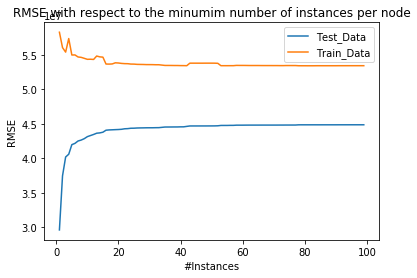

In [45]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 
fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,100):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    #Train the model
    regression_model.fit(trainData_DecisionTree.iloc[:,:-1],trainData_DecisionTree.iloc[:,-1:])
    regression_model.fit(testData_DecisionTree.iloc[:,:-1],testData_DecisionTree.iloc[:,-1:])
    #Predict query instances
    predicted_train = regression_model.predict(trainData_DecisionTree.iloc[:,:-1])
    predicted_test = regression_model.predict(testData_DecisionTree.iloc[:,:-1])
    #Calculate and append the RMSEs
    RMSE_train.append(np.sqrt(np.sum(((trainData_DecisionTree.iloc[:,-1]-predicted_train)**2)/len(trainData_DecisionTree.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testData_DecisionTree.iloc[:,-1]-predicted_test)**2)/len(testData_DecisionTree.iloc[:,-1]))))

ax0.plot(range(1,100),RMSE_test,label='Test_Data')
ax0.plot(range(1,100),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()